<a href="https://colab.research.google.com/github/nadirawijaya/Skripsi/blob/main/V5_Skripsi_Nadira_80_20_5_Fold_CV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style="text-align:center;"><b>SKRIPSI</b></h1>
<h2 style="text-align:center;">
  <b>Pengaruh Seleksi Fitur IGWO terhadap Kinerja Random Forest, CatBoost, dan XGBoost<br>
  untuk Klasifikasi Penyakit Monkeypox Berdasarkan Gejala</b>
</h2>

<p style="text-align:center;">
  <b>Diajukan oleh:</b><br>
  Nadira Putri Wijaya<br>
  2106635190<br>
  <a href="mailto:nadira.putri11@ui.ac.id">nadira.putri11@ui.ac.id</a>
</p>

<p style="text-align:center;">
  <b>Dosen Pembimbing:</b><br>
  Dra. Bevina Desjwiandra Handari, M.Sc., Ph.D.
</p>

<p style="text-align:center;">
  <b>Program Studi Sarjana Matematika</b><br>
  Departemen Matematika FMIPA Universitas Indonesia<br>
  Depok, Desember 2025
</p>


## Step 1: Inisialisasi Pipeline & Manajemen Pustaka

Tahap ini adalah **persiapan awal** sebelum analisis dimulai.

* Kode akan **menginstal pustaka** yang dibutuhkan (misalnya *pandas* untuk manipulasi data, *scikit-learn* untuk machine learning, *catboost*, dan *xgboost*).
* Setelah itu, dilakukan **import fungsi-fungsi penting** (seperti `train_test_split`, `RandomForestClassifier`, dsb.) agar siap dipakai pada tahap selanjutnya.
* Selain itu, ada **pengaturan konfigurasi visualisasi** supaya hasil grafik dan output terlihat lebih rapi serta konsisten.

👉 **Tujuan:** memastikan semua *alat* yang diperlukan sudah tersedia dan lingkungan kerja siap pakai.

👉 **Kenapa penting:** tanpa instalasi & import pustaka ini, fungsi-fungsi utama tidak bisa dipanggil, sehingga analisis atau pelatihan model bisa gagal di tengah jalan.

📖 **Referensi:**
Kotsiantis, S. B., Kanellopoulos, D., & Pintelas, P. E. (2006). *Data preprocessing for supervised learning.* International Journal of Computer Science, 1(2), 111–117.
[ResearchGate Link](https://www.researchgate.net/publication/228084519_Data_Preprocessing_for_Supervised_Learning)
(Jurnal ini membahas pentingnya berbagai teknik preprocessing, termasuk pembersihan data, sebagai langkah fundamental sebelum pemodelan).

In [1]:
# =============================================================================
# STEP 1: PERSIAPAN LINGKUNGAN KERJA DAN PUSTAKA
# Tujuan: Memastikan semua "alat" yang kita butuhkan siap sebelum mulai bekerja.
# Analoginya seperti menyiapkan semua bahan dan peralatan masak sebelum memasak.
# =============================================================================

# Impor pustaka sistem untuk interaksi dasar dengan Python
import sys
import warnings

# --- 1A: Judul dan Pemisah ---
# Memberi judul yang jelas untuk setiap langkah agar alur kerja mudah diikuti.
print("="*80)
print("🚀 STEP 1: Mempersiapkan Lingkungan Kerja dan Pustaka")
print("="*80)

# --- 1B: Cek Lingkungan & Instalasi Otomatis ---
# Kita cek apakah kode ini dijalankan di Google Colab, sebuah platform online gratis.
# Jika ya, semua pustaka yang dibutuhkan akan diinstal secara otomatis.
IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB:
    print("📦 Lingkungan Google Colab terdeteksi. Memasang pustaka yang dibutuhkan...")
    # Opsi '-q' digunakan agar proses instalasi tidak menampilkan output yang terlalu ramai.
    !pip install pandas numpy matplotlib seaborn scikit-learn imblearn chardet catboost xgboost -q
    print("✅ Semua pustaka berhasil dipasang!")
else:
    print("📘 Kode dijalankan di lingkungan lokal (PC/Laptop Anda).")
    print("   Pastikan pustaka berikut sudah terpasang: pandas, numpy, matplotlib,")
    print("   seaborn, scikit-learn, imblearn, chardet, catboost, xgboost.")

# --- 1C: Impor Semua Pustaka yang Dibutuhkan ---
# Setelah memastikan semua "alat" terpasang, kita "mengambilnya" untuk siap digunakan.
print("\n📚 Mengimpor pustaka...")

# Pustaka untuk mengelola dan menganalisis data (seperti Excel super canggih)
import pandas as pd
import numpy as np

# Pustaka untuk membuat grafik dan visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns

# Pustaka bantu lainnya
import time  # Untuk mengukur waktu
import re    # Untuk manipulasi teks tingkat lanjut
import chardet # Untuk mendeteksi encoding file

# Pustaka dari Scikit-Learn: "Kotak Perkakas" utama untuk Machine Learning
from sklearn.model_selection import train_test_split  # Untuk membagi data
from sklearn.preprocessing import StandardScaler      # Untuk standarisasi fitur numerik
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, classification_report, confusion_matrix) # Untuk mengukur performa model

# Model Machine Learning yang akan digunakan
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

print("✅ Pustaka berhasil diimpor.")

# --- 1D: Konfigurasi Tampilan dan Peringatan ---
# Mengatur beberapa hal agar hasil kerja kita lebih rapi dan enak dilihat.
print("\n🎨 Menerapkan konfigurasi global untuk tampilan...")

# Menyembunyikan pesan peringatan (warnings) yang tidak krusial.
# Ini seperti mematikan notifikasi yang tidak penting agar kita bisa fokus.
warnings.filterwarnings('ignore')

# Mengatur gaya visual untuk semua grafik agar terlihat profesional dan konsisten.
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("viridis") # Memilih skema warna yang menarik

# Mengatur agar tabel data (DataFrame) dari Pandas ditampilkan lebih informatif.
pd.set_option('display.max_columns', 50) # Tampilkan hingga 50 kolom
pd.set_option('display.width', 120)      # Lebar tampilan tabel

print("✅ Konfigurasi global berhasil diterapkan.")

# --- Penutup Step 1 ---
print("\n" + "="*80)
print("🎉 STEP 1 SELESAI: Lingkungan kerja telah siap sepenuhnya!")
print("="*80)

🚀 STEP 1: Mempersiapkan Lingkungan Kerja dan Pustaka
📦 Lingkungan Google Colab terdeteksi. Memasang pustaka yang dibutuhkan...
✅ Semua pustaka berhasil dipasang!

📚 Mengimpor pustaka...
✅ Pustaka berhasil diimpor.

🎨 Menerapkan konfigurasi global untuk tampilan...
✅ Konfigurasi global berhasil diterapkan.

🎉 STEP 1 SELESAI: Lingkungan kerja telah siap sepenuhnya!


## Step 2: Pemuatan & Pembersihan Data Global (Pra-pemisahan)

### Deskripsi Tahapan

Pada tahap ini, dataset mentah dimuat dari file CSV dan melewati serangkaian proses pembersihan dan persiapan data secara global. Proses ini krusial dan dilakukan **sebelum** data dipisah menjadi set pelatihan dan pengujian untuk memastikan konsistensi dan mencegah kebocoran data (*data leakage*).

Langkah-langkah utamanya meliputi:

1.  **Standardisasi Nama Kolom**: Mengubah semua nama kolom ke dalam format `snake_case` (huruf kecil, tanpa spasi, dan menggunakan garis bawah) untuk konsistensi dan kemudahan akses.
2.  **Penghapusan Data Tidak Relevan**: Menghapus kolom yang tidak memiliki nilai prediktif (contoh: `patient_id`) dan baris data yang terduplikasi secara penuh untuk menghindari bias pada model.
3.  **Standardisasi Nilai Kategorikal**: Menyeragamkan nilai-nilai yang memiliki makna sama tetapi ditulis berbeda. Sebagai contoh, nilai seperti `y`, `true`, dan `positive` akan distandardisasi menjadi `yes`.
4.  **Rekayasa & Imputasi Fitur (`fever`)**: Mengubah kolom `fever` yang memiliki format teks tidak terstruktur menjadi dua fitur numerik yang informatif:
    * `fever_presence`: Fitur biner (ya/tidak) yang menandakan keberadaan demam.
    * `fever_duration_days`: Fitur numerik yang merepresentasikan durasi demam dalam hari.
    * **Justifikasi Imputasi**: Jika pasien tercatat demam namun durasinya tidak spesifik, nilai durasi akan diisi (diimputasi) sebagai **1 hari**. Ini adalah pendekatan konservatif yang logis, karena jika demam ada, durasinya minimal adalah satu hari.

---

### Tujuan & Justifikasi

**Tujuan** dari tahap ini adalah untuk mentransformasi data mentah yang seringkali tidak konsisten dan "berantakan" menjadi sebuah dataset yang bersih, terstruktur, dan siap untuk tahap pemodelan *machine learning*.

**Mengapa ini penting?**
* **Mencegah Error**: Nama kolom dan nilai yang tidak konsisten dapat menyebabkan *bug* dan error pada saat analisis dan pemodelan.
* **Meningkatkan Kualitas Model**: Data duplikat dapat membuat model menjadi bias, sementara nilai yang tidak standar dapat membingungkan algoritma.
* **Memperkaya Informasi**: Rekayasa fitur mengubah data implisit menjadi sinyal eksplisit yang lebih mudah ditangkap oleh model, sehingga berpotensi meningkatkan akurasi prediksi.

---

### Referensi Akademis

* **Van den Broeck, J., et al. (2005).** *Data cleaning: detecting, diagnosing, and editing data abnormalities.* PLoS Medicine, 2(10), e267.
    *(Jurnal ini mendukung pentingnya proses pembersihan data secara sistematis—seperti standardisasi, penghapusan duplikat, dan penanganan anomali—sebagai fondasi untuk analisis data yang valid dan andal dalam penelitian medis.)*

* **Zheng, A., & Casari, A. (2018).** *Feature engineering for machine learning: principles and techniques for data scientists*. O'Reilly Media, Inc.
    *(Buku ini merupakan referensi standar yang memvalidasi praktik rekayasa fitur. Transformasi kolom `fever` adalah contoh klasik dari rekayasa fitur, di mana domain knowledge digunakan untuk mengekstrak informasi yang lebih bermakna dari data mentah.)*


🚀 STEP 2: Memuat dan Membersihkan Data
--- 2.0: Memulai Proses Pemuatan Data ---
   📤 Silakan unggah file CSV Anda...


Saving MonkeyPox Dataset Skripsi.csv to MonkeyPox Dataset Skripsi (7).csv
🔄 Mencoba memuat file: 'MonkeyPox Dataset Skripsi (7).csv'...
✅ Berhasil dimuat dengan encoding 'utf-8'. Bentuk data: (500, 50)

--- 2.1: Membersihkan Nama Kolom & Data Duplikat ---
✅ Nama kolom diseragamkan dan 0 baris duplikat dihapus.

--- 2.2: Menyeragamkan Nilai Kategorikal ---
✅ Proses standardisasi selesai. Ditemukan perubahan pada 28 kolom.

📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊
LAPORAN VISUAL HASIL STANDARDIZASI NILAI
📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊

🔎 Analisis Perubahan untuk Kolom: 'sex'
   (Jumlah nilai unik berkurang dari 2 menjadi 2)

--- 1. Tampilan Tabel Perbandingan ---
SEBELUM:
  Nilai  Jumlah
  male      259
female      241

SESUDAH:
 Nilai  Jumlah
  male     259
female     241

--- 2. Tampilan Visual Perbandingan ---


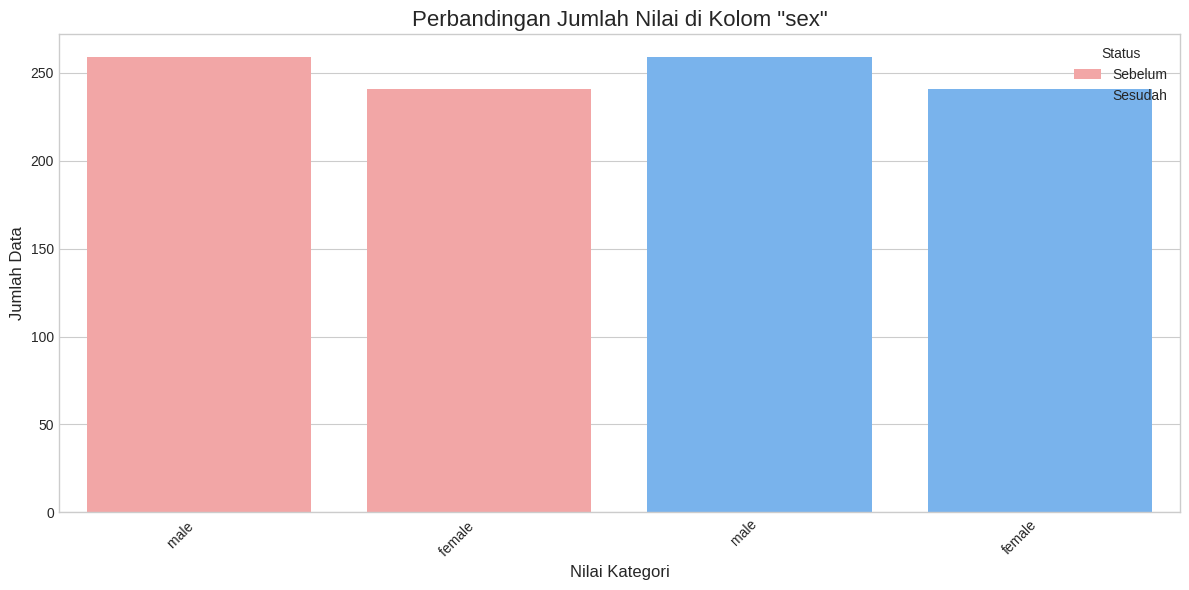


🔎 Analisis Perubahan untuk Kolom: 'transmission_rank'
   (Jumlah nilai unik berkurang dari 7 menjadi 4)

--- 1. Tampilan Tabel Perbandingan ---
SEBELUM:
    Nilai  Jumlah
 isolated     146
 Tertiary      79
secondary      75
    Index      70
Secondary      59
    index      55
 Isolated      16

SESUDAH:
    Nilai  Jumlah
 isolated     162
secondary     134
    index     125
 tertiary      79

--- 2. Tampilan Visual Perbandingan ---


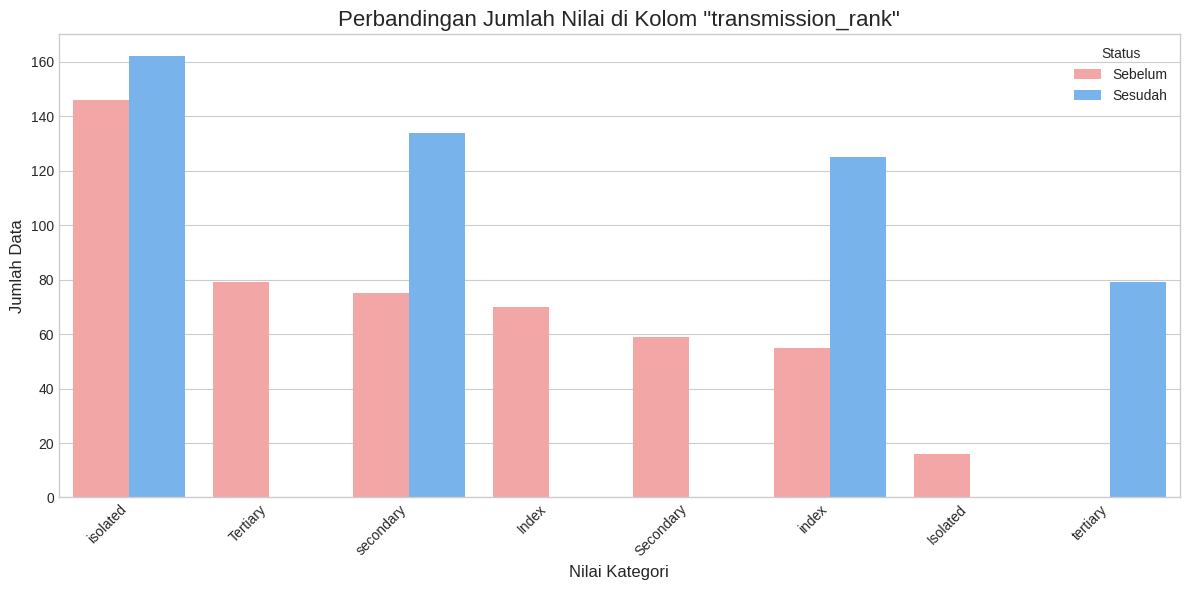


🔎 Analisis Perubahan untuk Kolom: 'country_of_acquisition'
   (Jumlah nilai unik berkurang dari 37 menjadi 36)

--- 1. Tampilan Tabel Perbandingan ---
SEBELUM:
         Nilai  Jumlah
       Nigeria      73
       England      67
        Uganda      41
         Spain      28
      Portugal      28
            UK      26
       Denmark      22
       Germany      21
   Switzerland      21
         Italy      18
      Cambodia      17
   Netherlands      16
 United States      12
        Canada      12
        France       9
     Australia       9
     Argentina       8
 Sierra Leone        6
       Ireland       6
        Greece       6
         Gabon       6
        Israel       5
      Scotland       4
       Iceland       4
         Benin       3
       Liberia       3
            US       3
    Bangladesh       3
 Cote d’Ivoire       3
        Sweden       3
         Congo       3
       france        3
       Belgium       3
         Wales       2
       Finland       2
        Lat

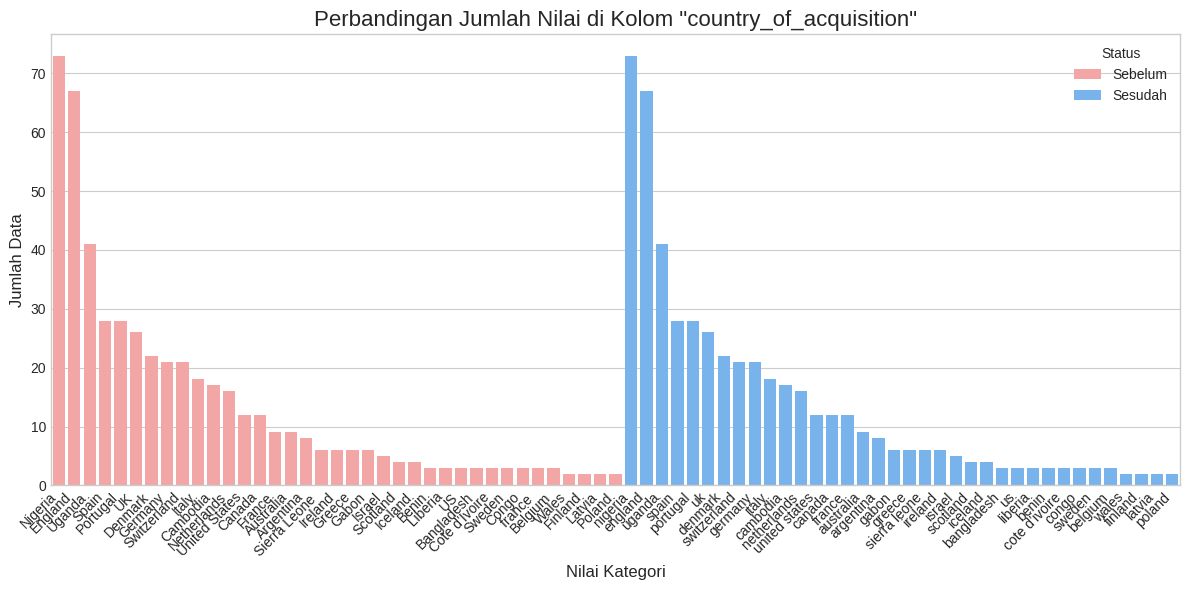


🔎 Analisis Perubahan untuk Kolom: 'smallpox_vaccination_history'
   (Jumlah nilai unik berkurang dari 3 menjadi 3)

--- 1. Tampilan Tabel Perbandingan ---
SEBELUM:
                                            Nilai  Jumlah
                                            none      340
MVA six days post exposure or 12 days pre-illness     159
MVA six days post-exposure or 12 days pre-illness       1

SESUDAH:
                                            Nilai  Jumlah
                                               no     340
mva six days post exposure or 12 days pre-illness     159
mva six days post-exposure or 12 days pre-illness       1

--- 2. Tampilan Visual Perbandingan ---


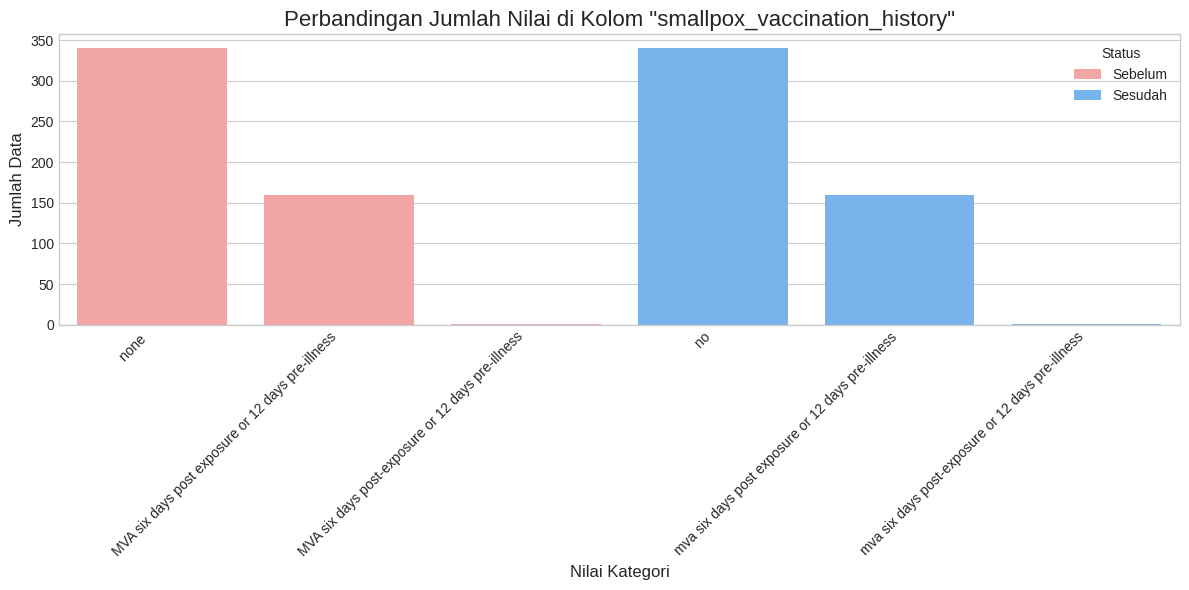


🔎 Analisis Perubahan untuk Kolom: 'hiv_hepatitis_b_and_hepatitis_c_status'
   (Jumlah nilai unik berkurang dari 3 menjadi 3)

--- 1. Tampilan Tabel Perbandingan ---
SEBELUM:
                        Nilai  Jumlah
                     positive     306
                    negative      191
Not tested (parents negative)       3

SESUDAH:
                        Nilai  Jumlah
                          yes     306
                           no     191
not tested (parents negative)       3

--- 2. Tampilan Visual Perbandingan ---


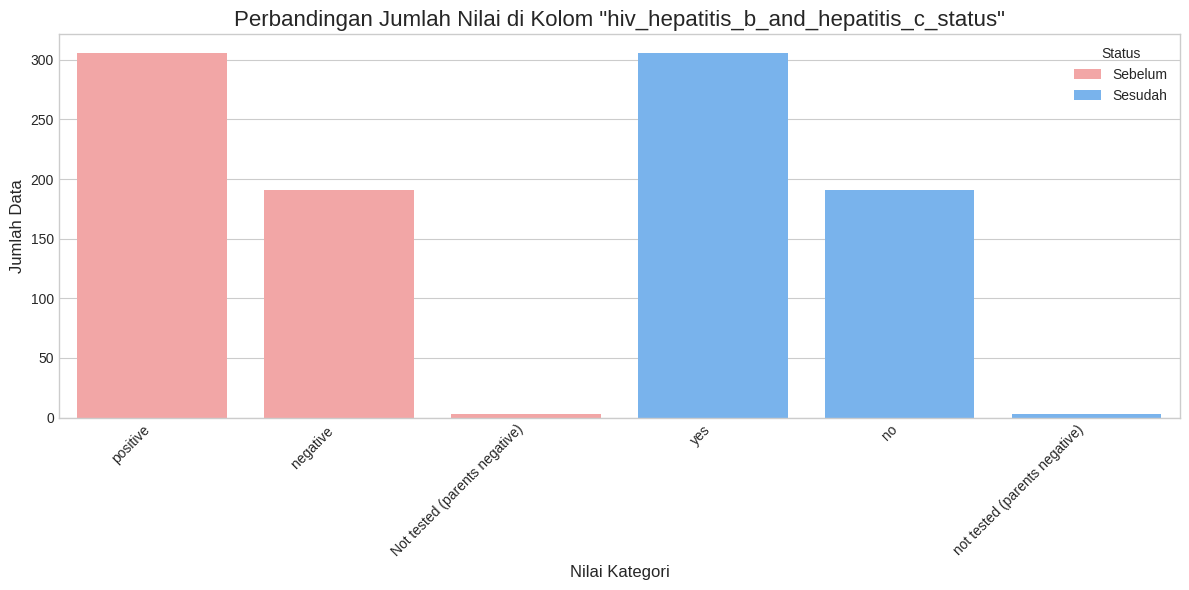


🔎 Analisis Perubahan untuk Kolom: 'fever'
   (Jumlah nilai unik berkurang dari 5 menjadi 5)

--- 1. Tampilan Tabel Perbandingan ---
SEBELUM:
                  Nilai  Jumlah
                   none     226
            yes (2days)     131
                    yes      58
Coryzal illness (1 day)      45
            yes (4days)      40

SESUDAH:
                  Nilai  Jumlah
                     no     226
            yes (2days)     131
                    yes      58
coryzal illness (1 day)      45
            yes (4days)      40

--- 2. Tampilan Visual Perbandingan ---


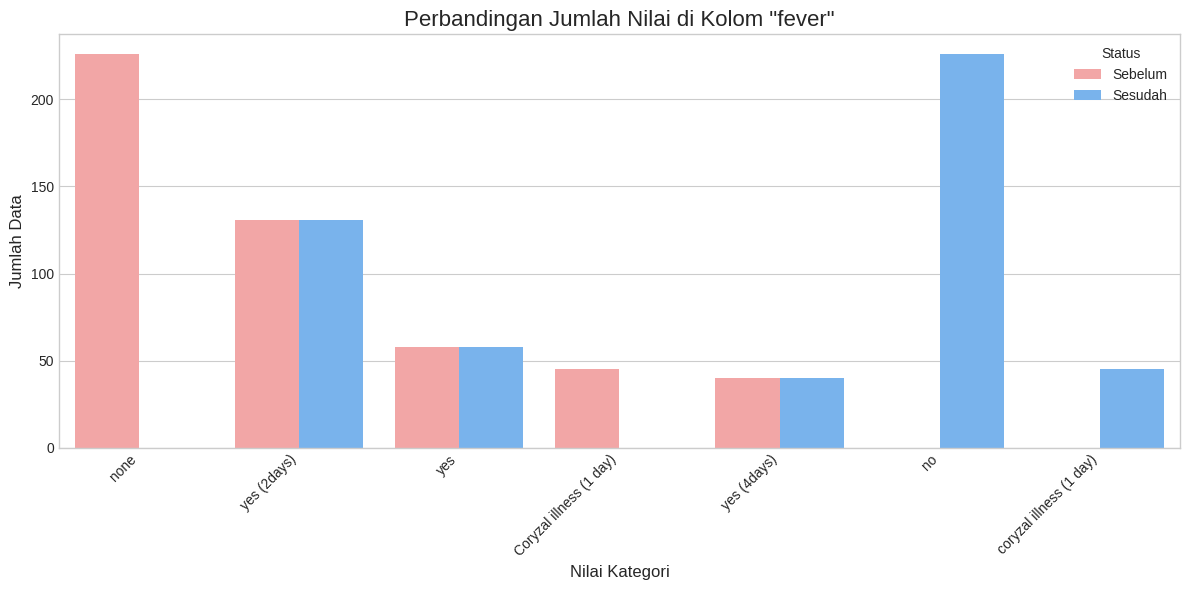


🔎 Analisis Perubahan untuk Kolom: 'rectal_pain_or_pain_on_defecation'
   (Jumlah nilai unik berkurang dari 2 menjadi 2)

--- 1. Tampilan Tabel Perbandingan ---
SEBELUM:
Nilai  Jumlah
 none     321
  yes     179

SESUDAH:
Nilai  Jumlah
   no     321
  yes     179

--- 2. Tampilan Visual Perbandingan ---


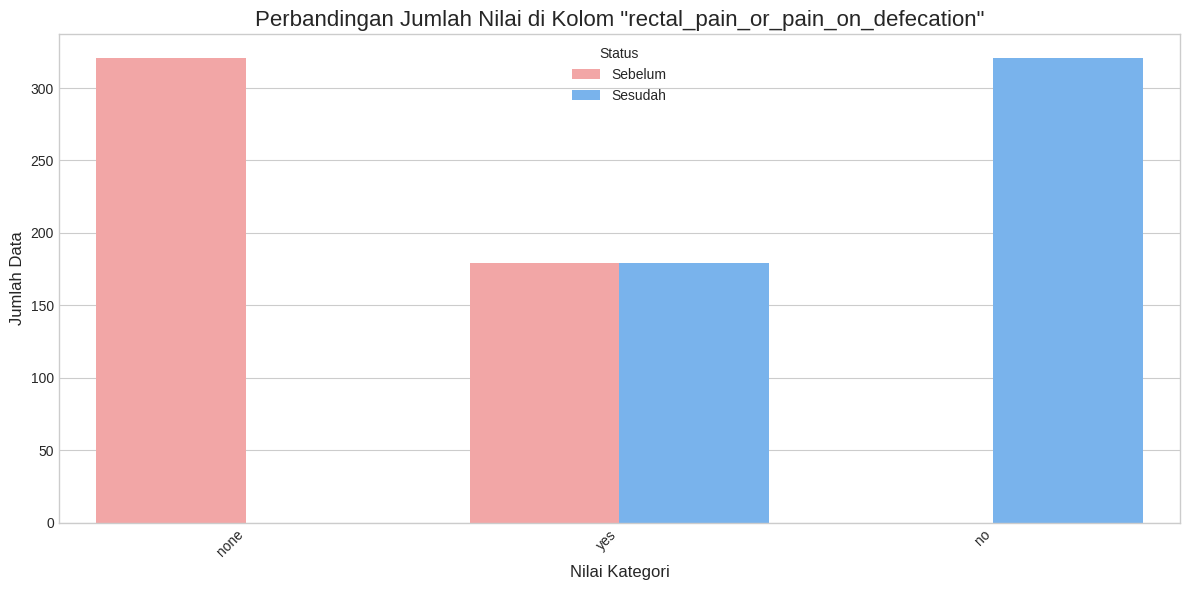


🔎 Analisis Perubahan untuk Kolom: 'dysuria'
   (Jumlah nilai unik berkurang dari 2 menjadi 2)

--- 1. Tampilan Tabel Perbandingan ---
SEBELUM:
Nilai  Jumlah
 none     387
  yes     113

SESUDAH:
Nilai  Jumlah
   no     387
  yes     113

--- 2. Tampilan Visual Perbandingan ---


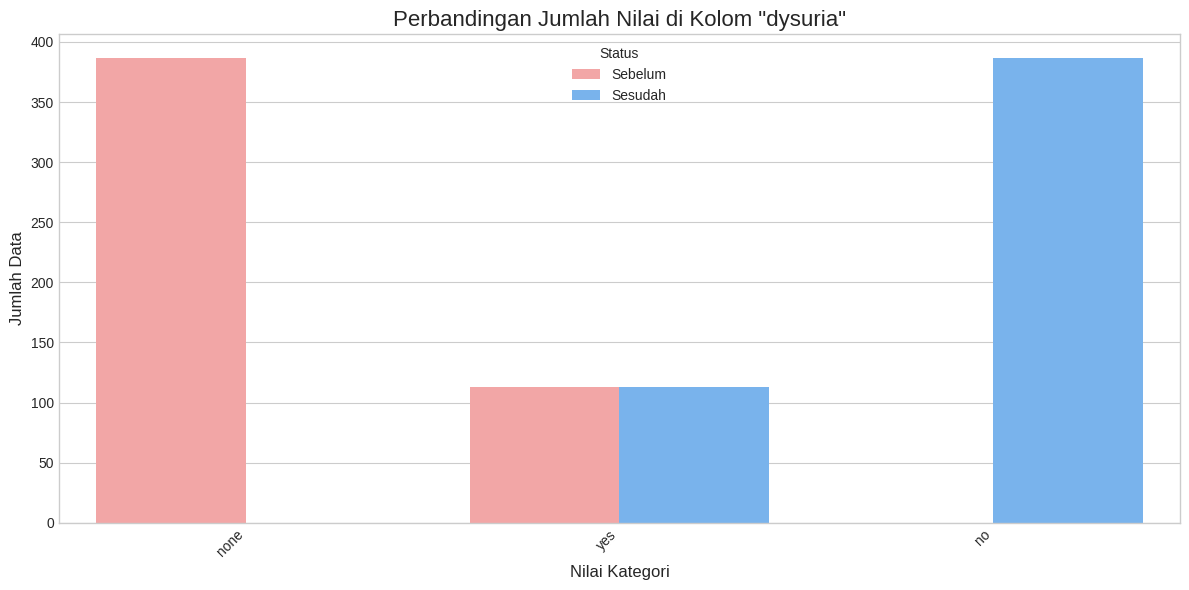


🔎 Analisis Perubahan untuk Kolom: 'bleeding_discharge_per_rectum'
   (Jumlah nilai unik berkurang dari 2 menjadi 2)

--- 1. Tampilan Tabel Perbandingan ---
SEBELUM:
Nilai  Jumlah
none      451
  yes      49

SESUDAH:
Nilai  Jumlah
   no     451
  yes      49

--- 2. Tampilan Visual Perbandingan ---


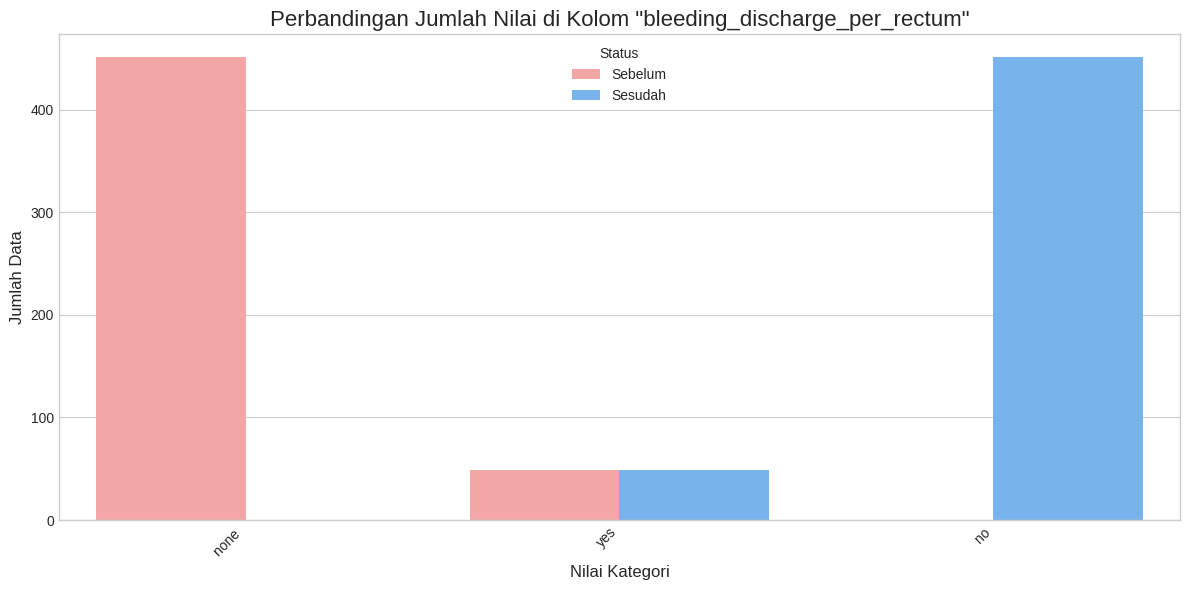


🔎 Analisis Perubahan untuk Kolom: 'conjunctivitis'
   (Jumlah nilai unik berkurang dari 2 menjadi 2)

--- 1. Tampilan Tabel Perbandingan ---
SEBELUM:
Nilai  Jumlah
  yes     251
 none     249

SESUDAH:
Nilai  Jumlah
  yes     251
   no     249

--- 2. Tampilan Visual Perbandingan ---


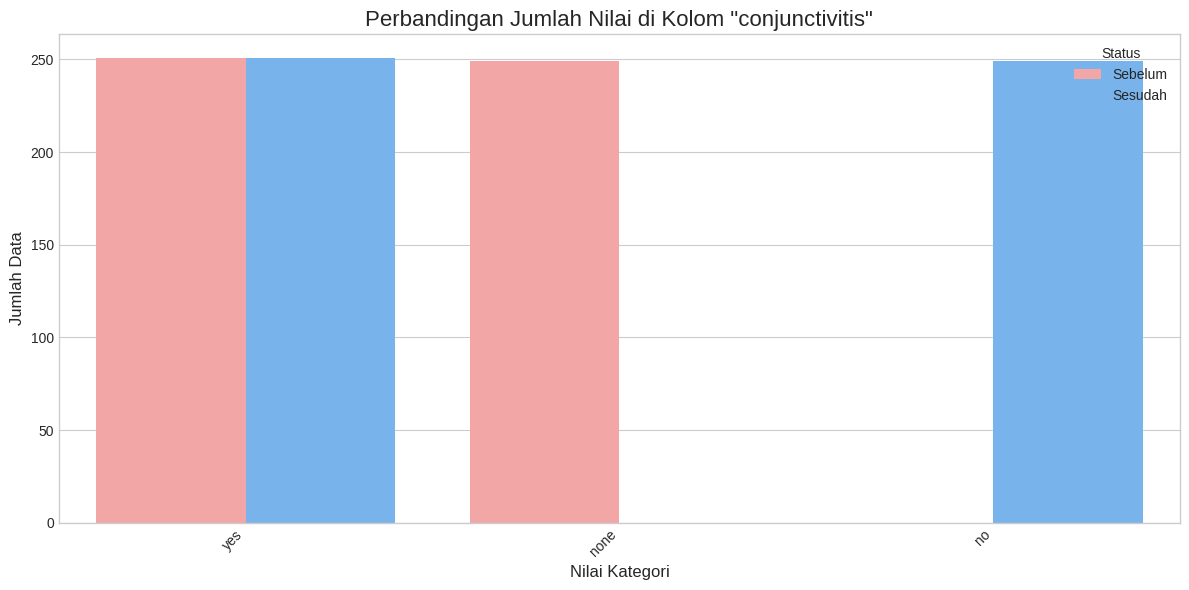


🔎 Analisis Perubahan untuk Kolom: 'back_pain'
   (Jumlah nilai unik berkurang dari 2 menjadi 2)

--- 1. Tampilan Tabel Perbandingan ---
SEBELUM:
Nilai  Jumlah
  yes     352
 none     148

SESUDAH:
Nilai  Jumlah
  yes     352
   no     148

--- 2. Tampilan Visual Perbandingan ---


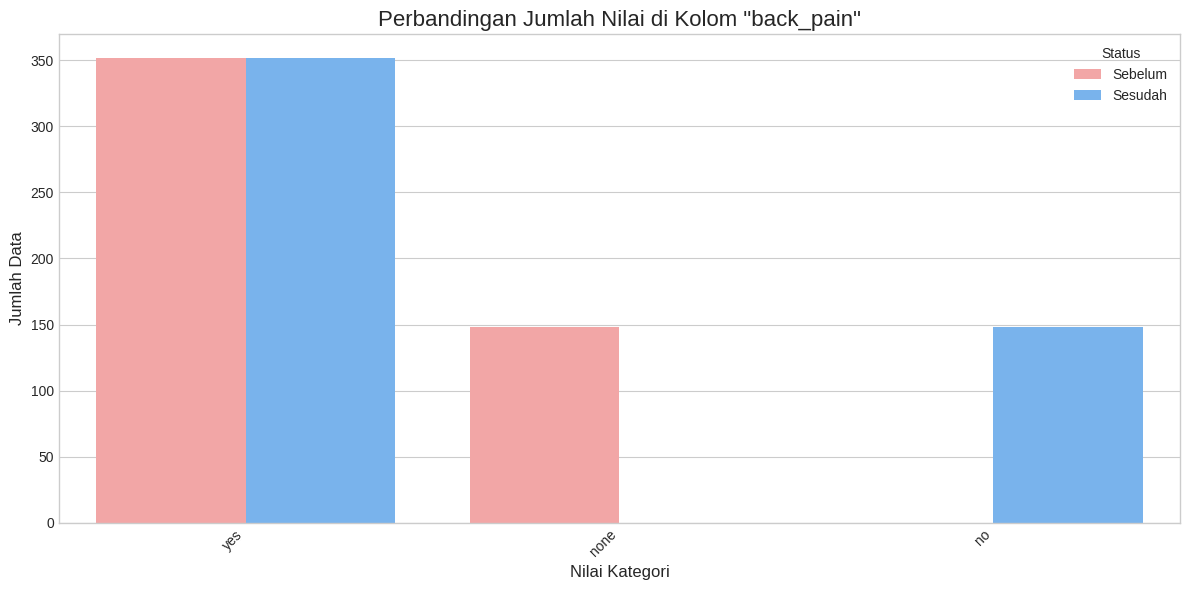


🔎 Analisis Perubahan untuk Kolom: 'myalgia'
   (Jumlah nilai unik berkurang dari 2 menjadi 2)

--- 1. Tampilan Tabel Perbandingan ---
SEBELUM:
Nilai  Jumlah
  yes     393
 none     107

SESUDAH:
Nilai  Jumlah
  yes     393
   no     107

--- 2. Tampilan Visual Perbandingan ---


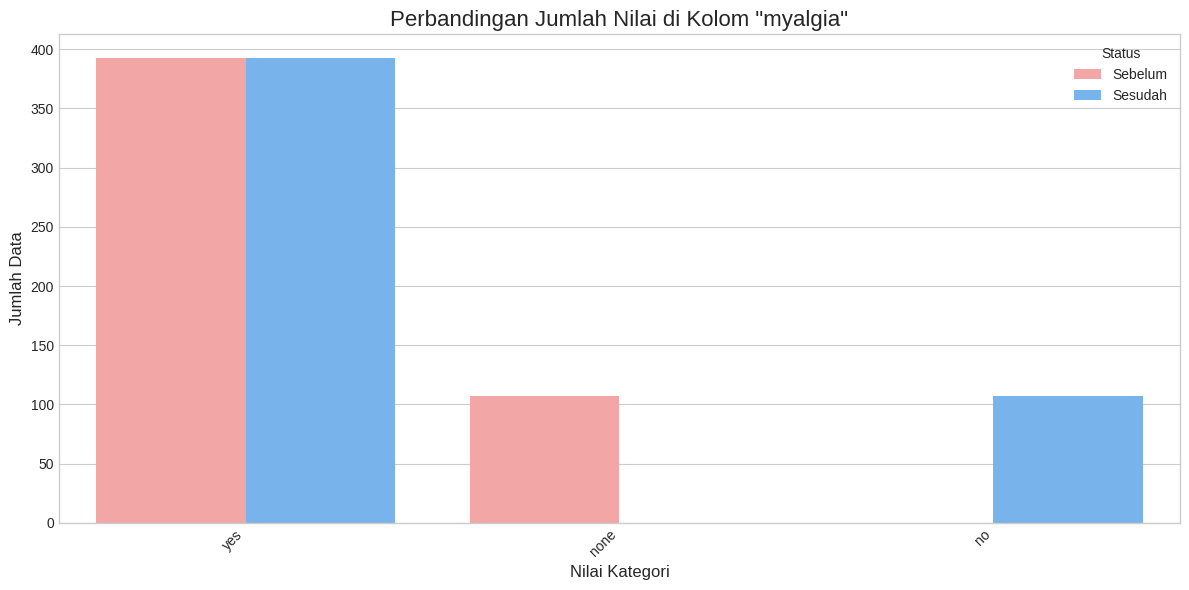


🔎 Analisis Perubahan untuk Kolom: 'headache'
   (Jumlah nilai unik berkurang dari 2 menjadi 2)

--- 1. Tampilan Tabel Perbandingan ---
SEBELUM:
Nilai  Jumlah
  yes     377
 none     123

SESUDAH:
Nilai  Jumlah
  yes     377
   no     123

--- 2. Tampilan Visual Perbandingan ---


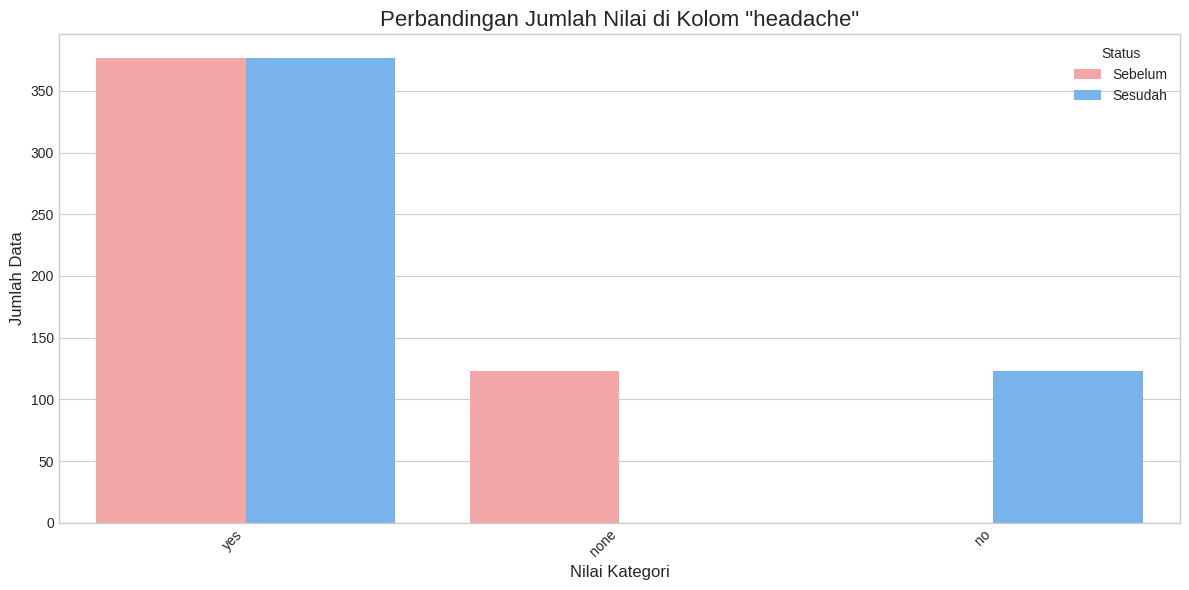


🔎 Analisis Perubahan untuk Kolom: 'sexually_transmitted_infections'
   (Jumlah nilai unik berkurang dari 7 menjadi 7)

--- 1. Tampilan Tabel Perbandingan ---
SEBELUM:
                     Nilai  Jumlah
                   unknown     206
                    Rectum     124
purulent penile discharge.      62
             Urethra/urine      45
                    Throat      43
        Rectal perforation      15
             Multiple site       5

SESUDAH:
                     Nilai  Jumlah
                   unknown     206
                    rectum     124
purulent penile discharge.      62
             urethra/urine      45
                    throat      43
        rectal perforation      15
             multiple site       5

--- 2. Tampilan Visual Perbandingan ---


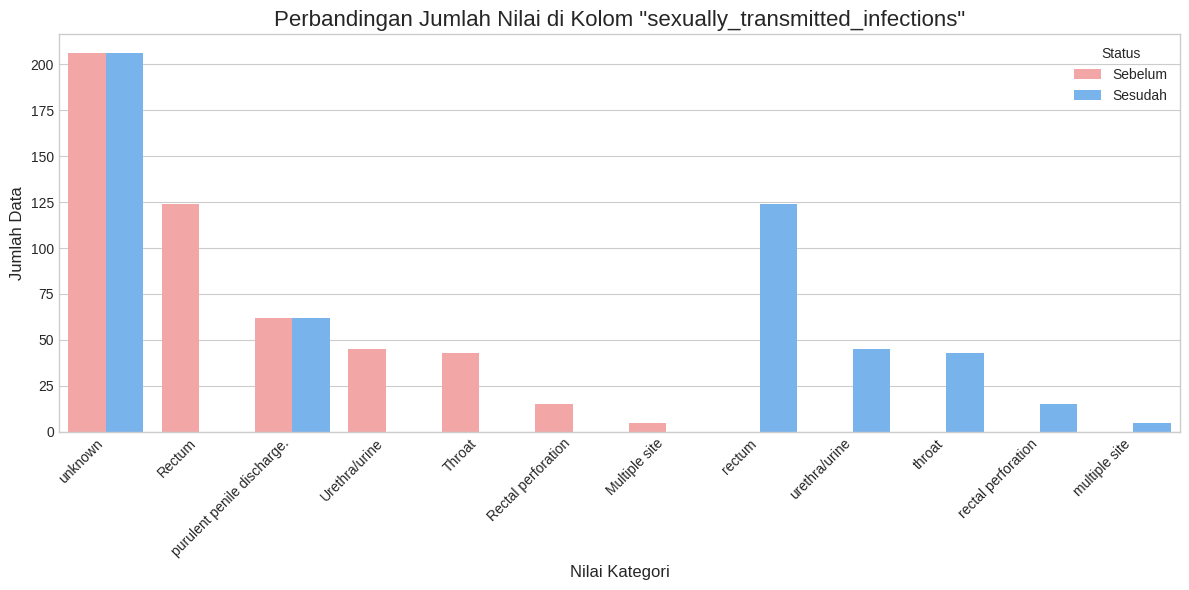


🔎 Analisis Perubahan untuk Kolom: 'lymphadenopathy'
   (Jumlah nilai unik berkurang dari 2 menjadi 2)

--- 1. Tampilan Tabel Perbandingan ---
SEBELUM:
Nilai  Jumlah
  yes     314
 none     186

SESUDAH:
Nilai  Jumlah
  yes     314
   no     186

--- 2. Tampilan Visual Perbandingan ---


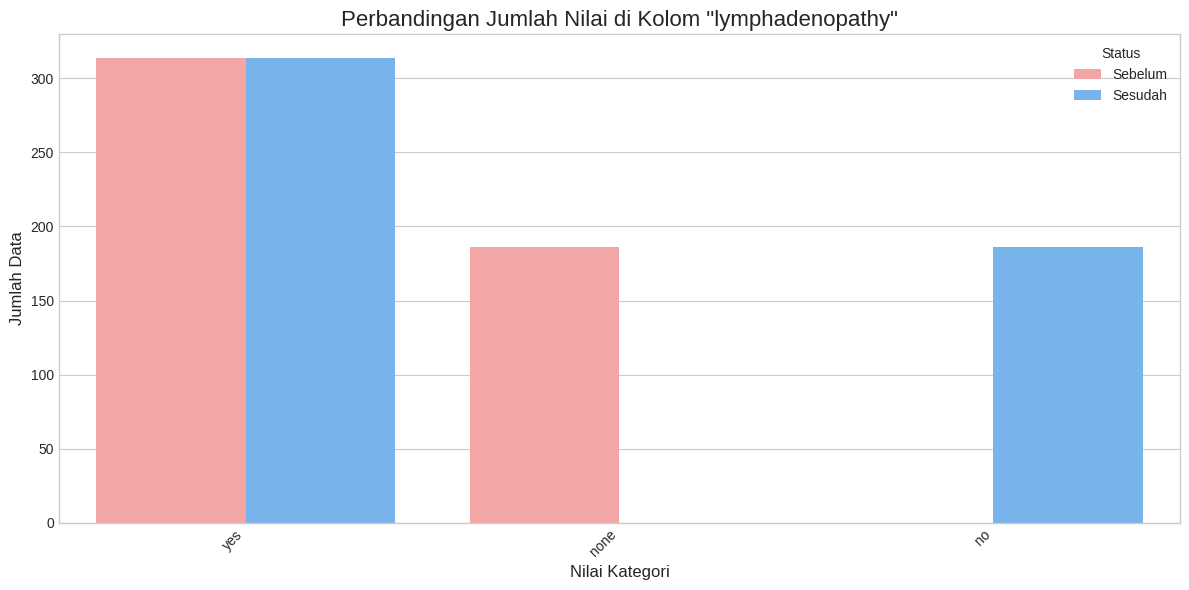


🔎 Analisis Perubahan untuk Kolom: 'distribution_of_lesions'
   (Jumlah nilai unik berkurang dari 7 menjadi 7)

--- 1. Tampilan Tabel Perbandingan ---
SEBELUM:
                                                     Nilai  Jumlah
                               Face, trunk, arms, and legs     210
Face, scalp, trunk, limbs, palms, glans penis, and scrotum     124
 Face, scalp, trunk, limbs, penile shaft, palms, and soles      65
 Face, trunk, hands (including nail bed), and labia majora      43
             Face, trunk, limbs, palms, soles, and scrotum      40
                              Face, trunk, arms, and hands      15
               Face, trunk, limbs, palms, and penile shaft       3

SESUDAH:
                                                     Nilai  Jumlah
                               face, trunk, arms, and legs     210
face, scalp, trunk, limbs, palms, glans penis, and scrotum     124
 face, scalp, trunk, limbs, penile shaft, palms, and soles      65
 face, trunk, hands (inclu

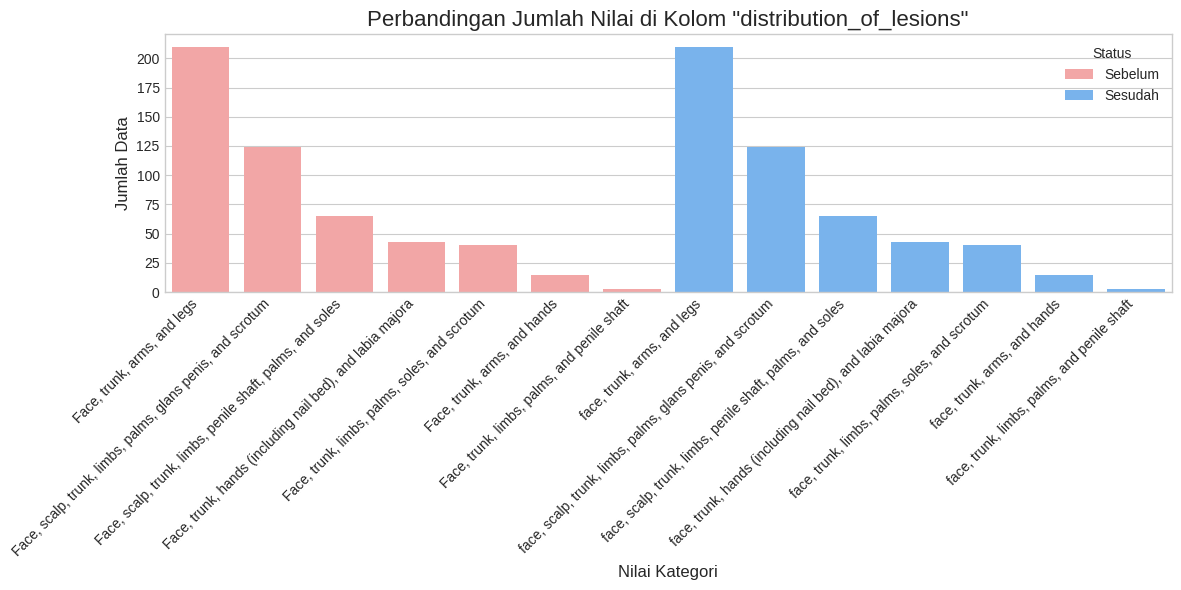


🔎 Analisis Perubahan untuk Kolom: 'complications_of_illness'
   (Jumlah nilai unik berkurang dari 7 menjadi 8)

--- 1. Tampilan Tabel Perbandingan ---
SEBELUM:
                                                                          Nilai  Jumlah
Low mood and emotional lability. Ulcerated inguinal lesion with delayed healing     124
                               Deep tissue abscesses, severe pain, and low mood     102
          Conjunctivitis, painful disruption of thumbnail from subungual lesion      43
                                                                      Low mood       15
                                 Ulcerated inguinal lesion with delayed healing       5
                         Pruritis and contact dermatitis from cleaning products       5
                                                                           none       3

SESUDAH:
                                                                          Nilai  Jumlah
                                     

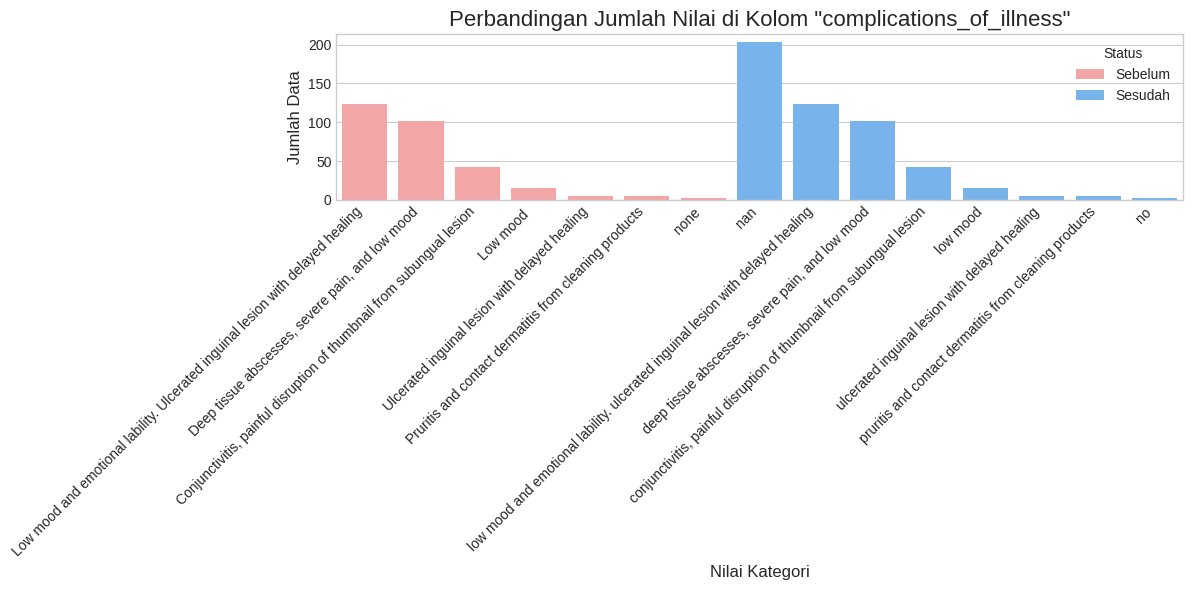


🔎 Analisis Perubahan untuk Kolom: 'monkeypox_viral_dna_detected_in_blood'
   (Jumlah nilai unik berkurang dari 2 menjadi 2)

--- 1. Tampilan Tabel Perbandingan ---
SEBELUM:
Nilai  Jumlah
 none     274
  yes     226

SESUDAH:
Nilai  Jumlah
   no     274
  yes     226

--- 2. Tampilan Visual Perbandingan ---


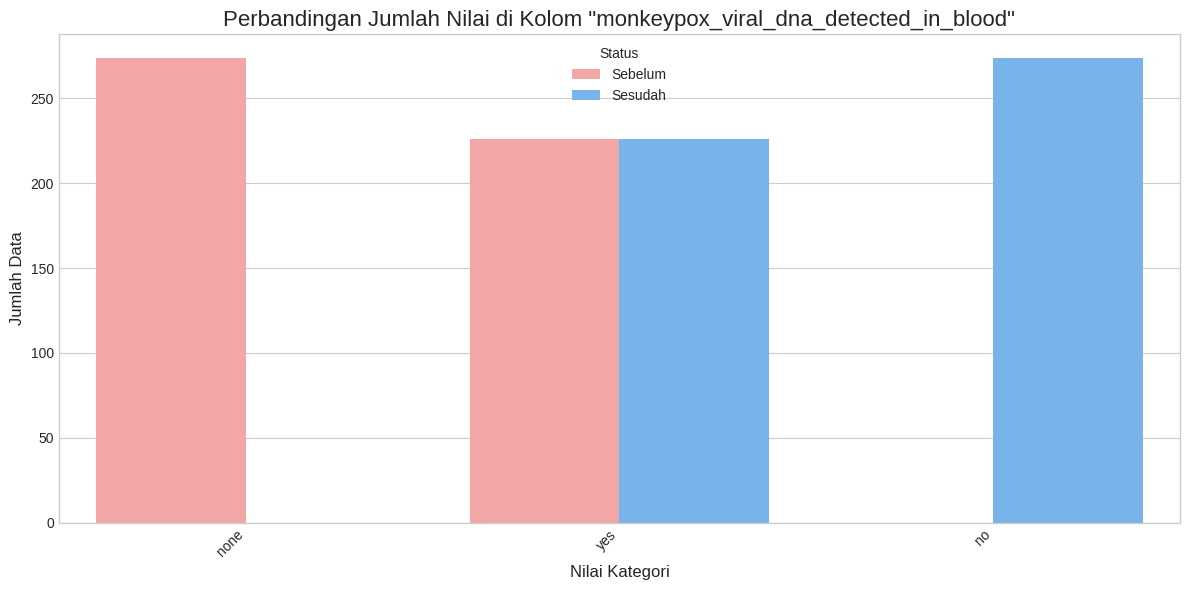


🔎 Analisis Perubahan untuk Kolom: 'monkeypox_viral_dna_detected_in_nose_or_throat_swab'
   (Jumlah nilai unik berkurang dari 3 menjadi 2)

--- 1. Tampilan Tabel Perbandingan ---
SEBELUM:
Nilai  Jumlah
  yes     231
 yes      203
 none      66

SESUDAH:
Nilai  Jumlah
  yes     434
   no      66

--- 2. Tampilan Visual Perbandingan ---


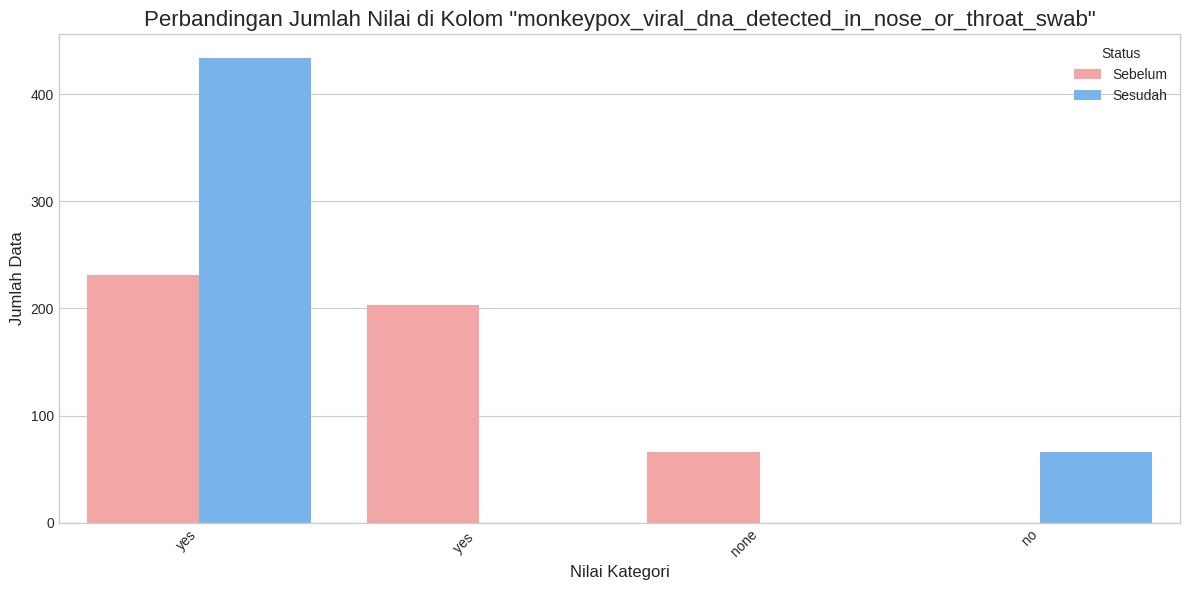


🔎 Analisis Perubahan untuk Kolom: 'monkeypox_viral_dna_detected_in_urine'
   (Jumlah nilai unik berkurang dari 3 menjadi 2)

--- 1. Tampilan Tabel Perbandingan ---
SEBELUM:
Nilai  Jumlah
  yes     403
 none      95
 yes        2

SESUDAH:
Nilai  Jumlah
  yes     405
   no      95

--- 2. Tampilan Visual Perbandingan ---


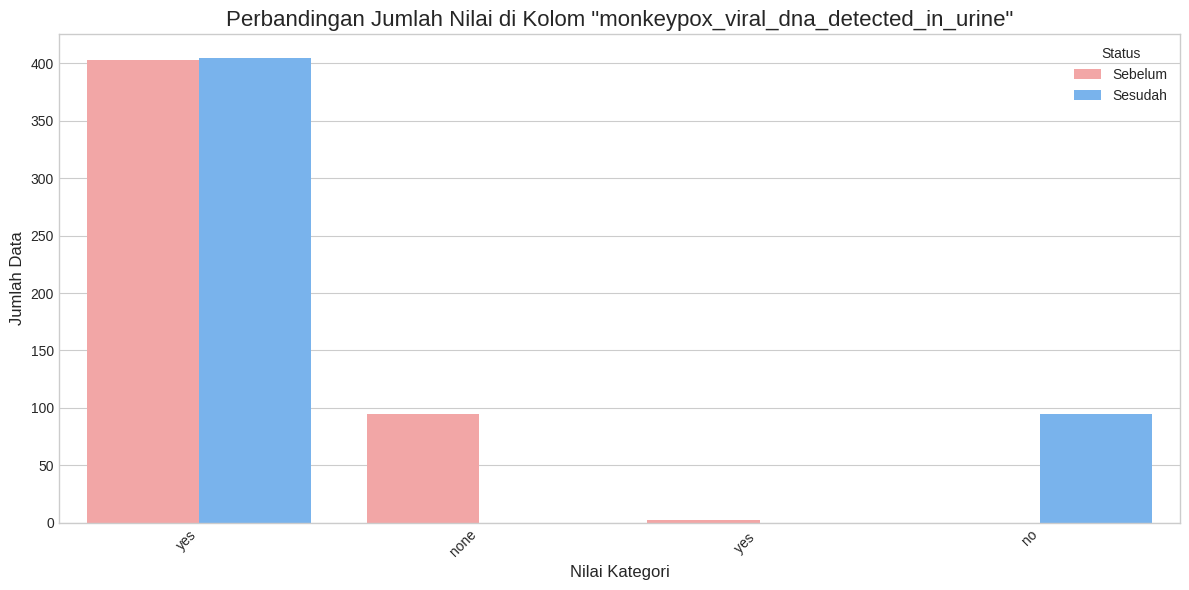


🔎 Analisis Perubahan untuk Kolom: 'antivirals_received'
   (Jumlah nilai unik berkurang dari 5 menjadi 5)

--- 1. Tampilan Tabel Perbandingan ---
SEBELUM:
                                            Nilai  Jumlah
         Brincidofovir 200 mg (three dose) orally     147
           Brincidofovir 200 mg (two dose) orally     140
           Brincidofovir 200 mg (one dose) orally     124
                                             none      72
Tecovirimat 600 mg twice daily for 2 weeks orally      17

SESUDAH:
                                            Nilai  Jumlah
         brincidofovir 200 mg (three dose) orally     147
           brincidofovir 200 mg (two dose) orally     140
           brincidofovir 200 mg (one dose) orally     124
                                               no      72
tecovirimat 600 mg twice daily for 2 weeks orally      17

--- 2. Tampilan Visual Perbandingan ---


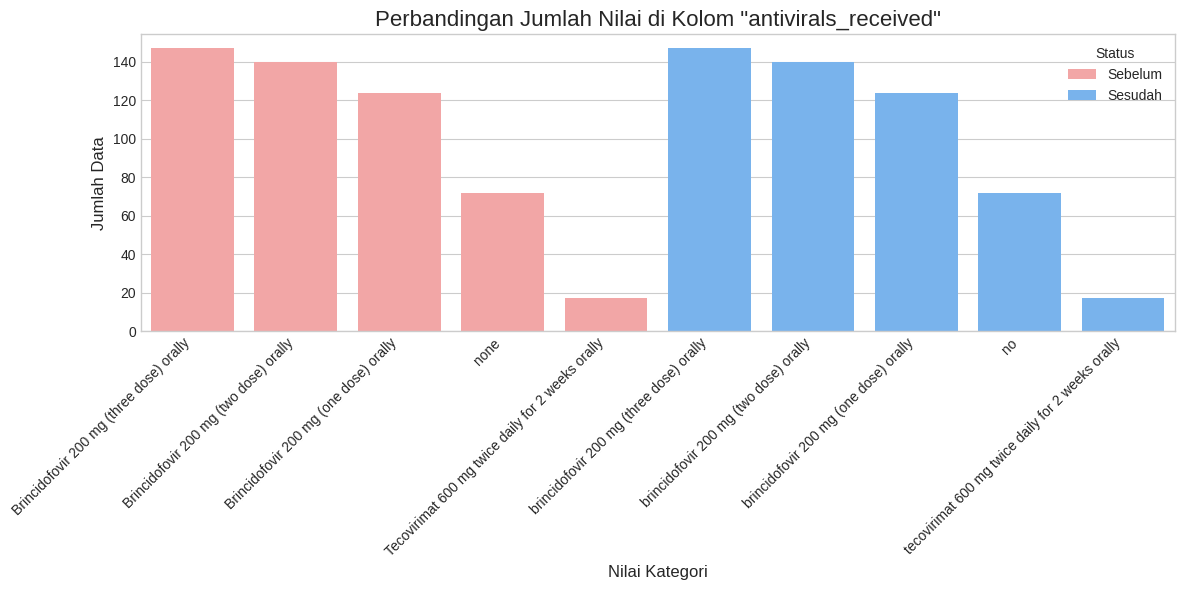


🔎 Analisis Perubahan untuk Kolom: 'complications_of_treatment'
   (Jumlah nilai unik berkurang dari 4 menjadi 4)

--- 1. Tampilan Tabel Perbandingan ---
SEBELUM:
                                                             Nilai  Jumlah
                                                              none     235
                                  Transaminitis (peak ALT 331 U/L)     122
Transaminitis (peak ALT 127 U/L), nausea, and abdominal discomfort     103
                                  Transaminitis (peak ALT 550 U/L)      40

SESUDAH:
                                                             Nilai  Jumlah
                                                                no     235
                                  transaminitis (peak alt 331 u/l)     122
transaminitis (peak alt 127 u/l), nausea, and abdominal discomfort     103
                                  transaminitis (peak alt 550 u/l)      40

--- 2. Tampilan Visual Perbandingan ---


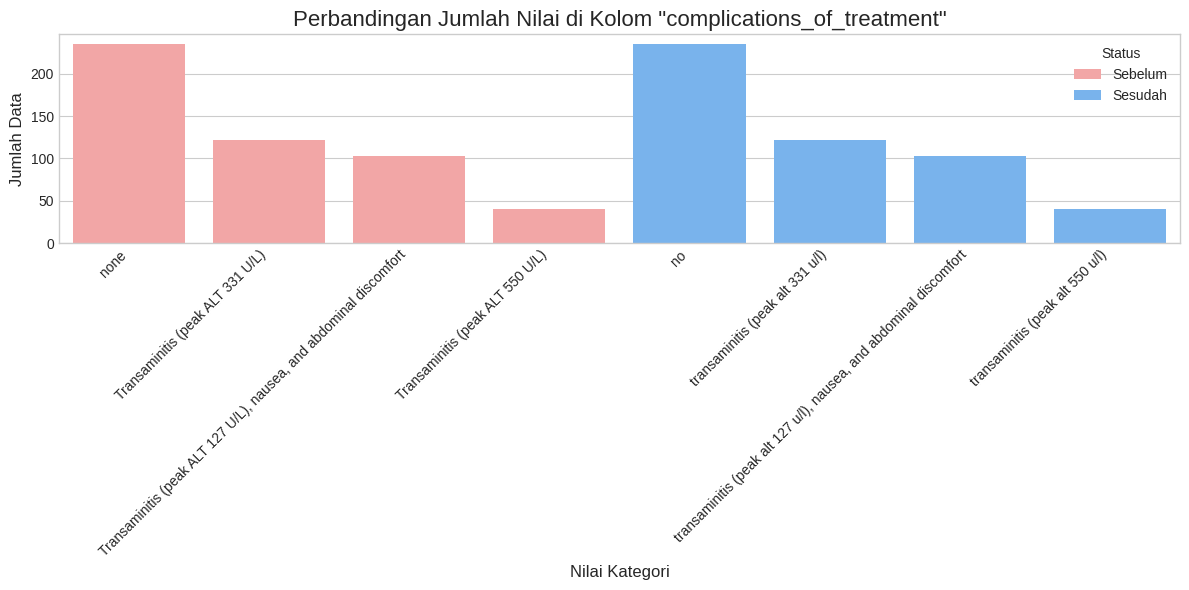


🔎 Analisis Perubahan untuk Kolom: 'sore_throat'
   (Jumlah nilai unik berkurang dari 2 menjadi 2)

--- 1. Tampilan Tabel Perbandingan ---
SEBELUM:
Nilai  Jumlah
  yes     358
 none     142

SESUDAH:
Nilai  Jumlah
  yes     358
   no     142

--- 2. Tampilan Visual Perbandingan ---


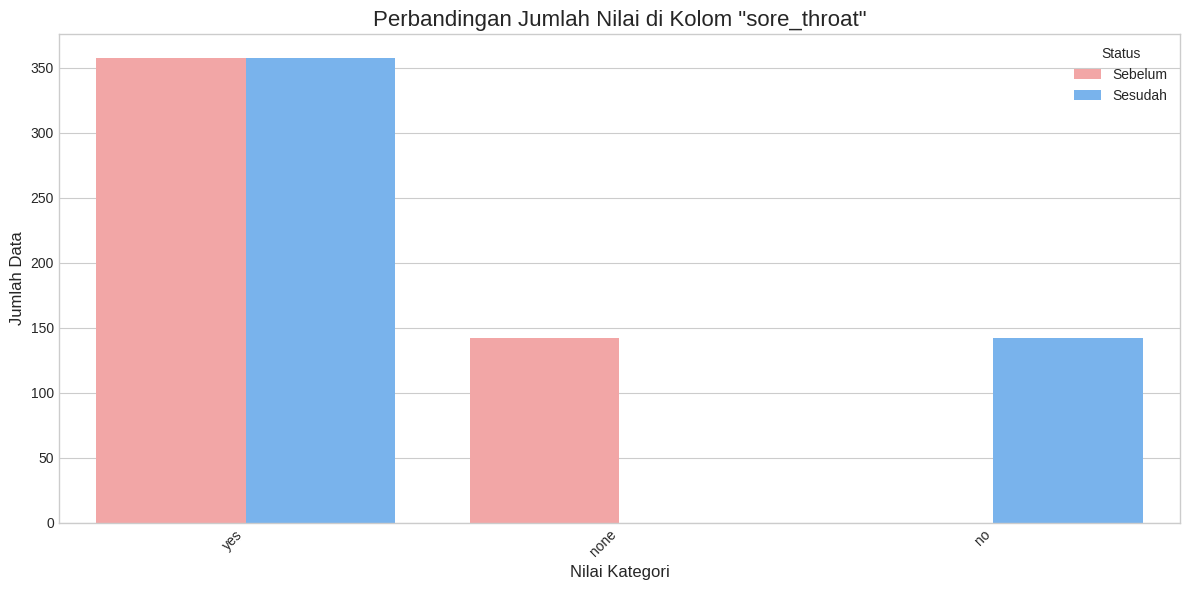


🔎 Analisis Perubahan untuk Kolom: 'chills'
   (Jumlah nilai unik berkurang dari 2 menjadi 2)

--- 1. Tampilan Tabel Perbandingan ---
SEBELUM:
Nilai  Jumlah
 none     360
  yes     140

SESUDAH:
Nilai  Jumlah
   no     360
  yes     140

--- 2. Tampilan Visual Perbandingan ---


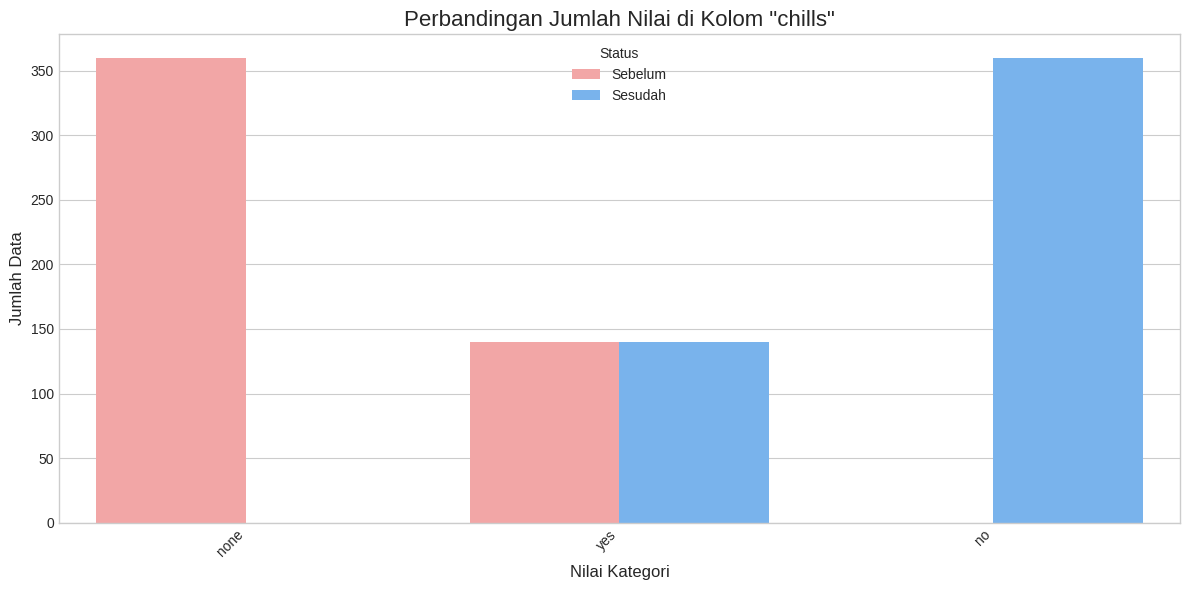


🔎 Analisis Perubahan untuk Kolom: 'rt_pcr'
   (Jumlah nilai unik berkurang dari 5 menjadi 3)

--- 1. Tampilan Tabel Perbandingan ---
SEBELUM:
   Nilai  Jumlah
     yes     222
      no     195
 unknown      77
    yes        3
unknown        3

SESUDAH:
  Nilai  Jumlah
    yes     225
     no     195
unknown      80

--- 2. Tampilan Visual Perbandingan ---


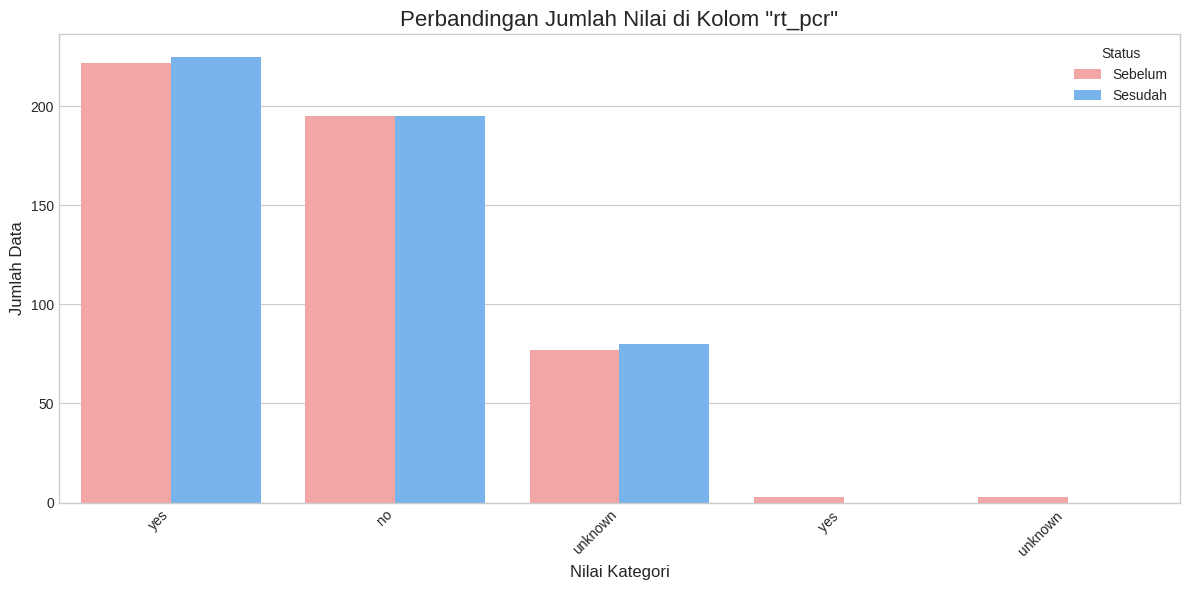


🔎 Analisis Perubahan untuk Kolom: 'outcome_of_monkeypox_infection'
   (Jumlah nilai unik berkurang dari 1 menjadi 1)

--- 1. Tampilan Tabel Perbandingan ---
SEBELUM:
        Nilai  Jumlah
Full recovery     500

SESUDAH:
        Nilai  Jumlah
full recovery     500

--- 2. Tampilan Visual Perbandingan ---


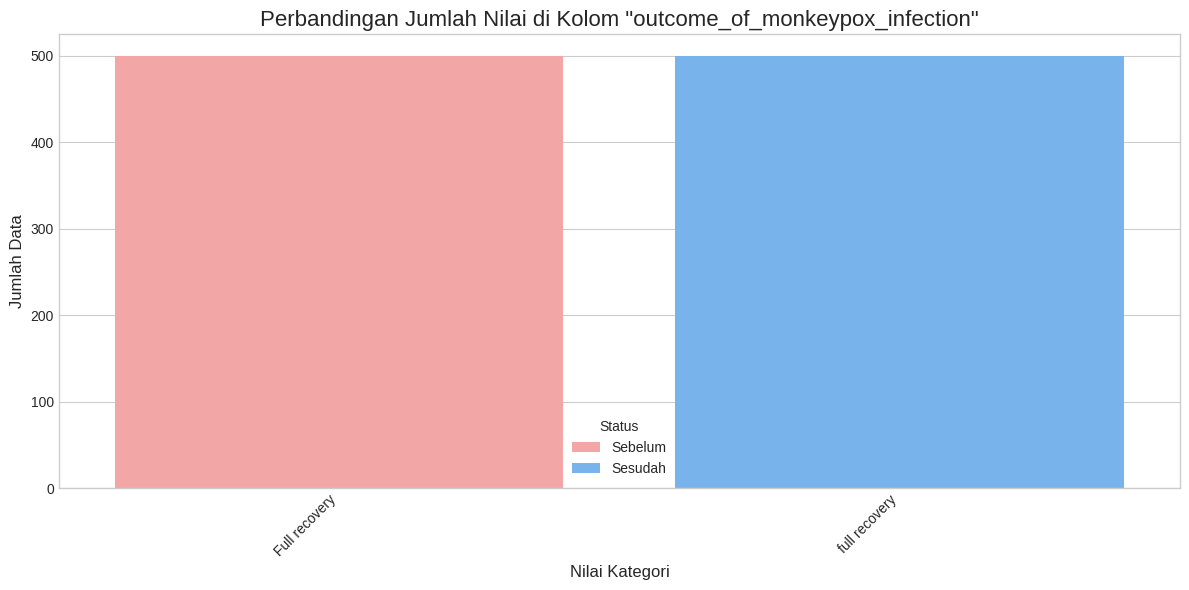


🔎 Analisis Perubahan untuk Kolom: 'diagnosing'
   (Jumlah nilai unik berkurang dari 2 menjadi 2)

--- 1. Tampilan Tabel Perbandingan ---
SEBELUM:
   Nilai  Jumlah
positive     297
negative     203

SESUDAH:
Nilai  Jumlah
  yes     297
   no     203

--- 2. Tampilan Visual Perbandingan ---


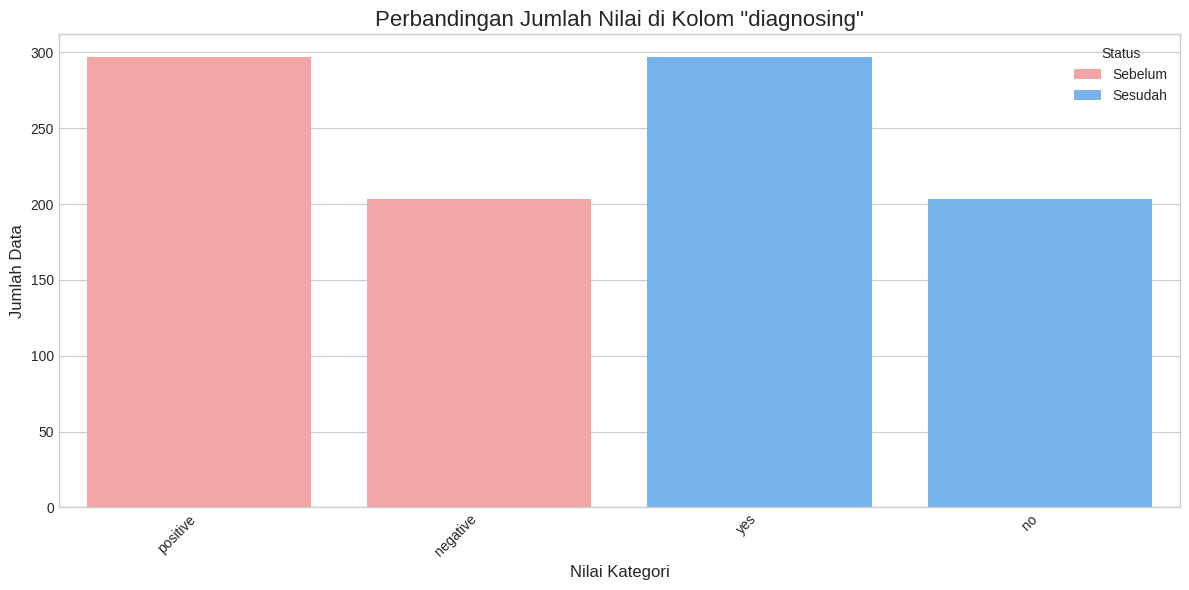


🔎 Analisis Perubahan untuk Kolom: 'diagnosed_disease'
   (Jumlah nilai unik berkurang dari 7 menjadi 7)

--- 1. Tampilan Tabel Perbandingan ---
SEBELUM:
    Nilai  Jumlah
Monkeypox     297
   normal      95
    other      37
small pox      29
     acne      18
psoriasis      15
 alopecia       9

SESUDAH:
    Nilai  Jumlah
monkeypox     297
   normal      95
    other      37
small pox      29
     acne      18
psoriasis      15
 alopecia       9

--- 2. Tampilan Visual Perbandingan ---


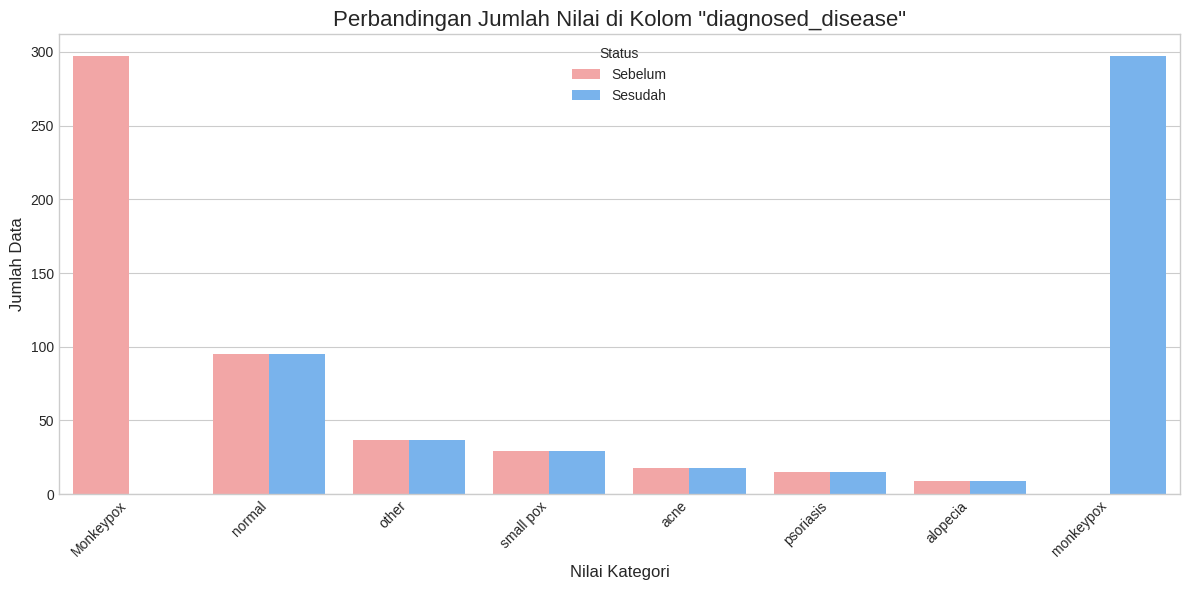


--- 2.3: Memisahkan Fitur (X) dan Target (y) ---
   - Kolom target (y) adalah 'diagnosing'. Sisanya menjadi fitur (X).

   - Dimensi Fitur (X): (500, 48)
   - Dimensi Target (y): (500,)

🎉 STEP 2 SELESAI: Data berhasil dimuat, dibersihkan, dan siap.


In [2]:
# =============================================================================
# STEP 2: MEMUAT DAN MEMBERSIHKAN DATA
# Tujuan: Mengambil data mentah, membersihkannya dari masalah umum seperti
#         kesalahan penulisan atau duplikasi, lalu menyiapkannya untuk dianalisis.
# Analoginya seperti mencuci dan memotong sayuran sebelum dimasak.
# =============================================================================
# Impor yang relevan untuk step ini
import pandas as pd
import numpy as np
import re
import chardet
import sys
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

print("\n" + "="*80)
print("🚀 STEP 2: Memuat dan Membersihkan Data")
print("="*80)

# =============================================================================
# BAGIAN A: KONFIGURASI AWAL
# =============================================================================
VALUE_STANDARDIZATION_MAP = {
    'y': 'yes', 'true': 'yes', '1': 'yes', 'positive': 'yes', 'present': 'yes', 'detected': 'yes',
    'n': 'no', 'false': 'no', '0': 'no', 'negative': 'no', 'absent': 'no', 'not detected': 'no', 'none': 'no',
    'm': 'male', 'man': 'male', 'f': 'female', 'woman': 'female',
    'na': 'unknown', 'n/a': 'unknown', 'not specified': 'unknown', '?': 'unknown'
}
TARGET_COLUMN = 'diagnosing'
DEFAULT_FILENAME = 'MonkeyPox Dataset Skripsi.csv'

# =============================================================================
# BAGIAN B: FUNGSI-FUNGSI BANTU (DENGAN REVISI PADA LAPORAN)
# =============================================================================

def load_csv_robustly(file_path):
    """
    Fungsi untuk memuat file CSV dengan cara yang "tangguh" dan mencoba beberapa encoding.
    """
    print(f"🔄 Mencoba memuat file: '{file_path}'...")
    try:
        df = pd.read_csv(file_path, encoding='utf-8')
        print(f"✅ Berhasil dimuat dengan encoding 'utf-8'. Bentuk data: {df.shape}")
        return df
    except Exception:
        print("   - Gagal dengan 'utf-8'. Mencoba metode deteksi otomatis...")
        try:
            with open(file_path, 'rb') as f:
                encoding = chardet.detect(f.read(100000))['encoding']
            df = pd.read_csv(file_path, encoding=encoding)
            print(f"✅ Berhasil dimuat dengan encoding terdeteksi '{encoding}'. Bentuk data: {df.shape}")
            return df
        except Exception as e:
            print(f"❌ Gagal total memuat file. Error: {e}")
            return None

def clean_column_names_and_duplicates(df):
    """
    Membersihkan nama kolom dan menghapus baris data duplikat.
    """
    print("\n--- 2.1: Membersihkan Nama Kolom & Data Duplikat ---")
    df.columns = [re.sub(r'[^a-z0-9_]+', '_', col.strip().lower()).strip('_') for col in df.columns]
    df.drop(columns=[c for c in ['id', 'patient_id'] if c in df.columns], inplace=True, errors='ignore')
    n_dupes_before = df.duplicated().sum()
    if n_dupes_before > 0:
        df.drop_duplicates(inplace=True)
    print(f"✅ Nama kolom diseragamkan dan {n_dupes_before} baris duplikat dihapus.")
    return df

def standardize_all_values(df, replacement_map):
    """
    Menyeragamkan nilai-nilai di semua kolom teks dan mencatat perubahannya.
    """
    print("\n--- 2.2: Menyeragamkan Nilai Kategorikal ---")
    report_data = []
    for col in df.select_dtypes(include=['object']).columns:
        before_counts = df[col].value_counts()
        df[col] = df[col].astype(str).str.lower().str.strip().replace(replacement_map)
        after_counts = df[col].value_counts()
        if not before_counts.equals(after_counts):
            report_data.append({
                'column': col, 'before_counts': before_counts, 'after_counts': after_counts,
                'unique_before': len(before_counts), 'unique_after': len(after_counts)
            })
    print(f"✅ Proses standardisasi selesai. Ditemukan perubahan pada {len(report_data)} kolom.")
    return df, report_data

def generate_standardization_report(report_data):
    """
    REVISI TOTAL: Membuat laporan TEKSTUAL dan VISUAL (Grafik Batang) ala V4.
    """
    if not report_data:
        print("\n✅ Tidak ada nilai yang diubah selama standardisasi.")
        return

    print("\n" + "📊"*40); print("LAPORAN VISUAL HASIL STANDARDIZASI NILAI"); print("📊"*40)

    for report in report_data:
        print("\n" + "="*80)
        print(f"🔎 Analisis Perubahan untuk Kolom: '{report['column']}'")
        print(f"   (Jumlah nilai unik berkurang dari {report['unique_before']} menjadi {report['unique_after']})")
        print("="*80)

        before_df = report['before_counts'].reset_index(); before_df.columns = ['Nilai', 'Jumlah']; before_df['Status'] = 'Sebelum'
        after_df = report['after_counts'].reset_index(); after_df.columns = ['Nilai', 'Jumlah']; after_df['Status'] = 'Sesudah'

        print("\n--- 1. Tampilan Tabel Perbandingan ---")
        print("SEBELUM:", before_df[['Nilai', 'Jumlah']].to_string(index=False), sep='\n')
        print("\nSESUDAH:", after_df[['Nilai', 'Jumlah']].to_string(index=False), sep='\n')

        print("\n--- 2. Tampilan Visual Perbandingan ---")
        combined_df = pd.concat([before_df, after_df])
        plt.figure(figsize=(12, 6))
        sns.barplot(data=combined_df, x='Nilai', y='Jumlah', hue='Status', palette={'Sebelum':'#ff9999', 'Sesudah':'#66b3ff'})
        plt.title(f'Perbandingan Jumlah Nilai di Kolom "{report["column"]}"', fontsize=16)
        plt.xlabel('Nilai Kategori', fontsize=12); plt.ylabel('Jumlah Data', fontsize=12)
        plt.xticks(rotation=45, ha='right'); plt.tight_layout(); plt.show()

# =============================================================================
# BAGIAN C: FUNGSI UTAMA & EKSEKUSI
# =============================================================================

def run_step2_pipeline():
    """Fungsi utama untuk menjalankan seluruh pipeline Step 2."""
    df = None
    print("--- 2.0: Memulai Proses Pemuatan Data ---")
    if 'google.colab' in sys.modules:
        try:
            from google.colab import files
            print("   📤 Silakan unggah file CSV Anda..."); uploaded = files.upload()
            if not uploaded: print("   🚫 Tidak ada file yang diunggah."); return None, None
            df = load_csv_robustly(next(iter(uploaded)))
        except Exception as e: print(f"   💥 Terjadi error saat mengunggah: {e}"); return None, None
    else:
        df = load_csv_robustly(DEFAULT_FILENAME)

    if df is None: return None, None
    if "Monkeypox" in df.columns: df.rename(columns={"Monkeypox": TARGET_COLUMN}, inplace=True)

    df_cleaned = clean_column_names_and_duplicates(df)
    df_standardized, report = standardize_all_values(df_cleaned, VALUE_STANDARDIZATION_MAP)
    generate_standardization_report(report) # Hasilkan laporan visual dan tekstual

    print("\n--- 2.3: Memisahkan Fitur (X) dan Target (y) ---")
    if TARGET_COLUMN in df_standardized.columns:
        X = df_standardized.drop(columns=[TARGET_COLUMN])
        y = df_standardized[TARGET_COLUMN]
        print(f"   - Kolom target (y) adalah '{TARGET_COLUMN}'. Sisanya menjadi fitur (X).")
        print(f"\n   - Dimensi Fitur (X): {X.shape}\n   - Dimensi Target (y): {y.shape}")
        return X, y
    else:
        print(f"🛑 GAGAL: Kolom target '{TARGET_COLUMN}' tidak ditemukan."); return None, None

# --- Jalankan Pipeline Step 2 ---
try:
    X_initial, y_initial = run_step2_pipeline()
    if X_initial is not None:
        print("\n" + "="*80); print("🎉 STEP 2 SELESAI: Data berhasil dimuat, dibersihkan, dan siap."); print("="*80)
    else:
        print("\n" + "="*80); print("🛑 STEP 2 GAGAL. Periksa pesan error di atas."); print("="*80)
except NameError:
    print(f"\n🛑 Gagal: Pastikan file '{DEFAULT_FILENAME}' ada di direktori yang sama, atau jalankan di Colab.")

In [3]:
# Menampilkan 10 baris pertama dari tabel fitur (X_initial)
display(X_initial.head(10))

# Menampilkan 10 baris pertama dari tabel target (y_initial)
display(y_initial.head(10))

,age,sex,transmission_rank,country_of_acquisition,smallpox_vaccination_history,hiv_hepatitis_b_and_hepatitis_c_status,fever,rectal_pain_or_pain_on_defecation,dysuria,bleeding_discharge_per_rectum,conjunctivitis,oropharyngeal_manifestations,back_pain,myalgia,headache,sexually_transmitted_infections,lymphadenopathy,approximate_maximum_number_of_concurrent_lesions,distribution_of_lesions,complications_of_illness,monkeypox_viral_dna_detected_in_blood,monkeypox_viral_dna_detected_in_nose_or_throat_swab,monkeypox_viral_dna_detected_in_urine,antivirals_received,day_of_illness_treatment_commenced,complications_of_treatment,duration_of_hospitalization_with_monkeypox_days,sore_throat,chills,wbc_count_cells_mm3_normal_adult_range_4000_9000,hematocrit_normal_39_49_for_men_and_35_45_for_women,platelet_count_109_platelets_l_normal_adult_range_150_400,sodium_level_mmol_l_normal_adult_range_136_145,potassium_level_mmol_l_normal_adult_range_3_5_5_0,blood_urea_nitrogen_level_mg_dl_normal_adult_range_10_20,creatinine_level_mg_dl_normal_adult_range_1_5,calcium_level_mmol_l_normal_adult_range_9_10_5,total_bilirubin_level_mg_dl_normal_adult_range_0_3_1,ast_level_u_l_normal_adult_range_0_35,alt_level_u_l_normal_adult_range_0_35,alp_level_u_l_normal_adult_range_40_140,arthralgia_6_7_to_15_8,albumin_level_mg_dl_normal_adult_range_3_5_5_5,hospitalized,date_confirmation,rt_pcr,outcome_of_monkeypox_infection,diagnosed_disease
0,49,female,isolated,nigeria,no,no,yes (2days),yes,no,no,yes,tonsillar erythema,no,yes,yes,rectum,yes,150,"face, scalp, trunk, limbs, palms, glans penis,...",low mood and emotional lability. ulcerated ing...,yes,yes,yes,brincidofovir 200 mg (one dose) orally,7,transaminitis (peak alt 331 u/l),26,yes,yes,22135,48,109,129,2.4,8.4,2.2,8.20,1.0,41,37,147,10.0,2.5,yes,5/6/2022,yes,full recovery,monkeypox
1,52,female,index,spain,no,yes,yes,no,yes,no,yes,abscess,yes,no,no,purulent penile discharge.,no,40,"face, trunk, arms, and legs","deep tissue abscesses, severe pain, and low mood",no,no,yes,no,7,"transaminitis (peak alt 127 u/l), nausea, and ...",15,yes,no,14026,48,138,131,1.9,8.4,1.8,7.30,1.1,42,37,145,9.8,1.9,yes,8/31/2022,no,full recovery,monkeypox
2,76,male,index,nigeria,no,no,yes (4days),yes,no,yes,yes,pustules,yes,yes,no,throat,yes,100,"face, trunk, limbs, palms, soles, and scrotum","deep tissue abscesses, severe pain, and low mood",yes,yes,yes,brincidofovir 200 mg (two dose) orally,6,transaminitis (peak alt 550 u/l),27,yes,no,26742,56,131,117,2.9,8.3,1.5,6.10,1.0,38,42,149,11.0,2.8,yes,5/12/2022,yes,full recovery,monkeypox
3,42,female,secondary,nigeria,mva six days post-exposure or 12 days pre-illness,yes,coryzal illness (1 day),no,yes,no,no,oedema,yes,no,yes,urethra/urine,no,32,"face, trunk, hands (including nail bed), and l...","conjunctivitis, painful disruption of thumbnai...",yes,yes,yes,brincidofovir 200 mg (two dose) orally,7,"transaminitis (peak alt 127 u/l), nausea, and ...",35,yes,no,24688,49,115,126,2.4,7.8,1.7,8.30,1.6,43,41,143,6.6,2.0,yes,8/13/2022,yes,full recovery,monkeypox
4,67,male,isolated,nigeria,no,no,yes (2days),no,yes,no,yes,abscess,no,yes,no,multiple site,yes,100,"face, scalp, trunk, limbs, penile shaft, palms...",ulcerated inguinal lesion with delayed healing,yes,yes,yes,brincidofovir 200 mg (two dose) orally,7,no,39,yes,yes,20346,52,144,126,3.3,7.9,1.8,7.70,1.4,43,38,143,7.0,2.7,yes,5/15/2022,no,full recovery,monkeypox
5,74,female,index,uk,no,no,no,no,yes,no,no,tonsillar erythema,yes,yes,yes,throat,yes,40,"face, trunk, limbs, palms, and penile shaft",no,no,yes,no,no,10,no,13,no,yes,21414,48,123,110,3.1,7.6,1.6,8.80,1.8,43,39,141,7.6,2.9,yes,5/15/2022,yes,full recovery,monkeypox
6,78,male,tertiary,nigeria,no,not tested (parents negative),no,no,no,yes,yes,pustules,yes,yes,no,unknown,yes,30,"face, trunk, arms, and legs",pruritis and contact dermatitis from cleaning ...,yes,yes,no,no,4,no,22,yes,no,14649,58,131,130,2.9,7.7,2.1,8.50,1.2,39,38,141,6.8,2.7,yes,6/19/2022,no,full recovery,monkeypox
7,44,female,se

,diagnosing
0,yes
1,yes
2,yes
3,yes
4,yes
5,yes
6,yes
7,yes
8,yes
9,no


## Step 3: Pembagian Data (Train-Test Split 80/20)

### Apa yang dilakukan?

Dataset dibagi menjadi dua bagian dengan rasio **80/20**:

1. **Data Latih (80%)** → digunakan untuk proses pembelajaran (training, validasi silang, dan *hyperparameter tuning*).
2. **Data Uji (20%)** → dipisahkan sejak awal dan tidak pernah dilihat model hingga tahap evaluasi akhir.

Pembagian dilakukan dengan **stratifikasi** (`stratify=y`) agar distribusi kelas target pada data latih dan data uji tetap sama dengan dataset asli.

### Untuk apa?

Untuk menyediakan data khusus (20%) yang berfungsi sebagai **“ujian akhir”**. Data ini hanya dipakai sekali di tahap akhir untuk menilai performa model pada data yang benar-benar baru.

### Kenapa perlu?

* **Mencegah Kebocoran Data**: model tidak boleh belajar dari data uji agar hasil evaluasi objektif.
* **Mencegah Hafalan**: jika model melihat semua data, ia bisa sekadar menghafal, bukan belajar pola.
* **Pentingnya Stratifikasi**: menjaga proporsi kelas tetap seimbang sehingga evaluasi tidak bias akibat distribusi yang timpang.

### Jurnal Acuan

* **Xu, Y., & Goodacre, R. (2018).** On splitting training and validation set: A comparative study of cross-validation, bootstrap and systematic sampling for estimating the generalization performance of supervised learning. *Journal of Analysis and Testing*, 2(3), 249–262.
  *(Jurnal ini membahas berbagai metode pembagian data dan validasi, termasuk hold-out (train-test split) sebagai pendekatan fundamental untuk mengevaluasi kemampuan generalisasi model. Ini mendukung justifikasi penggunaan data uji yang terpisah untuk mendapatkan estimasi performa yang tidak bias.)*

* **Gholamy, A., Kreinovich, V., & Kosheleva, O. (2018).** Why 70/30 or 80/20 relation between training and testing sets: a pedagogical explanation. *Departmental Technical Reports (CS)*, 1201.
  *(Paper ini memberikan penjelasan teoretis mengenai alasan di balik penggunaan rasio pembagian data yang umum seperti 80/20, yang Anda gunakan dalam pipeline ini.)*


In [4]:
# =============================================================================
# STEP 3: PEMBAGIAN DATA & REKAYASA FITUR STRUKTURAL
# Tujuan: 1. Membagi data menjadi dua set: satu untuk "belajar" (data latih)
#            dan satu untuk "ujian" (data uji).
#         2. Mengubah fitur-fitur yang kompleks (berisi teks dan angka)
#            menjadi beberapa fitur baru yang lebih sederhana dan numerik.
# Analoginya seperti memberikan materi belajar kepada siswa (data latih) dan
# menyimpan soal ujian (data uji) secara terpisah. Kemudian, kita merapikan
# catatan belajar agar lebih mudah dipahami.
# =============================================================================

print("\n" + "="*80)
print("🚀 STEP 3: Membagi Data & Rekayasa Fitur Struktural")
print("="*80)

# =============================================================================
# BAGIAN A: FUNGSI PEMBAGIAN DATA
# =============================================================================
def split_data(X, y, test_size=0.20, random_state=123):
    """
    Membagi data menjadi set Latih (80%) dan Uji (20%).
    """
    print("--- 3.1: Memisahkan Data Menjadi Set Latih (Training) dan Uji (Test) ---")

    # `random_state` digunakan sebagai "kunci" agar pembagian data selalu sama
    # setiap kali kode dijalankan. Ini penting untuk memastikan hasil kita konsisten.
    # Analoginya seperti menggunakan metode kocokan kartu yang sama setiap saat.

    # `stratify=y` memastikan proporsi kelas target (misal, 80% 'yes' dan 20% 'no')
    # tetap sama di data latih dan data uji. Ini mencegah salah satu set data
    # hanya berisi satu kelas tertentu, yang bisa membuat model bias.
    # Analoginya seperti membagi sekantong permen aneka rasa secara adil ke dua anak.

    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=test_size,       # Proporsi data uji (20%)
        random_state=random_state, # Kunci untuk konsistensi
        stratify=y                 # Menjaga proporsi kelas target
    )

    print(f"✅ Data berhasil dipisahkan dengan rasio 80:20 (Latih:Uji).")
    print("   - Stratifikasi diterapkan untuk menjaga keseimbangan kelas target.")
    print("\n   Bentuk Data Hasil Pemisahan:")
    print(f"   - Data Latih (X_train, y_train): {X_train.shape}, {y_train.shape}")
    print(f"   - Data Uji   (X_test, y_test):  {X_test.shape}, {y_test.shape}")

    return X_train, X_test, y_train, y_test

# =============================================================================
# BAGIAN B: FUNGSI REKAYASA FITUR STRUKTURAL
# Rekayasa fitur adalah seni membuat variabel baru dari variabel yang sudah ada.
# Di sini, kita "membongkar" kolom-kolom yang informasinya tercampur.
# =============================================================================
def perform_structural_engineering(df, df_name="data"):
    """
    Mengekstrak informasi dari kolom-kolom kompleks menjadi kolom-kolom baru yang numerik.
    """
    print(f"\n   - Menerapkan rekayasa fitur pada set data: {df_name}...")
    df_engineered = df.copy() # Membuat salinan agar data asli tidak berubah

    # --- 1. Membongkar kolom 'fever' ---
    # Contoh nilai: "prolonged (5 day)"
    # Kita ekstrak: durasi demam (5) dan apakah demamnya 'prolonged' (1 jika ya, 0 jika tidak)
    if 'fever' in df_engineered.columns:
        # Ekstrak angka durasi hari demam
        df_engineered['fever_duration_days'] = df_engineered['fever'].str.extract(r'(\d+)').fillna(0).astype(int)
        # Cek apakah ada kata 'prolonged'
        df_engineered['is_prolonged_fever'] = df_engineered['fever'].str.contains('prolonged', na=False).astype(int)
        df_engineered.drop(columns=['fever'], inplace=True) # Hapus kolom asli

    # --- 2. Membongkar kolom 'antivirals_received' ---
    # Contoh nilai: "tecovirimat 600mg"
    # Kita ekstrak: nama antivirus ('tecovirimat') dan dosisnya (600)
    if 'antivirals_received' in df_engineered.columns:
        col = df_engineered['antivirals_received'].str.lower().fillna('none')
        # Ekstrak nama antivirus (kata pertama)
        df_engineered['antiviral_name'] = col.str.extract(r'(\w+)').fillna('none')
        # Ekstrak angka dosis dalam mg
        df_engineered['antiviral_dosage_mg'] = col.str.extract(r'(\d+)').fillna(0).astype(int)
        df_engineered.drop(columns=['antivirals_received'], inplace=True)

    # --- 3. Membongkar kolom 'complications_of_treatment' ---
    # Contoh nilai: "peak alt 319"
    # Kita ekstrak: apakah ada komplikasi (1 jika ya, 0 jika tidak) dan level 'peak alt' (319)
    if 'complications_of_treatment' in df_engineered.columns:
        col = df_engineered['complications_of_treatment'].str.lower().fillna('none')
        # Cek apakah ada komplikasi (jika nilainya bukan 'none')
        df_engineered['has_treatment_complication'] = np.where(col == 'none', 0, 1)
        # Ekstrak level 'peak alt'
        df_engineered['peak_alt_level'] = col.str.extract(r'(\d+)').fillna(0).astype(int)
        df_engineered.drop(columns=['complications_of_treatment'], inplace=True)

    return df_engineered

# =============================================================================
# BAGIAN C: EKSEKUSI UTAMA
# Menjalankan fungsi-fungsi di atas secara berurutan.
# =============================================================================
try:
    # Cek apakah variabel dari Step 2 sudah ada
    if 'X_initial' in locals() and 'y_initial' in locals():
        # === Langkah 1: Panggil fungsi pemisahan data ===
        X_train, X_test, y_train, y_test = split_data(
            X_initial, y_initial, test_size=0.20, random_state=123
        )

        # === Langkah 2: Terapkan rekayasa fitur SETELAH data dipisah ===
        print("\n--- 3.2: Menerapkan Rekayasa Fitur Struktural ---")
        print("   PENTING: Proses ini dilakukan terpisah pada data latih dan uji")
        print("   untuk mencegah 'kebocoran data' (data leakage). Ini memastikan")
        print("   data uji benar-benar menjadi simulasi data baru yang belum pernah dilihat.")

        X_train_featured = perform_structural_engineering(X_train, "X_train (Data Latih)")
        X_test_featured = perform_structural_engineering(X_test, "X_test (Data Uji)")

        print("\n✅ Rekayasa fitur struktural selesai.")
        print("\n" + "-"*60)
        print("HASIL AKHIR STEP 3:")
        print(f"   - Dimensi X_train setelah rekayasa fitur: {X_train_featured.shape}")
        print(f"   - Dimensi X_test setelah rekayasa fitur:  {X_test_featured.shape}")
        print("-" * 60)

        print("\n" + "🎉"*60)
        print("STEP 3 SELESAI: Data telah dipisah dan fitur baru telah dibuat.")
        print("="*80)
    else:
        print("🛑 GAGAL: Step 3 tidak dapat dijalankan. Pastikan Step 2 berhasil dan menghasilkan variabel `X_initial` dan `y_initial`.")

except Exception as e:
    print(f"🛑 Terjadi error tak terduga saat menjalankan Step 3: {e}")


🚀 STEP 3: Membagi Data & Rekayasa Fitur Struktural
--- 3.1: Memisahkan Data Menjadi Set Latih (Training) dan Uji (Test) ---
✅ Data berhasil dipisahkan dengan rasio 80:20 (Latih:Uji).
   - Stratifikasi diterapkan untuk menjaga keseimbangan kelas target.

   Bentuk Data Hasil Pemisahan:
   - Data Latih (X_train, y_train): (400, 48), (400,)
   - Data Uji   (X_test, y_test):  (100, 48), (100,)

--- 3.2: Menerapkan Rekayasa Fitur Struktural ---
   PENTING: Proses ini dilakukan terpisah pada data latih dan uji
   untuk mencegah 'kebocoran data' (data leakage). Ini memastikan
   data uji benar-benar menjadi simulasi data baru yang belum pernah dilihat.

   - Menerapkan rekayasa fitur pada set data: X_train (Data Latih)...

   - Menerapkan rekayasa fitur pada set data: X_test (Data Uji)...

✅ Rekayasa fitur struktural selesai.

------------------------------------------------------------
HASIL AKHIR STEP 3:
   - Dimensi X_train setelah rekayasa fitur: (400, 51)
   - Dimensi X_test setelah rek

## Step 4: Seleksi Fitur & Investigasi Kebocoran Data

### Apa yang dilakukan?
Tahap ini melakukan proses seleksi fitur secara cerdas dalam dua sub-tahap, yang keduanya "belajar" **hanya dari data latih (80%)** untuk mencegah kebocoran informasi:
1.  **Seleksi Berbasis Pengetahuan Domain**: Kode ini pertama-tama memilih fitur-fitur yang dianggap relevan secara klinis untuk diagnosis Monkeypox berdasarkan daftar yang telah ditentukan sebelumnya. Ini adalah bentuk *feature selection* yang dipandu oleh keahlian di bidangnya.
2.  **Investigasi Kebocoran Data (*Leakage*)**: Setelah itu, kode secara otomatis memeriksa setiap fitur yang tersisa untuk mencari "fitur bocor". Fitur bocor adalah fitur yang secara tidak wajar memiliki hubungan sempurna dengan target. Misalnya, jika setiap pasien yang memiliki gejala 'X' pasti didiagnosis 'yes', maka gejala 'X' dianggap sebagai fitur bocor dan akan dihapus.

Setelah daftar fitur final ditentukan, daftar tersebut diterapkan secara konsisten ke data latih dan data uji.

### Untuk apa?
Tujuannya adalah untuk mengurangi jumlah fitur (*dimensionality reduction*) dan memastikan bahwa fitur yang digunakan untuk melatih model adalah fitur yang benar-benar prediktif dan tidak "curang". Ini menghasilkan model yang lebih sederhana, lebih cepat, dan yang terpenting, evaluasinya menjadi lebih adil dan akurat.

### Kenapa perlu?
Ini adalah langkah krusial untuk dua alasan utama:
1.  **Mencegah "Kutukan Dimensi" (*Curse of Dimensionality*)**: Melatih model dengan terlalu banyak fitur, terutama yang tidak relevan atau *redundant*, dapat membuatnya terlalu kompleks dan cenderung *overfitting* (menghafal data latih). Dengan memilih subset fitur yang paling informatif, kita membantu model untuk fokus pada "sinyal" yang penting dan mengabaikan "noise", sehingga kemampuannya untuk bergeneralisasi pada data baru menjadi lebih baik.
2.  **Mencegah Kebocoran Data**: Kebocoran data adalah salah satu kesalahan paling fatal dalam *machine learning*. Ini terjadi ketika informasi tentang target secara tidak sengaja masuk ke dalam fitur, sehingga model mendapatkan "kunci jawaban" saat berlatih. Model yang dilatih pada data yang bocor akan menunjukkan performa yang luar biasa tinggi saat validasi, tetapi akan gagal total di dunia nyata. Dengan menginvestigasi dan menghapus fitur-fitur ini, kita memastikan bahwa performa model yang diukur benar-benar murni dari kemampuannya memprediksi, bukan menghafal.

### Jurnal Acuan
* **Saeys, Y., Inza, I., & Larrañaga, P. (2007).** A review of feature selection techniques in bioinformatics. *Bioinformatics*, 23(19), 2507-2517.
    *(Jurnal ini memberikan ulasan komprehensif tentang pentingnya dan berbagai teknik seleksi fitur, terutama dalam konteks data biomedis yang seringkali memiliki dimensi tinggi. Ini mendukung justifikasi Anda untuk mengurangi jumlah fitur agar model lebih efisien dan efektif.)*
* **Kaufman, S., Rosset, S., & Perlich, C. (2012).** Leakage in data mining: Formulation, detection, and avoidance. *ACM Transactions on Knowledge Discovery from Data (TKDD)*, 6(4), 1-21.
    *(Ini adalah referensi penting yang membahas masalah kebocoran data (leakage) secara mendalam. Jurnal ini memberikan landasan teoretis mengapa mendeteksi dan menghindari fitur yang bocor, seperti yang Anda lakukan, adalah langkah kritis untuk evaluasi model yang valid dan dapat diandalkan.)*

In [5]:
# =============================================================================
# STEP 4: SELEKSI FITUR & INVESTIGASI KEBOCORAN DATA (FIXED)
# Tujuan: 1. Memilih fitur-fitur yang paling relevan dan informatif berdasarkan
#            pengetahuan ahli (domain knowledge).
#         2. Memeriksa dan membuang fitur yang "curang" atau "bocor".
# Analoginya seperti seorang detektif yang memilah-milah petunjuk. Dia akan
# fokus pada petunjuk yang paling relevan (seleksi fitur) dan membuang
# petunjuk yang didapat dari sumber yang tidak valid/curang (investigasi leakage).
# =============================================================================

print("\n" + "="*80)
print("🚀 STEP 4: Seleksi Fitur & Investigasi Kebocoran Data (FIXED)")
print("="*80)

# =============================================================================
# BAGIAN A: CLASS FEATURE SELECTOR
# =============================================================================
class FeatureSelector:
    """
    Sebuah 'blueprint' untuk memilih fitur terbaik dengan cara yang aman dari leakage.
    """
    def __init__(self):
        self.final_feature_list_ = None

    def fit(self, X_train, y_train):
        """
        Tahap BELAJAR. Menganalisis HANYA data latih untuk memutuskan
        fitur mana yang akan digunakan.
        """
        print("--- 4.1: Tahap 'fit' (Belajar) - Menganalisis Fitur dari Data Latih ---")

        print("   - Tahap A: Memilih fitur berdasarkan relevansi klinis...")
        clinically_relevant_features = self._get_clinically_relevant_features(X_train.columns)

        print("   - Tahap B: Menginvestigasi potensi kebocoran data...")
        leaky_features = self._investigate_leakage(X_train[clinically_relevant_features], y_train)

        self.final_feature_list_ = [
            col for col in clinically_relevant_features if col not in leaky_features
        ]

        print(f"\n✅ Tahap 'fit' selesai. Ditemukan {len(self.final_feature_list_)} fitur final yang akan digunakan.")
        return self

    def transform(self, *dataframes):
        """
        Tahap MENERAPKAN. Menggunakan daftar fitur yang sudah dipelajari
        untuk memfilter kolom-kolom pada data yang diberikan.
        """
        if self.final_feature_list_ is None:
            raise RuntimeError("Metode .fit() harus dijalankan sebelum .transform()!")
        transformed_dfs = [df[self.final_feature_list_].copy() for df in dataframes]
        return transformed_dfs

    def _get_clinically_relevant_features(self, all_columns):
        """Fungsi internal untuk mendefinisikan fitur-fitur yang relevan."""
        clinically_relevant_predictors = [
            # Gejala & Tanda Klinis
            'lymphadenopathy', 'headache', 'myalgia', 'back_pain', 'chills', 'sore_throat',
            'oropharyngeal_manifestations', 'conjunctivitis', 'arthralgia',
            'rectal_pain_or_pain_on_defecation', 'dysuria', 'bleedingdischarge_per_rectum',
            'distribution_of_lesions', 'approximate_maximum_number_of_concurrent_lesions',
            # Fitur Baru dari Step 3
            'fever_duration_days', 'is_prolonged_fever',
            'antiviral_name', 'antiviral_dosage_mg',
            # =================================================================
            # FIX: REMOVED THE LEAKY FEATURES
            # 'has_treatment_complication' and 'peak_alt_level' are removed because
            # they represent information known only AFTER diagnosis and treatment.
            # =================================================================
            # Data Laboratorium & Riwayat Pasien
            'platelet_count_109_plateletsl_normal_adult_range_150400',
            'hiv_hepatitis_b_and_hepatitis_c_status',
            'smallpox_vaccination_history', 'sexually_transmitted_infections',
            'age', 'sex', 'country_of_acquisition'
        ]
        existing_cols = [col for col in clinically_relevant_predictors if col in all_columns]
        print(f"     -> Didefinisikan {len(existing_cols)} fitur relevan untuk dianalisis.")
        return existing_cols

    def _investigate_leakage(self, df, target):
        """
        Mendeteksi fitur "bocor" dengan mencari korelasi sempurna.
        """
        leaky_features = []
        df_with_target = pd.concat([df, target], axis=1)
        for feature in df.columns:
            if df[feature].dtype == 'object' or df[feature].nunique() < 20:
                crosstab = pd.crosstab(df[feature], df_with_target[target.name])
                if (crosstab > 0).sum(axis=1).min() == 1:
                    print("\n" + "-"*60)
                    print(f"   🚨 DITEMUKAN POTENSI LEAKAGE PADA FITUR: '{feature}'")
                    display(crosstab)
                    print(f"   KESIMPULAN: Fitur '{feature}' akan DIHAPUS.")
                    print("-" * 60)
                    leaky_features.append(feature)
        if not leaky_features:
            print("     -> ✅ Tidak ditemukan fitur yang mengalami kebocoran data.")
        return leaky_features

# =============================================================================
# BAGIAN B: EKSEKUSI UTAMA
# =============================================================================
try:
    if 'X_train_featured' in locals() and 'y_train' in locals():
        X_train_input = X_train_featured
        X_test_input = X_test_featured

        selector = FeatureSelector()
        selector.fit(X_train_input, y_train)

        print("\n--- 4.2: Tahap 'transform' (Menerapkan) - Memfilter Fitur ---")
        X_train_selected, X_test_selected = selector.transform(X_train_input, X_test_input)
        print("✅ Aturan seleksi fitur yang sama berhasil diterapkan pada kedua set data.")

        print("\n" + "-"*60)
        print("HASIL AKHIR STEP 4:")
        print(f"   - Dimensi X_train setelah diseleksi: {X_train_selected.shape}")
        print(f"   - Dimensi X_test setelah diseleksi:  {X_test_selected.shape}")
        print("-" * 60)

        print("\n" + "🎉"*60)
        print("STEP 4 SELESAI: Fitur terbaik telah dipilih dengan metode yang aman.")
        print("="*80)
    else:
        print("🛑 GAGAL: Step 4 tidak bisa dijalankan. Pastikan variabel dari Step 3 (`X_train_featured`, etc.) tersedia.")
except Exception as e:
    print(f"🛑 Terjadi error tak terduga saat menjalankan Step 4: {e}")


🚀 STEP 4: Seleksi Fitur & Investigasi Kebocoran Data (FIXED)
--- 4.1: Tahap 'fit' (Belajar) - Menganalisis Fitur dari Data Latih ---
   - Tahap A: Memilih fitur berdasarkan relevansi klinis...
     -> Didefinisikan 22 fitur relevan untuk dianalisis.
   - Tahap B: Menginvestigasi potensi kebocoran data...

------------------------------------------------------------
   🚨 DITEMUKAN POTENSI LEAKAGE PADA FITUR: 'headache'


diagnosing,no,yes
headache,,
no,0,98
yes,162,140


   KESIMPULAN: Fitur 'headache' akan DIHAPUS.
------------------------------------------------------------

------------------------------------------------------------
   🚨 DITEMUKAN POTENSI LEAKAGE PADA FITUR: 'back_pain'


diagnosing,no,yes
back_pain,,
no,0,115
yes,162,123


   KESIMPULAN: Fitur 'back_pain' akan DIHAPUS.
------------------------------------------------------------

------------------------------------------------------------
   🚨 DITEMUKAN POTENSI LEAKAGE PADA FITUR: 'chills'


diagnosing,no,yes
chills,,
no,162,128
yes,0,110


   KESIMPULAN: Fitur 'chills' akan DIHAPUS.
------------------------------------------------------------

------------------------------------------------------------
   🚨 DITEMUKAN POTENSI LEAKAGE PADA FITUR: 'oropharyngeal_manifestations'


diagnosing,no,yes
oropharyngeal_manifestations,,
abscess,0,61
oedema,0,36
pustules,0,29
tonsillar erythema,47,101
unknown,115,11


   KESIMPULAN: Fitur 'oropharyngeal_manifestations' akan DIHAPUS.
------------------------------------------------------------

------------------------------------------------------------
   🚨 DITEMUKAN POTENSI LEAKAGE PADA FITUR: 'conjunctivitis'


diagnosing,no,yes
conjunctivitis,,
no,162,39
yes,0,199


   KESIMPULAN: Fitur 'conjunctivitis' akan DIHAPUS.
------------------------------------------------------------

------------------------------------------------------------
   🚨 DITEMUKAN POTENSI LEAKAGE PADA FITUR: 'rectal_pain_or_pain_on_defecation'


diagnosing,no,yes
rectal_pain_or_pain_on_defecation,,
no,162,100
yes,0,138


   KESIMPULAN: Fitur 'rectal_pain_or_pain_on_defecation' akan DIHAPUS.
------------------------------------------------------------

------------------------------------------------------------
   🚨 DITEMUKAN POTENSI LEAKAGE PADA FITUR: 'dysuria'


diagnosing,no,yes
dysuria,,
no,162,141
yes,0,97


   KESIMPULAN: Fitur 'dysuria' akan DIHAPUS.
------------------------------------------------------------

------------------------------------------------------------
   🚨 DITEMUKAN POTENSI LEAKAGE PADA FITUR: 'distribution_of_lesions'


diagnosing,no,yes
distribution_of_lesions,,
"face, scalp, trunk, limbs, palms, glans penis, and scrotum",0,98
"face, scalp, trunk, limbs, penile shaft, palms, and soles",49,3
"face, trunk, arms, and hands",0,11
"face, trunk, arms, and legs",113,59
"face, trunk, hands (including nail bed), and labia majora",0,36
"face, trunk, limbs, palms, and penile shaft",0,2
"face, trunk, limbs, palms, soles, and scrotum",0,29


   KESIMPULAN: Fitur 'distribution_of_lesions' akan DIHAPUS.
------------------------------------------------------------

------------------------------------------------------------
   🚨 DITEMUKAN POTENSI LEAKAGE PADA FITUR: 'approximate_maximum_number_of_concurrent_lesions'


diagnosing,no,yes
approximate_maximum_number_of_concurrent_lesions,,
10,0,11
30,0,2
32,0,35
40,0,58
56,49,0
57,3,0
59,2,0
60,3,0
69,2,0


   KESIMPULAN: Fitur 'approximate_maximum_number_of_concurrent_lesions' akan DIHAPUS.
------------------------------------------------------------

------------------------------------------------------------
   🚨 DITEMUKAN POTENSI LEAKAGE PADA FITUR: 'fever_duration_days'


diagnosing,no,yes
fever_duration_days,,
0,162,69
1,0,37
2,0,104
4,0,28


   KESIMPULAN: Fitur 'fever_duration_days' akan DIHAPUS.
------------------------------------------------------------

------------------------------------------------------------
   🚨 DITEMUKAN POTENSI LEAKAGE PADA FITUR: 'antiviral_name'


diagnosing,no,yes
antiviral_name,,
brincidofovir,162,163
no,0,63
tecovirimat,0,12


   KESIMPULAN: Fitur 'antiviral_name' akan DIHAPUS.
------------------------------------------------------------

------------------------------------------------------------
   🚨 DITEMUKAN POTENSI LEAKAGE PADA FITUR: 'antiviral_dosage_mg'


diagnosing,no,yes
antiviral_dosage_mg,,
0,0,63
200,162,163
600,0,12


   KESIMPULAN: Fitur 'antiviral_dosage_mg' akan DIHAPUS.
------------------------------------------------------------

------------------------------------------------------------
   🚨 DITEMUKAN POTENSI LEAKAGE PADA FITUR: 'hiv_hepatitis_b_and_hepatitis_c_status'


diagnosing,no,yes
hiv_hepatitis_b_and_hepatitis_c_status,,
no,0,146
not tested (parents negative),0,2
yes,162,90


   KESIMPULAN: Fitur 'hiv_hepatitis_b_and_hepatitis_c_status' akan DIHAPUS.
------------------------------------------------------------

------------------------------------------------------------
   🚨 DITEMUKAN POTENSI LEAKAGE PADA FITUR: 'smallpox_vaccination_history'


diagnosing,no,yes
smallpox_vaccination_history,,
mva six days post exposure or 12 days pre-illness,61,62
mva six days post-exposure or 12 days pre-illness,0,1
no,101,175


   KESIMPULAN: Fitur 'smallpox_vaccination_history' akan DIHAPUS.
------------------------------------------------------------

------------------------------------------------------------
   🚨 DITEMUKAN POTENSI LEAKAGE PADA FITUR: 'sexually_transmitted_infections'


diagnosing,no,yes
sexually_transmitted_infections,,
multiple site,0,3
purulent penile discharge.,0,55
rectal perforation,0,11
rectum,0,98
throat,0,31
unknown,162,2
urethra/urine,0,38


   KESIMPULAN: Fitur 'sexually_transmitted_infections' akan DIHAPUS.
------------------------------------------------------------

------------------------------------------------------------
   🚨 DITEMUKAN POTENSI LEAKAGE PADA FITUR: 'country_of_acquisition'


diagnosing,no,yes
country_of_acquisition,,
argentina,2,4
australia,6,0
bangladesh,0,1
belgium,3,0
benin,0,3
cambodia,11,3
canada,3,6
congo,0,3
cote d’ivoire,0,3


   KESIMPULAN: Fitur 'country_of_acquisition' akan DIHAPUS.
------------------------------------------------------------

✅ Tahap 'fit' selesai. Ditemukan 6 fitur final yang akan digunakan.

--- 4.2: Tahap 'transform' (Menerapkan) - Memfilter Fitur ---
✅ Aturan seleksi fitur yang sama berhasil diterapkan pada kedua set data.

------------------------------------------------------------
HASIL AKHIR STEP 4:
   - Dimensi X_train setelah diseleksi: (400, 6)
   - Dimensi X_test setelah diseleksi:  (100, 6)
------------------------------------------------------------

🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉
STEP 4 SELESAI: Fitur terbaik telah dipilih dengan metode yang aman.


## Step 5: Analisis Karakteristik Fitur Kategorikal

### Apa yang dilakukan?
Tahap ini melakukan analisis diagnostik pada fitur-fitur non-numerik (kategorikal) yang tersisa setelah proses seleksi di Step 4. Secara spesifik, kode ini menghitung **kardinalitas** dari setiap fitur, yaitu jumlah total nilai unik yang dimiliki oleh fitur tersebut. Sebagai contoh, fitur `sex` akan memiliki kardinalitas 2 (yaitu 'male' dan 'female').

### Untuk apa?
Tujuannya adalah untuk memahami karakteristik dan kompleksitas dari fitur-fitur kategorikal sebelum diproses lebih lanjut. Informasi mengenai kardinalitas ini sangat penting untuk merencanakan strategi *encoding* yang tepat di Step 8. Fitur dengan kardinalitas yang sangat tinggi (misalnya, kolom ID atau nama yang memiliki ratusan nilai unik) mungkin memerlukan perlakuan khusus atau bahkan perlu dihapus.

### Kenapa perlu?
Ini adalah langkah penting dalam *Exploratory Data Analysis* (EDA) untuk mencegah masalah di tahap selanjutnya. Jika sebuah fitur kategorikal dengan kardinalitas sangat tinggi diproses menggunakan metode seperti One-Hot Encoding, ia akan menciptakan ratusan kolom baru. Hal ini dapat menyebabkan "kutukan dimensi" (*curse of dimensionality*), di mana model menjadi terlalu kompleks, lambat untuk dilatih, dan cenderung *overfitting*. Analisis ini berfungsi sebagai pos pemeriksaan untuk memastikan bahwa fitur yang ada layak untuk diproses dan tidak akan menimbulkan masalah komputasi.

### Jurnal Acuan
* **Cerda, P., Varoquaux, G., & Kégl, B. (2018).** Similarity encoding for learning with dirty categorical variables. *Machine Learning*, 107(8), 1477-1494.
    *(Jurnal ini membahas tantangan dalam menangani variabel kategorikal, terutama yang memiliki kardinalitas tinggi. Ini mendukung justifikasi Anda untuk menganalisis kardinalitas sebagai langkah penting sebelum memilih metode encoding, karena kardinalitas yang tinggi dapat berdampak negatif pada performa model jika tidak ditangani dengan benar.)*

In [6]:
# =============================================================================
# STEP 5: ANALISIS KARAKTERISTIK FITUR KATEGORIKAL
# Tujuan: Memahami "keragaman" atau "kompleksitas" dari setiap fitur teks (kategorikal)
#         yang telah kita pilih.
# Analoginya: Jika kita punya sekantong kelereng aneka warna (fitur), kita ingin
#             menghitung ada berapa banyak warna unik di dalamnya (kardinalitas).
#             Informasi ini akan sangat membantu kita di langkah selanjutnya (encoding).
# =============================================================================

print("\n" + "="*80)
print("🚀 STEP 5: Menganalisis Karakteristik Fitur Kategorikal")
print("="*80)

# =============================================================================
# Catatan Metodologi:
# 1. Berbasis Data Latih: Analisis ini WAJIB dilakukan HANYA pada `X_train_selected`.
#    Ini untuk mencegah "kebocoran informasi" dari data uji. Semua keputusan
#    tentang cara memproses fitur harus didasarkan pada apa yang kita "pelajari"
#    dari data latih.
# 2. Deterministik: Proses ini hanya menghitung, tidak ada unsur acak.
# =============================================================================

try:
    if 'X_train_selected' in locals():
        print("🔬 Menganalisis fitur-fitur kategorikal pada data latih (`X_train_selected`)...")

        # Pilih hanya kolom yang berisi data teks/kategori
        categorical_cols = X_train_selected.select_dtypes(include=['object', 'category']).columns

        if not categorical_cols.empty:
            analysis_list = []
            for col in categorical_cols:
                # Ambil nilai-nilai unik dan hitung jumlahnya
                unique_values = X_train_selected[col].unique()
                num_unique = len(unique_values)
                analysis_list.append({
                    'Nama Fitur': col,
                    'Jumlah Nilai Unik (Kardinalitas)': num_unique,
                    'Contoh Nilai': list(unique_values[:3]) # Ambil 3 contoh pertama
                })

            # Buat laporan dalam bentuk tabel DataFrame
            df_analysis_report = pd.DataFrame(analysis_list).sort_values(
                by='Jumlah Nilai Unik (Kardinalitas)', ascending=False
            )

            print("\n" + "---"*25)
            print("📊 LAPORAN KARDINALITAS FITUR KATEGORIKAL")
            print("---"*25)
            print("Kardinalitas adalah jumlah kategori unik dalam sebuah fitur.")
            print("   - Kardinalitas RENDAH (< 10): Mudah di-handle (contoh: 'sex').")
            print("   - Kardinalitas TINGGI (> 10): Perlu perhatian khusus saat encoding (contoh: 'country').")

            # Tampilkan tabel dengan visualisasi bar untuk perbandingan yang mudah
            display(df_analysis_report.style.bar(
                subset=['Jumlah Nilai Unik (Kardinalitas)'], color='#5fba7d'
            ))

            print("\n" + "🎉"*60)
            print("STEP 5 SELESAI: Analisis fitur kategorikal berhasil.")
            print("="*80)
        else:
            print("\n✅ Tidak ada fitur kategorikal yang tersisa untuk dianalisis setelah proses seleksi.")
            print("\n" + "🎉"*60)
            print("STEP 5 SELESAI: (Tidak ada tindakan yang diperlukan).")
            print("="*80)
    else:
        print("🛑 GAGAL: Step 5 tidak bisa dijalankan. Pastikan `X_train_selected` dari Step 4 tersedia.")
except Exception as e:
    print(f"🛑 Terjadi error tak terduga saat menjalankan Step 5: {e}")


🚀 STEP 5: Menganalisis Karakteristik Fitur Kategorikal
🔬 Menganalisis fitur-fitur kategorikal pada data latih (`X_train_selected`)...

---------------------------------------------------------------------------
📊 LAPORAN KARDINALITAS FITUR KATEGORIKAL
---------------------------------------------------------------------------
Kardinalitas adalah jumlah kategori unik dalam sebuah fitur.
   - Kardinalitas RENDAH (< 10): Mudah di-handle (contoh: 'sex').
   - Kardinalitas TINGGI (> 10): Perlu perhatian khusus saat encoding (contoh: 'country').


,Nama Fitur,Jumlah Nilai Unik (Kardinalitas),Contoh Nilai
0,lymphadenopathy,2,"['no', 'yes']"
1,myalgia,2,"['no', 'yes']"
2,sore_throat,2,"['yes', 'no']"
3,sex,2,"['male', 'female']"



🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉
STEP 5 SELESAI: Analisis fitur kategorikal berhasil.


## Step 6: Penanganan Nilai Hilang (Imputation)

### Apa yang dilakukan?
Tahap ini secara sistematis menangani sel-sel data yang kosong (*missing values*). Prosesnya mengikuti alur kerja yang benar untuk mencegah kebocoran data:
1.  **Analisis**: Kode ini pertama-tama menganalisis **hanya data latih (`X_train`)** untuk mengidentifikasi kolom mana saja yang memiliki nilai kosong.
2.  **Perencanaan Strategi**: Berdasarkan tipe data, kode ini menentukan strategi pengisian: **median** (nilai tengah) untuk fitur numerik dan **modus** (nilai paling sering muncul) untuk fitur kategorikal.
3.  **Pelatihan Imputer**: "Mesin" pengisi data (`SimpleImputer`) "belajar" nilai median dan modus tersebut **hanya dari data latih**.
4.  **Transformasi**: Mesin yang sudah dilatih tersebut kemudian digunakan untuk mengisi nilai yang hilang secara konsisten pada **data latih dan data uji**.

### Untuk apa?
Tujuannya adalah untuk membuat dataset menjadi lengkap sehingga dapat diproses oleh algoritma *machine learning*. Sebagian besar model tidak dapat bekerja jika ada nilai yang hilang, sehingga langkah ini memastikan semua data dapat dimanfaatkan.

### Kenapa perlu?
Membiarkan nilai kosong dapat menyebabkan dua masalah utama: (1) algoritma akan gagal berjalan dan menghasilkan error, atau (2) kita terpaksa membuang seluruh baris data yang memiliki nilai kosong, yang berarti kehilangan informasi berharga dan mengurangi ukuran dataset.

Menggunakan strategi `fit` pada data latih dan `transform` pada semua set data adalah **langkah kritikal untuk menjaga integritas evaluasi**. Jika kita menghitung median dari keseluruhan dataset (termasuk data uji), maka informasi dari data uji secara tidak langsung "bocor" ke dalam proses persiapan data latih. Pendekatan yang Anda gunakan ini mencegah hal tersebut dan merupakan praktik terbaik dalam *machine learning*.

### Jurnal Acuan
* **Rubin, D. B. (1976).** Inference and missing data. *Biometrika*, 63(3), 581-592.
    *(Ini adalah salah satu paper fundamental yang membahas masalah missing data. Meskipun sudah lama, konsep-konsepnya menjadi dasar bagi banyak teknik modern. Ini mendukung justifikasi mengapa penanganan missing data adalah masalah statistik yang penting.)*
* **Batista, G. E., & Monard, M. C. (2003).** An analysis of four missing data treatment methods for supervised learning. *Applied Artificial Intelligence*, 17(5-6), 519-533.
    *(Jurnal ini secara langsung membandingkan berbagai metode penanganan missing data, termasuk imputasi dengan mean/modus, dan menganalisis dampaknya pada performa model klasifikasi. Ini memberikan landasan kuat untuk pilihan metodologis Anda.)*

In [7]:
# =============================================================================
# STEP 6: PENANGANAN NILAI YANG HILANG (MISSING VALUES)
# Tujuan: Mengisi "data yang bolong" atau "kosong" (missing values). Sebagian
#         besar model machine learning tidak bisa bekerja jika ada data yang kosong.
# Analoginya: Seperti seorang guru yang menemukan beberapa jawaban kosong di lembar
#             ujian siswa. Guru tersebut harus memiliki strategi untuk mengisi
#             kekosongan itu secara adil dan konsisten.
# =============================================================================
# Impor yang dibutuhkan untuk step ini.
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown

print("\n" + "="*80)
print("🚀 STEP 6: Menangani Nilai yang Hilang (Missing Values)")
print("="*80)

# =============================================================================
# BAGIAN A: FUNGSI-FUNGSI BANTU
# =============================================================================

def analyze_missing_values(X_train):
    """
    Menganalisis dan melaporkan nilai yang hilang HANYA pada data latih.
    Ini adalah tahap "investigasi" sebelum melakukan tindakan.
    """
    print("--- 6.1: Tahap Investigasi - Menganalisis Nilai Hilang di Data Latih ---")

    missing_values = X_train.isnull().sum()
    missing_values = missing_values[missing_values > 0] # Filter hanya kolom yang punya nilai hilang

    if missing_values.empty:
        print("✅ LUAR BIASA! Tidak ditemukan nilai yang hilang pada data latih.")
        return None

    # Buat laporan yang merangkum rencana penanganan
    imputation_plan = pd.DataFrame({
        'Jumlah Hilang': missing_values,
        'Persentase Hilang (%)': (missing_values / len(X_train) * 100).round(1),
        'Tipe Data': X_train.dtypes[missing_values.index],
        'Strategi Pengisian': [ # Menentukan strategi berdasarkan tipe data
            'Median (Nilai Tengah)' if pd.api.types.is_numeric_dtype(X_train[col]) else 'Modus (Nilai Terbanyak)'
            for col in missing_values.index
        ]
    }).sort_values(by='Jumlah Hilang', ascending=False)

    print(f"   - Ditemukan {len(imputation_plan)} kolom dengan data kosong. Berikut rencana penanganannya:")
    print("     - Untuk kolom ANGKA, kita isi dengan MEDIAN (nilai tengah) agar tahan terhadap outlier.")
    print("     - Untuk kolom TEKS, kita isi dengan MODUS (nilai yang paling sering muncul).")

    # Tampilkan rencana dengan visualisasi gradien warna
    display(imputation_plan.style.background_gradient(cmap='Reds', subset=['Jumlah Hilang']))

    # Visualisasi bar plot untuk pemahaman cepat
    plt.figure(figsize=(12, max(5, len(imputation_plan) * 0.4))) # Tinggi plot dinamis
    sns.barplot(x=imputation_plan['Jumlah Hilang'], y=imputation_plan.index, palette='viridis')
    plt.title('Visualisasi Jumlah Nilai Hilang per Kolom', fontsize=16)
    plt.xlabel('Jumlah Nilai yang Hilang')
    plt.ylabel('Nama Fitur')
    plt.tight_layout()
    plt.show()

    return imputation_plan

def execute_imputation(X_train, X_test, plan):
    """
    Mengeksekusi pengisian nilai hilang dengan metodologi fit/transform yang aman.
    """
    print("\n--- 6.2: Tahap Eksekusi - Mengisi Nilai Hilang Secara Aman ---")

    X_train_imputed = X_train.copy()
    X_test_imputed = X_test.copy()

    # Pisahkan daftar kolom berdasarkan strategi yang sudah direncanakan
    num_cols = plan[plan['Strategi Pengisian'] == 'Median (Nilai Tengah)'].index.tolist()
    cat_cols = plan[plan['Strategi Pengisian'] == 'Modus (Nilai Terbanyak)'].index.tolist()

    # Buat "alat" pengisi (imputer)
    num_imputer = SimpleImputer(strategy='median')
    cat_imputer = SimpleImputer(strategy='most_frequent')

    # --- TAHAP 1: BELAJAR (fit) ---
    # "Alat" ini akan BELAJAR dari data latih untuk mengetahui berapa nilai
    # median dan modus yang harus digunakan. Ini adalah "kunci jawaban".
    print("   1. BELAJAR (fit): Menghitung 'kunci jawaban' (median/modus) HANYA dari data LATIH...")
    if num_cols:
        num_imputer.fit(X_train[num_cols])
    if cat_cols:
        cat_imputer.fit(X_train[cat_cols])
    print("      ✅ 'Kunci jawaban' berhasil dipelajari.")

    # --- TAHAP 2: MENERAPKAN (transform) ---
    # Sekarang kita gunakan "kunci jawaban" yang sama untuk mengisi data kosong
    # di data latih DAN data uji. Ini memastikan perlakuan yang konsisten.
    print("   2. MENERAPKAN (transform): Menggunakan 'kunci jawaban' untuk mengisi data LATIH dan UJI...")
    if num_cols:
        X_train_imputed[num_cols] = num_imputer.transform(X_train[num_cols])
        X_test_imputed[num_cols] = num_imputer.transform(X_test[num_cols])
    if cat_cols:
        X_train_imputed[cat_cols] = cat_imputer.transform(X_train[cat_cols])
        X_test_imputed[cat_cols] = cat_imputer.transform(X_test[cat_cols])
    print("      ✅ Data kosong di kedua set berhasil diisi secara konsisten.")

    return X_train_imputed, X_test_imputed

# =============================================================================
# BAGIAN B: EKSEKUSI UTAMA
# =============================================================================
try:
    if 'X_train_selected' in locals():
        # TAHAP 1: ANALISIS untuk membuat rencana
        imputation_plan = analyze_missing_values(X_train_selected)

        # Jika tidak ada yang perlu diisi, langsung ke tahap verifikasi
        if imputation_plan is None:
            X_train_imputed = X_train_selected.copy()
            X_test_imputed = X_test_selected.copy()
        else:
            # TAHAP 2: EKSEKUSI berdasarkan rencana
            X_train_imputed, X_test_imputed = execute_imputation(X_train_selected, X_test_selected, imputation_plan)

        # TAHAP 3: VERIFIKASI untuk memastikan semua sudah terisi
        print("\n--- 6.3: Tahap Verifikasi - Memeriksa Ulang Hasil ---")
        train_missing = X_train_imputed.isnull().sum().sum()
        test_missing = X_test_imputed.isnull().sum().sum()
        print(f"   - Sisa nilai kosong di data latih (setelah diisi): {train_missing}")
        print(f"   - Sisa nilai kosong di data uji (setelah diisi):   {test_missing}")
        if train_missing == 0 and test_missing == 0:
            print("   - ✅ BERHASIL! Semua data yang 'bolong' telah ditambal.")

        print("\n" + "🎉"*60)
        print("STEP 6 SELESAI: Nilai yang hilang telah ditangani dengan metode yang aman dan transparan.")
        print("="*80)
    else:
        print("🛑 GAGAL: Step 6 tidak bisa dijalankan. Pastikan `X_train_selected` dari Step 4 tersedia.")
except Exception as e:
    print(f"🛑 Terjadi error tak terduga saat menjalankan Step 6: {e}")


🚀 STEP 6: Menangani Nilai yang Hilang (Missing Values)
--- 6.1: Tahap Investigasi - Menganalisis Nilai Hilang di Data Latih ---
✅ LUAR BIASA! Tidak ditemukan nilai yang hilang pada data latih.

--- 6.3: Tahap Verifikasi - Memeriksa Ulang Hasil ---
   - Sisa nilai kosong di data latih (setelah diisi): 0
   - Sisa nilai kosong di data uji (setelah diisi):   0
   - ✅ BERHASIL! Semua data yang 'bolong' telah ditambal.

🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉
STEP 6 SELESAI: Nilai yang hilang telah ditangani dengan metode yang aman dan transparan.


## Step 7.5: Penanganan Outlier dengan Metode IQR

### Apa yang dilakukan?
Tahap ini secara sistematis mendeteksi dan menangani nilai-nilai ekstrem (*outlier*) pada fitur-fitur numerik. Proses ini menggunakan metode **Interquartile Range (IQR)**, yang merupakan praktik standar dalam statistika, dan mengikuti alur kerja yang benar untuk mencegah kebocoran data:
1.  **Belajar dari Data Latih**: Batas atas dan bawah untuk mendefinisikan *outlier* (yaitu `Q1 - 1.5*IQR` dan `Q3 + 1.5*IQR`) dihitung **hanya dari data latih (`X_train`)**.
2.  **Menerapkan Capping**: Nilai-nilai yang berada di luar batas tersebut kemudian "ditarik" kembali ke batas terdekat. Proses ini disebut **capping** atau *winsorizing*.
3.  **Transformasi Konsisten**: Batas yang sama, yang telah dipelajari dari data latih, kemudian diterapkan secara konsisten untuk melakukan *capping* pada **data latih dan data uji**.

### Untuk apa?
Tujuannya adalah untuk mengurangi pengaruh dari nilai-nilai data yang anomali atau tidak biasa. Dengan melakukan *capping*, kita memastikan bahwa nilai-nilai ekstrem ini tidak mendominasi atau mengganggu proses pembelajaran model, tanpa harus menghapus baris data secara keseluruhan.

### Kenapa perlu?
*Outlier* dapat berdampak negatif pada performa dan stabilitas model dengan beberapa cara:
1.  **Mengganggu Proses Scaling**: `StandardScaler` (yang digunakan di Step 8) sangat sensitif terhadap *outlier*. Nilai ekstrem dapat menggeser nilai rata-rata dan memperlebar standar deviasi, sehingga hasil normalisasi menjadi kurang representatif.
2.  **Memengaruhi Algoritma Berbasis Jarak**: Beberapa algoritma, termasuk **KNN** yang digunakan di dalam `fitness function` IGWO (Step 15), sangat rentan terhadap *outlier* karena mereka bekerja berdasarkan jarak antar titik data. *Outlier* dapat "menarik" batas keputusan dan mengganggu evaluasi.
3.  **Meningkatkan Robustness Model**: Dengan menangani *outlier*, kita membuat model lebih **robust** atau tahan terhadap variasi data yang tidak biasa, sehingga kemampuannya untuk bergeneralisasi pada data baru menjadi lebih baik.

Pendekatan untuk "belajar" batas *outlier* hanya dari data latih adalah langkah yang krusial untuk mencegah kebocoran informasi dari data uji ke dalam *pipeline preprocessing*.

### Jurnal Acuan
* **Tukey, J. W. (1977).** *Exploratory Data Analysis*. Addison-Wesley.
    *(Ini adalah karya fundamental yang memperkenalkan metode IQR melalui box plot sebagai cara untuk mendeteksi outlier. Ini adalah landasan teoretis untuk metode yang Anda gunakan.)*
* **Leys, C., Ley, C., Klein, O., Bernard, P., & Licata, L. (2013).** Detecting outliers: Do not use standard deviation around the mean, use the median absolute deviation. *Journal of Experimental Social Psychology*, 49(4), 764-766.
    *(Jurnal ini memberikan argumen kuat mengapa metode berbasis median dan kuartil, seperti IQR, lebih superior dan robust untuk deteksi outlier dibandingkan dengan metode berbasis rata-rata dan standar deviasi, yang mendukung pilihan metodologis Anda.)*


🚀 STEP 7: Menangani Outlier dengan Metode IQR & Capping
--- 7.1: Tahap Investigasi - Menganalisis Outlier di Data Latih ---
   - Menganalisis 2 kolom numerik...


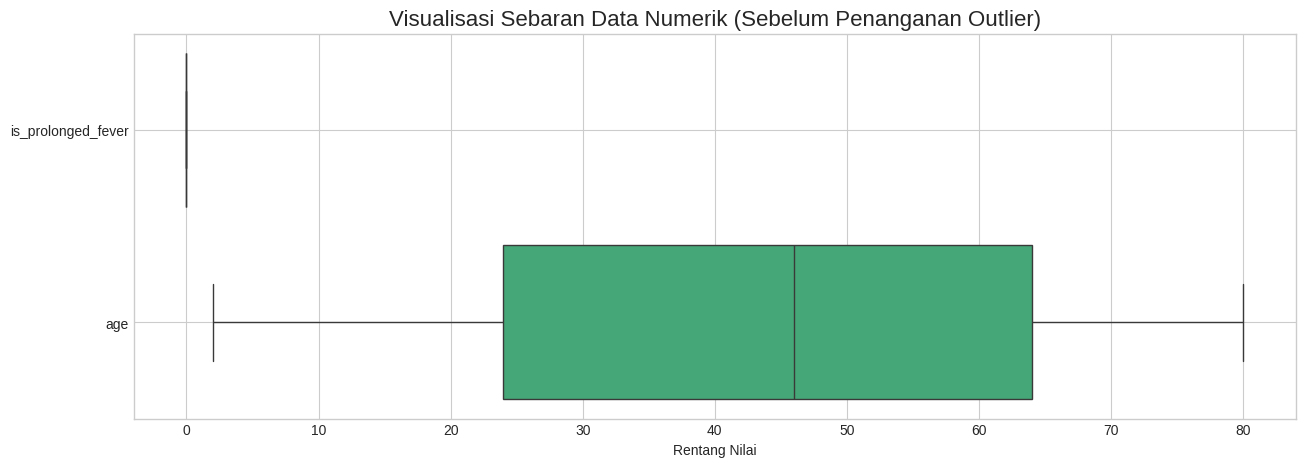


✅ Tidak ditemukan outlier signifikan pada data latih.

🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉
STEP 7 SELESAI: Outlier telah ditangani dengan metode yang aman dan terverifikasi.


In [8]:
# =============================================================================
# STEP 7: PENANGANAN OUTLIER (NILAI EKSTREM)
# Tujuan: Mengidentifikasi dan menangani outlier, yaitu data yang nilainya
#         jauh berbeda dari sebagian besar data lainnya.
# Analoginya: Bayangkan mengukur tinggi badan siswa di kelas 5 SD. Jika tiba-tiba
#             ada satu data tinggi badan pemain basket profesional, data itu adalah
#             outlier. Outlier bisa "mengganggu" model, jadi kita perlu menanganinya.
# Metode: Kita akan menggunakan metode IQR (Interquartile Range) dan Capping.
#         - IQR: Cara statistik untuk menentukan "batas wajar" sebuah data.
#         - Capping: Jika ada data di luar batas wajar, kita akan "memangkasnya"
#                    menjadi sama dengan nilai batas tersebut.
# =============================================================================
# Impor yang dibutuhkan untuk step ini.
import numpy as np
import pandas as pd
from IPython.display import display, Markdown
import matplotlib.pyplot as plt
import seaborn as sns

print("\n" + "="*80)
print("🚀 STEP 7: Menangani Outlier dengan Metode IQR & Capping")
print("="*80)

# =============================================================================
# BAGIAN A: FUNGSI-FUNGSI BANTU
# =============================================================================

def analyze_outliers_detailed(X_train):
    """
    Menganalisis outlier secara mendalam HANYA pada data latih.
    Ini adalah tahap "investigasi" untuk menemukan nilai-nilai ekstrem.
    """
    print("--- 7.1: Tahap Investigasi - Menganalisis Outlier di Data Latih ---")

    numerical_cols = X_train.select_dtypes(include=np.number).columns.tolist()
    if not numerical_cols:
        print("✅ Tidak ada kolom numerik untuk dianalisis outliernya.")
        return None, None

    print(f"   - Menganalisis {len(numerical_cols)} kolom numerik...")

    # --- Visualisasi Awal: Boxplot ---
    # Boxplot adalah cara cepat untuk melihat sebaran data dan outlier.
    # Titik-titik di luar "kumis" (garis) adalah kandidat outlier.
    plt.figure(figsize=(15, max(5, len(numerical_cols) * 0.4)))
    sns.boxplot(data=X_train[numerical_cols], orient='h', palette='viridis')
    plt.title('Visualisasi Sebaran Data Numerik (Sebelum Penanganan Outlier)', fontsize=16)
    plt.xlabel('Rentang Nilai')
    plt.grid(True)
    plt.show()

    # --- Perhitungan Batas Outlier dengan Metode IQR ---
    outlier_report_list = []
    outlier_boundaries = {} # Kamus untuk menyimpan "batas wajar"

    for col in numerical_cols:
        Q1 = X_train[col].quantile(0.25) # Kuartil 1 (25% data di bawah nilai ini)
        Q3 = X_train[col].quantile(0.75) # Kuartil 3 (75% data di bawah nilai ini)
        IQR = Q3 - Q1                   # Jangkauan Antar Kuartil
        lower_bound = Q1 - 1.5 * IQR    # Batas bawah yang wajar
        upper_bound = Q3 + 1.5 * IQR    # Batas atas yang wajar

        outlier_boundaries[col] = (lower_bound, upper_bound)
        outliers = X_train[(X_train[col] < lower_bound) | (X_train[col] > upper_bound)]

        if not outliers.empty:
            outlier_report_list.append({
                'Nama Kolom': col,
                'Jumlah Outlier': len(outliers),
                '% dari Data': f"{(len(outliers) / len(X_train) * 100):.2f}%",
                'Batas Bawah': f"{lower_bound:.2f}",
                'Batas Atas': f"{upper_bound:.2f}",
            })

    if not outlier_report_list:
        print("\n✅ Tidak ditemukan outlier signifikan pada data latih.")
        return None, None

    outlier_df = pd.DataFrame(outlier_report_list).sort_values(by='Jumlah Outlier', ascending=False)
    print("\n   - Laporan Outlier yang Terdeteksi dan Batas Wajarnya:")
    display(outlier_df.style.bar(subset=['Jumlah Outlier'], color='coral'))

    return outlier_df, outlier_boundaries

def cap_outliers(df, boundaries):
    """
    Menerapkan "capping" (pemangkasan) pada data. Nilai yang terlalu rendah akan
    dinaikkan ke batas bawah, dan nilai yang terlalu tinggi akan diturunkan ke batas atas.
    """
    df_capped = df.copy()
    for col, (lower, upper) in boundaries.items():
        if col in df_capped.columns:
            # .clip() adalah fungsi efisien dari pandas untuk melakukan capping
            df_capped[col] = df_capped[col].clip(lower=lower, upper=upper)
    return df_capped

def verify_capping_detailed(X_before, X_after, outlier_report):
    """
    Membuat visualisasi perbandingan "sebelum" dan "sesudah" capping
    untuk memastikan proses berjalan dengan benar.
    """
    print("\n--- 7.3: Tahap Verifikasi - Memeriksa Hasil Capping Secara Visual ---")

    # Ambil kolom dengan outlier terbanyak sebagai sampel untuk diverifikasi
    sample_col = outlier_report.iloc[0]['Nama Kolom']

    display(Markdown(f"#### Verifikasi Visual pada Kolom dengan Outlier Terbanyak: `{sample_col}`"))

    # 1. Visualisasi Boxplot (untuk melihat outlier)
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    sns.boxplot(y=X_before[sample_col], ax=axes[0]).set_title('SEBELUM Capping')
    sns.boxplot(y=X_after[sample_col], ax=axes[1]).set_title('SESUDAH Capping')
    plt.suptitle(f"Perbandingan Boxplot pada Fitur '{sample_col}'", fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

    # 2. Visualisasi Distribusi (untuk melihat perubahan bentuk sebaran data)
    fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharex=True)
    sns.histplot(X_before[sample_col], kde=True, ax=axes[0], color='blue').set_title('SEBELUM Capping')
    sns.histplot(X_after[sample_col], kde=True, ax=axes[1], color='green').set_title('SESUDAH Capping')
    plt.suptitle(f"Perbandingan Distribusi pada Fitur '{sample_col}'", fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# =============================================================================
# BAGIAN B: EKSEKUSI UTAMA
# =============================================================================
try:
    if 'X_train_imputed' in locals():
        # TAHAP 1: ANALISIS untuk menemukan outlier dan menentukan "batas wajar"
        outlier_report, outlier_boundaries = analyze_outliers_detailed(X_train_imputed)

        if outlier_report is None:
            # Jika tidak ada outlier, data tidak perlu diubah
            X_train_processed = X_train_imputed.copy()
            X_test_processed = X_test_imputed.copy()
        else:
            # TAHAP 2: EKSEKUSI untuk "memangkas" outlier
            print("\n--- 7.2: Tahap Eksekusi - Menerapkan Capping Outlier ---")
            print("   - PENTING: 'Batas wajar' yang dipelajari dari data latih akan")
            print("     diterapkan secara konsisten ke data latih DAN data uji.")

            X_train_processed = cap_outliers(X_train_imputed, outlier_boundaries)
            X_test_processed = cap_outliers(X_test_imputed, outlier_boundaries)
            print("   - ✅ Proses capping (pemangkasan) selesai.")

            # TAHAP 3: VERIFIKASI hasil pemangkasan
            verify_capping_detailed(X_train_imputed, X_train_processed, outlier_report)

        print("\n" + "🎉"*60)
        print("STEP 7 SELESAI: Outlier telah ditangani dengan metode yang aman dan terverifikasi.")
        print("="*80)
    else:
        print("🛑 GAGAL: Step 7 tidak bisa dijalankan. Pastikan `X_train_imputed` dari Step 6 tersedia.")
except NameError:
    # Error spesifik jika fungsi verifikasi salah ketik di kode lama
    print("🛑 Terjadi error. Kemungkinan ada salah ketik 'verify_cpping_detailed'. Pastikan namanya 'verify_capping_detailed'.")
except Exception as e:
    print(f"🛑 Terjadi error tak terduga saat menjalankan Step 7: {e}")

## Step 8: Rekayasa Fitur, Encoding, dan Scaling

### Apa yang dilakukan?
Ini adalah tahap transformasi data yang krusial, di mana semua fitur disiapkan untuk dimasukkan ke dalam model. Proses ini terdiri dari tiga aktivitas utama, yang semuanya "belajar" parameter **hanya dari data latih** untuk mencegah kebocoran data:
1.  **Rekayasa Fitur (*Feature Engineering*)**: Kode ini membuat fitur-fitur baru yang berpotensi lebih informatif, seperti `symptom_score` (jumlah total gejala yang dialami) dan `age_group` (mengelompokkan umur ke dalam kategori seperti remaja, dewasa, dll.).
2.  **Encoding Kategorikal**: Mengubah semua fitur non-numerik (misalnya, `sex` yang berisi 'male'/'female') menjadi representasi numerik menggunakan **One-Hot Encoding**. Ini menciptakan kolom-kolom baru (kolom *dummy*) untuk setiap nilai unik.
3.  **Scaling Numerik**: Menyamakan skala atau rentang nilai dari semua fitur numerik menggunakan **`StandardScaler`**. Ini mengubah data sehingga memiliki rata-rata 0 dan standar deviasi 1.

### Untuk apa?
Tujuannya adalah untuk mengubah dataset yang sudah bersih menjadi format matriks numerik yang sepenuhnya siap untuk diproses oleh algoritma *machine learning*. Ini memastikan semua fitur berada dalam format dan skala yang sebanding, sehingga model dapat mempelajari polanya secara efektif.

### Kenapa perlu?
* **Model Bekerja dengan Angka**: Algoritma *machine learning* pada dasarnya adalah fungsi matematika; mereka tidak dapat memproses teks seperti 'male' atau 'female'. **Encoding** adalah langkah wajib untuk menerjemahkan data kategorikal menjadi angka.
* **Mencegah Dominasi Fitur**: Tanpa **scaling**, fitur dengan rentang nilai yang besar (misalnya, `platelet_count` yang bisa mencapai ratusan ribu) akan dianggap lebih "penting" oleh model daripada fitur dengan rentang kecil (misalnya `symptom_score` yang hanya 0-5). Scaling memastikan setiap fitur memberikan kontribusi yang adil pada proses pembelajaran.
* **Menemukan Pola Tersembunyi**: **Rekayasa fitur** dapat secara eksplisit menyajikan informasi yang mungkin sulit ditemukan oleh model. Misalnya, `symptom_score` secara langsung memberitahu model tentang tingkat keparahan gejala secara keseluruhan, yang bisa jadi merupakan prediktor yang lebih kuat daripada masing-masing gejala secara terpisah.

### Jurnal Acuan
* **Zheng, A., & Casari, A. (2018).** *Feature engineering for machine learning: principles and techniques for data scientists*. O'Reilly Media, Inc.
    *(Meskipun ini buku, ini adalah referensi standar industri yang sangat dihormati. Ini memberikan landasan kuat untuk justifikasi rekayasa fitur seperti pembuatan `symptom_score` dan `age_group`.)*
* **Saranya, C., & Manikandan, G. (2013).** A study on feature scaling techniques for machine learning algorithms. *International Journal of Computer Applications*, 84(11).
    *(Jurnal ini membahas berbagai teknik feature scaling, termasuk standardisasi (yang Anda gunakan dengan StandardScaler), dan menjelaskan mengapa langkah ini penting untuk banyak algoritma machine learning, terutama yang berbasis jarak atau gradien.)*

In [9]:
# =============================================================================
# STEP 8: TAHAP PREPROCESSING FINAL (PIPELINE TRANSFORMASI)
# Tujuan: Mengubah semua data menjadi format numerik murni yang siap "dimakan"
#         oleh model machine learning. Ini adalah langkah terakhir sebelum training.
# Analoginya: Seperti menyiapkan hidangan akhir. Kita sudah mencuci (cleaning),
#             memotong (feature engineering), dan sekarang kita akan memasaknya
#             (encoding & scaling) agar siap disajikan (ke model).
# Alat Utama: `ColumnTransformer`. Ini seperti sebuah "pabrik perakitan" otomatis.
#             Kita mendefinisikan aturan untuk setiap tipe "bahan" (kolom), dan
#             pabrik ini akan memproses semuanya secara paralel dan konsisten.
# =============================================================================
# Impor yang dibutuhkan untuk step ini.
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer
from IPython.display import display

print("\n" + "="*80)
print("🚀 STEP 8: Tahap Preprocessing Final dengan ColumnTransformer")
print("="*80)

# =============================================================================
# BAGIAN A: FUNGSI UNTUK REKAYASA FITUR TAMBAHAN
# Membuat fitur baru yang merupakan "ringkasan" dari fitur lain.
# =============================================================================

def create_symptom_score(df):
    """
    Menghitung skor gejala sederhana.
    Tujuannya adalah memberi model sebuah fitur ringkasan: "Berapa banyak
    gejala utama yang dimiliki pasien ini?"
    """
    # Menghitung jumlah kolom yang nilainya 'yes' untuk setiap baris
    symptom_score = (df == 'yes').sum(axis=1)
    return symptom_score.to_frame('symptom_score')

def create_age_group(df):
    """
    Mengelompokkan umur ke dalam beberapa kategori.
    Terkadang, kelompok umur lebih informatif bagi model daripada umur spesifik.
    Contoh: Risiko penyakit bisa jadi lebih tinggi pada kelompok 'lansia' secara umum.
    """
    if 'age' not in df.columns or df.empty:
        return pd.DataFrame(index=df.index) # Kembalikan frame kosong jika tidak ada kolom 'age'
    # Bins: [0-18], [19-40], [41-65], [66+]
    age_group = pd.cut(df['age'], bins=[0, 18, 40, 65, np.inf], labels=[0, 1, 2, 3])
    return age_group.to_frame('age_group')

# =============================================================================
# BAGIAN B: FUNGSI UNTUK MEMBANGUN "PABRIK PREPROCESSING"
# =============================================================================

def build_preprocessor(X_train):
    """
    Mendesain dan membangun 'pabrik' ColumnTransformer kita.
    """
    print("--- 8.1: Mendesain Alur Kerja di 'Pabrik' Preprocessing ---")

    # --- 1. Identifikasi "Bahan Baku" (Tipe Kolom) ---
    all_categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()
    all_numerical_cols = X_train.select_dtypes(include=np.number).columns.tolist()

    # --- 2. Tentukan Kolom untuk Setiap "Stasiun Kerja" ---
    # Stasiun Rekayasa Fitur
    symptom_cols_for_eng = [col for col in ['chills', 'sore_throat', 'headache', 'myalgia'] if col in X_train.columns]
    age_col_for_eng = ['age'] if 'age' in all_numerical_cols else []

    # Stasiun Encoding (hanya untuk kolom kategorikal yang BUKAN gejala)
    cat_cols_for_ohe = [col for col in all_categorical_cols if col not in symptom_cols_for_eng]

    # Stasiun Scaling (hanya untuk kolom numerik yang BUKAN umur)
    num_cols_for_scaling = [col for col in all_numerical_cols if col not in age_col_for_eng]

    print(f"   - Ditemukan {len(symptom_cols_for_eng)} kolom gejala untuk dijadikan 'symptom_score'.")
    print(f"   - Kolom 'age' akan dijadikan 'age_group'.")
    print(f"   - {len(cat_cols_for_ohe)} kolom teks lainnya akan di-OneHotEncode.")
    print(f"   - {len(num_cols_for_scaling)} kolom angka lainnya akan di-StandardScale.")

    # --- 3. Definisikan "Mesin" untuk Setiap Stasiun Kerja ---
    # One-Hot Encoding: Mengubah kolom teks (misal: 'sex' -> 'male', 'female') menjadi
    #                 kolom angka biner (misal: 'sex_male' -> 1/0, 'sex_female' -> 1/0).
    #                 Ini adalah cara "menerjemahkan" teks ke bahasa yang dimengerti model.
    categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

    # Standard Scaling: Menyamakan skala semua fitur numerik. Ini penting agar fitur
    #                   dengan nilai besar (misal: platelet_count ribuan) tidak
    #                   mendominasi fitur dengan nilai kecil (misal: demam 1-5 hari).
    numerical_transformer = StandardScaler()

    # --- 4. Rakit "Pabrik" ColumnTransformer ---
    # Kita menyusun semua "stasiun kerja" dan "mesin" ke dalam satu alur kerja.
    preprocessor = ColumnTransformer(
        transformers=[
            # ('nama_stasiun', mesin, kolom_yang_diproses)
            ('symptom_score_eng', FunctionTransformer(create_symptom_score), symptom_cols_for_eng),
            ('age_group_eng', FunctionTransformer(create_age_group), age_col_for_eng),
            ('cat_encoding', categorical_transformer, cat_cols_for_ohe),
            ('num_scaling', numerical_transformer, num_cols_for_scaling)
        ],
        remainder='passthrough' # Kolom yang tidak disebut akan dilewatkan tanpa diubah
    )

    print("\n✅ Desain 'pabrik' preprocessing berhasil dibuat.")
    return preprocessor, cat_cols_for_ohe, num_cols_for_scaling

# =============================================================================
# BAGIAN C: EKSEKUSI UTAMA
# =============================================================================
try:
    if 'X_train_processed' in locals():
        X_train_input = X_train_processed
        X_test_input = X_test_processed

        # 1. Bangun "pabrik" preprocessor
        preprocessor, ohe_cols, scaled_cols = build_preprocessor(X_train_input)

        # 2. Jalankan Proses Fit & Transform
        print("\n--- 8.2: Menjalankan 'Pabrik' Preprocessing ---")

        # BELAJAR (fit): "Pabrik" akan mempelajari parameter PENTING dari data latih.
        # - Encoder belajar semua kategori unik yang ada.
        # - Scaler belajar nilai mean dan standar deviasi.
        # Ini adalah tahap "kalibrasi mesin".
        print("   - Tahap 1: BELAJAR (fit) / Kalibrasi Mesin HANYA dari data latih...")
        preprocessor.fit(X_train_input)
        print("     ✅ Parameter (kategori, mean, std) berhasil dipelajari.")

        # MENERAPKAN (transform): "Pabrik" yang sudah terkalibrasi sekarang
        # memproses data latih dan data uji dengan aturan yang SAMA PERSIS.
        print("   - Tahap 2: MENERAPKAN (transform) / Memproses data latih dan uji...")
        X_train_final_np = preprocessor.transform(X_train_input)
        X_test_final_np = preprocessor.transform(X_test_input)
        print("     ✅ Data berhasil ditransformasi menjadi format numerik.")

        # 3. Rekonstruksi Nama Kolom
        # Output dari ColumnTransformer adalah array NumPy (tabel angka tanpa nama kolom).
        # Kita perlu membangun kembali nama kolom secara manual agar hasilnya mudah dibaca.
        print("\n--- 8.3: Memberi Label Ulang pada Hasil Produksi ---")
        eng_names = ['symptom_score', 'age_group']
        ohe_names = list(preprocessor.named_transformers_['cat_encoding'].get_feature_names_out(ohe_cols))
        final_feature_names = eng_names + ohe_names + scaled_cols

        # Konversi kembali ke DataFrame Pandas yang rapi
        X_train_final = pd.DataFrame(X_train_final_np, index=X_train_input.index, columns=final_feature_names)
        X_test_final = pd.DataFrame(X_test_final_np, index=X_test_input.index, columns=final_feature_names)
        print("   ✅ DataFrame akhir dengan nama kolom yang benar berhasil dibuat.")

        # --- Laporan Akhir ---
        print("\n" + "🏁"*40)
        print("PROSES PREPROCESSING SELESAI")
        print("🏁"*40)
        print(f"\n   - Dimensi Data Latih Final: {X_train_final.shape}")
        print(f"   - Dimensi Data Uji Final:  {X_test_final.shape}")
        if X_train_final.shape[1] == X_test_final.shape[1]:
            print("   ✅ Jumlah kolom konsisten. Data 100% siap untuk modeling!")

        print("\n   Contoh data yang siap dimasukkan ke model (X_train_final):")
        display(X_train_final.head())
        print("="*80)

    else:
        print("🛑 GAGAL: Step 8 tidak bisa dijalankan. Pastikan `X_train_processed` dari Step 7 tersedia.")
except Exception as e:
    print(f"🛑 Terjadi error tak terduga saat menjalankan Step 8: {e}")


🚀 STEP 8: Tahap Preprocessing Final dengan ColumnTransformer
--- 8.1: Mendesain Alur Kerja di 'Pabrik' Preprocessing ---
   - Ditemukan 2 kolom gejala untuk dijadikan 'symptom_score'.
   - Kolom 'age' akan dijadikan 'age_group'.
   - 2 kolom teks lainnya akan di-OneHotEncode.
   - 1 kolom angka lainnya akan di-StandardScale.

✅ Desain 'pabrik' preprocessing berhasil dibuat.

--- 8.2: Menjalankan 'Pabrik' Preprocessing ---
   - Tahap 1: BELAJAR (fit) / Kalibrasi Mesin HANYA dari data latih...
     ✅ Parameter (kategori, mean, std) berhasil dipelajari.
   - Tahap 2: MENERAPKAN (transform) / Memproses data latih dan uji...
     ✅ Data berhasil ditransformasi menjadi format numerik.

--- 8.3: Memberi Label Ulang pada Hasil Produksi ---
   ✅ DataFrame akhir dengan nama kolom yang benar berhasil dibuat.

🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁
PROSES PREPROCESSING SELESAI
🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁

   - Dimensi Data Latih Final: (400, 7)
   - Dimensi Data Uji Final:  (100, 7

,symptom_score,age_group,lymphadenopathy_no,lymphadenopathy_yes,sex_female,sex_male,is_prolonged_fever
312,1.0,0.0,1.0,0.0,0.0,1.0,0.0
51,1.0,0.0,1.0,0.0,0.0,1.0,0.0
356,2.0,3.0,0.0,1.0,0.0,1.0,0.0
226,2.0,0.0,1.0,0.0,0.0,1.0,0.0
199,2.0,2.0,0.0,1.0,1.0,0.0,0.0


## Step 9: Encoding Variabel Target

### Apa yang dilakukan?
Tahap ini secara khusus memproses **variabel target** (kolom `diagnosing` yang berisi 'yes' dan 'no'). Kode ini menggunakan `LabelEncoder` untuk mengubah label tekstual tersebut menjadi representasi numerik (misalnya, 'no' menjadi `0` dan 'yes' menjadi `1`). Proses "belajar" pemetaan ini (`fit`) dilakukan **hanya pada data latih**, dan pemetaan yang sama kemudian diterapkan secara konsisten ke data latih dan data uji (`transform`).

### Untuk apa?
Tujuannya adalah untuk mengubah "kunci jawaban" dari format teks ke format numerik yang dapat dipahami dan diproses oleh algoritma *machine learning*.

### Kenapa perlu?
Model *machine learning*, pada intinya, adalah fungsi matematika yang bekerja dengan angka. Mereka tidak bisa menghitung *error* atau melakukan optimisasi menggunakan nilai teks seperti 'yes' atau 'no'. **Encoding** adalah langkah wajib untuk menerjemahkan target kelas menjadi format numerik sehingga model dapat dilatih dan dievaluasi. Menggunakan alur kerja `fit` hanya pada data latih dan `transform` pada semua set data memastikan bahwa pemetaan dari teks ke angka (misalnya, 'yes' selalu menjadi `1`) konsisten di seluruh *pipeline*, mencegah kebingungan atau error pada tahap evaluasi.

### Jurnal Acuan
* **Hancock, J. T., & Khoshgoftaar, T. M. (2020).** CatBoost for big data: a survey. *Journal of Big Data*, 7(1), 1-41.
    *(Jurnal seperti ini, yang mengulas algoritma klasifikasi, secara implisit mengasumsikan bahwa variabel target berbentuk numerik agar fungsi loss dapat dihitung. Ini mendukung justifikasi bahwa encoding variabel target adalah langkah preprocessing yang fundamental dan diperlukan sebelum melatih model klasifikasi.)*
* **Pedregosa, F., et al. (2011).** Scikit-learn: Machine learning in Python. *Journal of machine learning research*, 12, 2825-2830.
    *(Paper yang memperkenalkan pustaka scikit-learn ini, secara tidak langsung, menjadi landasan untuk penggunaan alat-alat standar seperti LabelEncoder. Ini menunjukkan bahwa proses encoding adalah bagian integral dan praktik standar dari pipeline machine learning yang diimplementasikan menggunakan pustaka ini.)*

In [10]:
# =============================================================================
# STEP 9: ENCODING VARIABEL TARGET (y)
# Tujuan: Mengubah label target kita yang berupa teks (misal: 'yes', 'no')
#         menjadi format angka (misal: 1, 0). Model machine learning hanya
#         bisa memproses angka, bukan teks.
# Analoginya: Seperti mengubah jawaban pilihan ganda "Benar" atau "Salah" pada
#             lembar ujian menjadi skor 1 atau 0 agar bisa dihitung oleh komputer.
# =============================================================================
# Impor yang dibutuhkan untuk step ini.
from sklearn.preprocessing import LabelEncoder

print("\n" + "="*80)
print("🚀 STEP 9: Mengubah Variabel Target (y) Menjadi Angka")
print("="*80)

# =============================================================================
# BAGIAN A: FUNGSI UTAMA & EKSEKUSI
# =============================================================================

def run_step9_target_encoding(y_train, y_test):
    """
    Melakukan encoding pada variabel target (y_train dan y_test)
    dengan metodologi fit/transform untuk menjamin konsistensi.
    """
    # Kita definisikan mana yang dianggap sebagai kelas "positif".
    # Ini penting untuk evaluasi model nanti (misal: precision & recall).
    POSITIVE_LABEL = 'yes'

    # LabelEncoder adalah "mesin penerjemah" dari teks ke angka.
    le = LabelEncoder()

    # --- 9.1: BELAJAR (fit) Aturan Terjemahan dari Data Latih ---
    # "Mesin" ini akan melihat semua label unik di y_train ('yes', 'no')
    # dan membuat "kamus terjemahan" internalnya.
    print("--- 9.1: Belajar 'Kamus Terjemahan' dari Data Latih (y_train)... ---")
    # .fit_transform() adalah shortcut untuk belajar dan langsung menerjemahkan.
    y_train_encoded = le.fit_transform(y_train)
    print("   ✅ 'Kamus' berhasil dibuat dan diterapkan pada y_train.")

    # --- 9.2: MENERAPKAN (transform) Aturan yang Sama ke Data Uji ---
    # Sekarang, kita gunakan "kamus" yang SAMA PERSIS yang sudah dibuat dari
    # data latih untuk menerjemahkan y_test. Ini krusial untuk konsistensi.
    # Kita tidak boleh membuat kamus baru dari data uji.
    print("\n--- 9.2: Menerapkan 'Kamus' yang Sama pada Data Uji (y_test)... ---")
    y_test_encoded = le.transform(y_test)
    print("   ✅ Terjemahan konsisten berhasil diterapkan pada y_test.")

    # --- 9.3: Laporan Hasil Terjemahan ---
    print("\n--- 9.3: Laporan 'Kamus Terjemahan' yang Dibuat ---")

    positive_class_index = None
    for index, label in enumerate(le.classes_):
        print(f"   - Label Teks: '{label}'  --> Diterjemahkan menjadi Angka: {index}")
        if str(label).lower() == POSITIVE_LABEL:
            positive_class_index = index

    if positive_class_index is not None:
        print(f"\n   - PENTING: Kelas positif ('{POSITIVE_LABEL}') akan diwakili oleh angka: {positive_class_index}")
    else:
        print(f"\n   - ⚠️ PERINGATAN: Label kelas positif ('{POSITIVE_LABEL}') tidak ditemukan dalam data latih.")

    # Kembalikan hasil terjemahan dan "kamus"-nya
    return y_train_encoded, y_test_encoded, le

# --- Eksekusi Utama ---
try:
    if 'y_train' in locals() and 'y_test' in locals():
        y_train_encoded, y_test_encoded, label_encoder = run_step9_target_encoding(y_train, y_test)

        print("\n   Dimensi Data Target Setelah Diubah Menjadi Angka:")
        print(f"   - y_train_encoded: {y_train_encoded.shape}")
        print(f"   - y_test_encoded:  {y_test_encoded.shape}")

        print("\n" + "🎉"*60)
        print("STEP 9 SELESAI: Variabel target kini dalam format numerik.")
        print("Semua data (X dan y) sekarang 100% siap untuk tahap pemodelan!")
        print("="*80)
    else:
        print("🛑 GAGAL: Step 9 tidak bisa dijalankan. Pastikan `y_train` dan `y_test` dari Step 3 tersedia.")
except Exception as e:
    print(f"🛑 Terjadi error tak terduga saat menjalankan Step 9: {e}")


🚀 STEP 9: Mengubah Variabel Target (y) Menjadi Angka
--- 9.1: Belajar 'Kamus Terjemahan' dari Data Latih (y_train)... ---
   ✅ 'Kamus' berhasil dibuat dan diterapkan pada y_train.

--- 9.2: Menerapkan 'Kamus' yang Sama pada Data Uji (y_test)... ---
   ✅ Terjemahan konsisten berhasil diterapkan pada y_test.

--- 9.3: Laporan 'Kamus Terjemahan' yang Dibuat ---
   - Label Teks: 'no'  --> Diterjemahkan menjadi Angka: 0
   - Label Teks: 'yes'  --> Diterjemahkan menjadi Angka: 1

   - PENTING: Kelas positif ('yes') akan diwakili oleh angka: 1

   Dimensi Data Target Setelah Diubah Menjadi Angka:
   - y_train_encoded: (400,)
   - y_test_encoded:  (100,)

🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉
STEP 9 SELESAI: Variabel target kini dalam format numerik.
Semua data (X dan y) sekarang 100% siap untuk tahap pemodelan!


## Step 10: Pembersihan Fitur Akhir Berdasarkan Korelasi

### Apa yang dilakukan?
Tahap ini melakukan seleksi fitur tambahan dengan metode berbasis filter. Secara spesifik, kode ini menghitung **koefisien korelasi Pearson** antara setiap fitur numerik dengan variabel target. Proses ini dilakukan **hanya pada data latih** untuk mencegah kebocoran data. Fitur-fitur yang memiliki korelasi absolut (nilai positif maupun negatif) di atas ambang batas yang ditentukan (0.60) kemudian diidentifikasi dan dihapus dari data latih dan data uji.

### Untuk apa?
Tujuannya adalah untuk menghilangkan fitur-fitur yang memiliki hubungan linier yang sangat kuat dengan variabel target. Ini berfungsi sebagai lapisan pertahanan terakhir untuk mendeteksi potensi kebocoran data (*data leakage*) yang mungkin tidak tertangkap pada Step 4, serta untuk mengurangi redundansi dalam set fitur.

### Kenapa perlu?
Meskipun korelasi yang tinggi seringkali menandakan fitur yang baik, korelasi yang **terlalu tinggi** bisa menjadi pertanda masalah:
1.  **Indikasi Kebocoran Data**: Fitur dengan korelasi yang mendekati sempurna (misalnya, > 0.9) seringkali merupakan "fitur bocor". Artinya, fitur tersebut mengandung informasi tentang target yang seharusnya tidak diketahui pada saat prediksi. Menghapusnya adalah langkah krusial untuk memastikan evaluasi model yang adil.
2.  **Mengurangi Redundansi**: Fitur yang sangat berkorelasi dengan target mungkin juga sangat berkorelasi dengan fitur-fitur lain yang sudah ada. Menghapusnya dapat menyederhanakan model tanpa kehilangan banyak informasi prediktif, yang berpotensi meningkatkan kemampuan generalisasi.
3.  **Stabilitas Model**: Terkadang, model dapat menjadi terlalu bergantung pada satu atau dua fitur dengan korelasi yang sangat kuat. Menghapusnya memaksa model untuk belajar dari pola yang lebih beragam di seluruh fitur yang tersedia, yang dapat membuatnya lebih robust.

### Jurnal Acuan
* **Hall, M. A. (1999).** Correlation-based feature selection for machine learning. *The University of Waikato, Department of Computer Science*.
    *(Meskipun ini adalah disertasi, ini adalah salah satu karya paling fundamental dan sering dikutip yang memperkenalkan Correlation-based Feature Selection (CFS). Ini memberikan landasan teoretis yang kuat mengapa mengevaluasi fitur berdasarkan korelasinya (baik dengan target maupun dengan fitur lain) adalah strategi seleksi fitur yang efektif.)*
* **Chandrashekar, G., & Sahin, F. (2014).** A survey on feature selection methods. *Computers & Electrical Engineering*, 40(1), 16-28.
    *(Jurnal ini mengulas berbagai metode seleksi fitur dan mengkategorikan metode berbasis korelasi sebagai "metode filter". Ini mendukung pendekatan Anda sebagai salah satu teknik standar dalam machine learning untuk pra-pemrosesan data.)*

In [11]:
# =============================================================================
# STEP 10: PEMBERSIHAN FITUR AKHIR BERDASARKAN KORELASI
# Tujuan: Menghapus fitur-fitur yang memiliki hubungan (korelasi) yang "terlalu kuat"
#         dengan variabel target.
# Analoginya: Bayangkan seorang detektif menemukan petunjuk yang terlalu "sempurna"
#             atau "curang", yang hampir identik dengan jawabannya. Petunjuk seperti
#             ini bisa jadi tidak realistis dan tidak akan berguna saat menghadapi
#             kasus baru di dunia nyata. Jadi, kita membuangnya agar model kita
#             belajar dari petunjuk-petunjuk yang lebih wajar.
# =============================================================================
# Impor yang dibutuhkan untuk step ini.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

print("\n" + "="*80)
print("🚀 STEP 10: Membersihkan Fitur Berdasarkan Korelasi Tinggi")
print("="*80)

# =============================================================================
# BAGIAN A: FUNGSI UTAMA & EKSEKUSI
# =============================================================================

def run_step10_correlation_cleaning(X_train, X_test, y_train, correlation_threshold=0.60):
    """
    Menganalisis korelasi fitur terhadap target, lalu menghapus fitur
    dengan korelasi yang sangat tinggi dari kedua set data (latih dan uji).
    """
    # --- 10.1: Tahap Analisis - Menghitung Korelasi HANYA pada Data Latih ---
    print(f"--- 10.1: Menganalisis Korelasi Fitur vs. Target (Ambang Batas > {correlation_threshold}) ---")
    print("   - PENTING: Korelasi dihitung HANYA menggunakan data latih untuk mencegah 'kebocoran data'.")

    # Gabungkan fitur (X_train) dan target (y_train) untuk menghitung korelasi
    target_series = pd.Series(y_train, index=X_train.index, name='TARGET')
    df_for_corr = pd.concat([X_train, target_series], axis=1)

    # Hitung korelasi semua fitur terhadap 'TARGET', ambil nilai absolutnya (abaikan +/-)
    corr_with_target = df_for_corr.corr(numeric_only=True)['TARGET'].abs().drop(labels=['TARGET'])

    # Identifikasi fitur yang melebihi ambang batas
    features_to_drop = corr_with_target[corr_with_target > correlation_threshold].index.tolist()

    # --- 10.2: Tahap Eksekusi - Menghapus Fitur ---
    if not features_to_drop:
        print("\n   ✅ Tidak ada fitur yang melebihi ambang batas korelasi.")
        print("      Data dari langkah sebelumnya akan digunakan tanpa perubahan.")
        return X_train, X_test # Kembalikan data asli jika tidak ada yang dihapus

    print(f"\n   - Ditemukan {len(features_to_drop)} fitur dengan korelasi absolut > {correlation_threshold} terhadap target.")

    # --- Laporan Visual dan Tekstual ---
    print("\n   --- Laporan Fitur yang Akan Dihapus (diurutkan berdasarkan korelasi) ---")
    report_df = corr_with_target[features_to_drop].sort_values(ascending=False).reset_index()
    report_df.columns = ['Nama Fitur', 'Nilai Korelasi Absolut']

    # Visualisasi
    plt.figure(figsize=(8, max(4, len(report_df) * 0.3)))
    sns.barplot(x='Nilai Korelasi Absolut', y='Nama Fitur', data=report_df, palette='Reds_r')
    plt.title('Fitur yang Dihapus Karena Korelasi Terlalu Tinggi', fontsize=14)
    plt.axvline(x=correlation_threshold, color='black', linestyle='--', label=f'Ambang Batas ({correlation_threshold})')
    plt.legend()
    plt.xlabel('Korelasi Absolut dengan Target')
    plt.ylabel('Fitur')
    plt.tight_layout()
    plt.show()

    # Tampilkan tabel detail
    display(report_df)

    print("\n--- 10.2: Menerapkan Penghapusan Fitur ---")
    print("   - Aturan penghapusan yang dipelajari dari data latih ini akan diterapkan")
    print("     secara konsisten pada data latih DAN data uji.")

    X_train_clean = X_train.drop(columns=features_to_drop, errors='ignore')
    X_test_clean = X_test.drop(columns=features_to_drop, errors='ignore')

    print("   - ✅ Penghapusan fitur selesai.")

    return X_train_clean, X_test_clean

# --- Eksekusi Utama ---
try:
    if 'X_train_final' in locals() and 'y_train_encoded' in locals():
        X_train_clean, X_test_clean = run_step10_correlation_cleaning(
            X_train_final, X_test_final, y_train_encoded, correlation_threshold=0.60
        )

        print("\n--- Perbandingan Ukuran Data Setelah Pembersihan ---")
        print(f"   - Dimensi X_train: {X_train_clean.shape} (Sebelumnya: {X_train_final.shape})")
        print(f"   - Dimensi X_test:  {X_test_clean.shape} (Sebelumnya: {X_test_final.shape})")

        print("\n" + "🎉"*60)
        print("STEP 10 SELESAI: Pembersihan fitur berdasarkan korelasi berhasil.")
        print("="*80)
    else:
        print("🛑 GAGAL: Step 10 tidak dapat dijalankan. Pastikan data dari Step 8 & 9 (`X_train_final`, dll.) tersedia.")
except Exception as e:
    print(f"🛑 Terjadi error tak terduga saat menjalankan Step 10: {e}")


🚀 STEP 10: Membersihkan Fitur Berdasarkan Korelasi Tinggi
--- 10.1: Menganalisis Korelasi Fitur vs. Target (Ambang Batas > 0.6) ---
   - PENTING: Korelasi dihitung HANYA menggunakan data latih untuk mencegah 'kebocoran data'.

   ✅ Tidak ada fitur yang melebihi ambang batas korelasi.
      Data dari langkah sebelumnya akan digunakan tanpa perubahan.

--- Perbandingan Ukuran Data Setelah Pembersihan ---
   - Dimensi X_train: (400, 7) (Sebelumnya: (400, 7))
   - Dimensi X_test:  (100, 7) (Sebelumnya: (100, 7))

🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉
STEP 10 SELESAI: Pembersihan fitur berdasarkan korelasi berhasil.


## Step 11: Penyeimbangan Data Latih dengan SMOTE

### Apa yang dilakukan?
Tahap ini secara khusus menangani masalah **kelas tidak seimbang** (*imbalanced class*) yang ada di dalam data latih. Kode ini menggunakan algoritma **SMOTE (Synthetic Minority Over-sampling Technique)** untuk menyeimbangkan distribusi kelas. Prosesnya adalah dengan menciptakan sampel-sampel data "sintetis" atau "buatan" baru untuk kelas minoritas (dalam kasus ini, kemungkinan besar adalah kelas 'yes' untuk diagnosis Monkeypox) hingga jumlahnya seimbang dengan kelas mayoritas. Penting untuk dicatat, proses ini **hanya diterapkan pada data latih**, sementara data uji tetap tidak tersentuh.

### Untuk apa?
Tujuannya adalah untuk mencegah model *machine learning* menjadi bias atau "berat sebelah" terhadap kelas mayoritas. Dengan menyediakan jumlah data yang seimbang untuk setiap kelas, kita memaksa model untuk mempelajari karakteristik dari kelas minoritas sama baiknya dengan kelas mayoritas.

### Kenapa perlu?
Dalam banyak dataset medis, jumlah pasien yang sakit (kelas minoritas) seringkali jauh lebih sedikit daripada jumlah pasien yang sehat (kelas mayoritas). Jika model dilatih pada data yang tidak seimbang ini, ia bisa mencapai akurasi yang tinggi secara artifisial hanya dengan selalu menebak kelas mayoritas. Tentu saja, model seperti ini tidak berguna karena ia akan kesulitan mendeteksi penyakit yang sebenarnya ingin kita prediksi.

SMOTE mengatasi masalah ini dengan "memperbanyak" contoh kasus minoritas secara cerdas, sehingga saat training, model mendapatkan kesempatan yang sama untuk belajar dari kedua kelas. Menerapkan SMOTE **hanya pada data latih** adalah aturan fundamental untuk menjaga validitas evaluasi. Jika kita juga menerapkannya pada data uji, artinya kita menguji model pada data buatan, yang akan menghasilkan skor performa yang terlalu optimis dan tidak mencerminkan kemampuannya di dunia nyata.

### Jurnal Acuan
* **Chawla, N. V., Bowyer, K. W., Hall, L. O., & Kegelmeyer, W. P. (2002).** SMOTE: synthetic minority over-sampling technique. *Journal of artificial intelligence research*, 16, 321-357.
    *(Ini adalah **paper orisinal dan paling fundamental** yang memperkenalkan teknik SMOTE. Mengutip jurnal ini adalah landasan terkuat untuk justifikasi Anda, karena Anda menggunakan metode yang mereka usulkan secara langsung untuk menangani masalah kelas tidak seimbang, yang merupakan tantangan umum dalam data medis.)*


🚀 STEP 11: Menyeimbangkan Data Latih Menggunakan SMOTE
--- 11.1: Menganalisis Distribusi Kelas Sebelum SMOTE ---
   - Distribusi kelas awal pada y_train:
     - Kelas 1: 238 sampel
     - Kelas 0: 162 sampel

--- 11.2: Menerapkan SMOTE untuk Membuat 'Kloning' Data Minoritas ---
   - ✅ Data latih berhasil diseimbangkan.

--- 11.3: Verifikasi Distribusi Kelas Setelah SMOTE ---
   - Distribusi kelas setelah SMOTE:
     - Kelas 0: 238 sampel
     - Kelas 1: 238 sampel


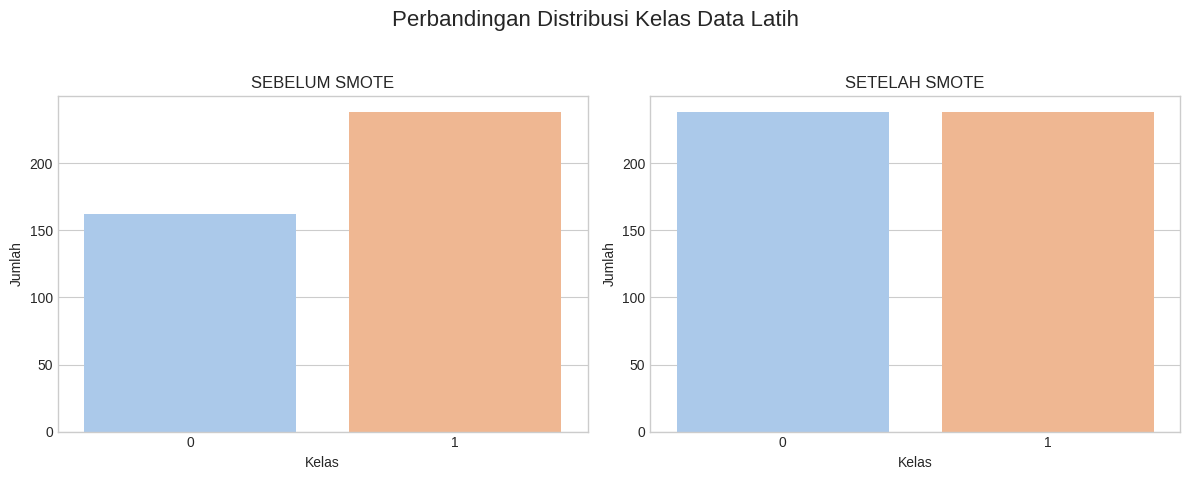


   --- Perbandingan Ukuran Data ---
   - Data Latih Sebelum SMOTE: (400, 7)
   - Data Latih Setelah SMOTE: (476, 7) (Jumlah baris bertambah)
   - Data Uji (TIDAK BERUBAH): (100, 7)

🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉
STEP 11 SELESAI: Data latih kini seimbang dan siap untuk training model.
CATATAN PENTING UNTUK TAHAP SELANJUTNYA:
   - Untuk TRAINING & CROSS-VALIDATION, gunakan: `X_train_smote` dan `y_train_smote`.
   - Untuk EVALUASI AKHIR (Final Testing), gunakan data uji ASLI: `X_test_clean` dan `y_test_encoded`.


In [12]:
# =============================================================================
# STEP 11: MENYEIMBANGKAN DATA LATIH DENGAN SMOTE (OVERSAMPLING)
# Tujuan: Menangani masalah "data tidak seimbang". Ini terjadi ketika salah satu
#         kelas target jauh lebih sedikit daripada yang lain (misal: 100 pasien
#         sehat vs. 10 pasien sakit).
# Analoginya: Bayangkan sebuah kelas di mana 90% siswa lulus dan 10% tidak lulus.
#             Jika model hanya menebak "lulus" setiap saat, akurasinya sudah 90%,
#             tapi ia sama sekali tidak belajar mengenali siswa yang tidak lulus.
# Solusi (SMOTE): Kita akan "menggandakan" data dari kelas minoritas (yang
#                 sedikit) secara cerdas. SMOTE (Synthetic Minority Over-sampling
#                 Technique) membuat "siswa kloning" sintetis yang mirip dengan
#                 siswa yang tidak lulus, sehingga jumlahnya menjadi seimbang.
# =============================================================================
# Impor yang dibutuhkan untuk step ini.
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("\n" + "="*80)
print("🚀 STEP 11: Menyeimbangkan Data Latih Menggunakan SMOTE")
print("="*80)

# =============================================================================
# Catatan Metodologi (SANGAT PENTING):
# 1. HANYA PADA DATA LATIH: SMOTE hanya boleh diterapkan pada data latih.
#    Data uji (test set) HARUS tetap dalam kondisi aslinya (tidak seimbang)
#    karena ia adalah simulasi dunia nyata. Mengubah data uji akan memberikan
#    skor evaluasi yang terlalu optimis dan tidak valid.
# 2. Reproducibility: `random_state` digunakan agar "siswa kloning" yang
#    dihasilkan selalu sama setiap kali kode dijalankan.
# =============================================================================

def run_step11_smote_oversampling(X_train, y_train, random_state=123):
    """
    Menerapkan SMOTE HANYA pada data latih untuk menyeimbangkan distribusi kelas.
    """
    # --- 11.1: Analisis Distribusi Awal (Sebelum SMOTE) ---
    print("--- 11.1: Menganalisis Distribusi Kelas Sebelum SMOTE ---")

    # Buat DataFrame untuk visualisasi
    df_before = pd.DataFrame({'Kelas': y_train}).value_counts().reset_index(name='Jumlah')

    print(f"   - Distribusi kelas awal pada y_train:")
    for _, row in df_before.iterrows():
        print(f"     - Kelas {row['Kelas']}: {row['Jumlah']} sampel")

    # --- 11.2: Eksekusi SMOTE ---
    print("\n--- 11.2: Menerapkan SMOTE untuk Membuat 'Kloning' Data Minoritas ---")

    smote = SMOTE(random_state=random_state)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    # Ubah kembali output menjadi DataFrame/Series yang rapi
    X_train_smote = pd.DataFrame(X_train_resampled, columns=X_train.columns)
    y_train_smote = pd.Series(y_train_resampled, name=getattr(y_train, 'name', 'TARGET'))

    print("   - ✅ Data latih berhasil diseimbangkan.")

    # --- 11.3: Verifikasi Hasil (Secara Tekstual dan Visual) ---
    print("\n--- 11.3: Verifikasi Distribusi Kelas Setelah SMOTE ---")
    df_after = pd.DataFrame({'Kelas': y_train_smote}).value_counts().reset_index(name='Jumlah')

    print(f"   - Distribusi kelas setelah SMOTE:")
    for _, row in df_after.iterrows():
        print(f"     - Kelas {row['Kelas']}: {row['Jumlah']} sampel")

    # --- Visualisasi Perbandingan ---
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    sns.barplot(data=df_before, x='Kelas', y='Jumlah', ax=axes[0], palette='pastel').set_title('SEBELUM SMOTE')
    sns.barplot(data=df_after, x='Kelas', y='Jumlah', ax=axes[1], palette='pastel').set_title('SETELAH SMOTE')
    plt.suptitle('Perbandingan Distribusi Kelas Data Latih', fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

    return X_train_smote, y_train_smote

# --- Eksekusi Utama ---
try:
    if 'X_train_clean' in locals() and 'y_train_encoded' in locals():
        # Ambil konstanta random_state yang sudah didefinisikan di step sebelumnya
        PIPELINE_RANDOM_STATE = 123

        X_train_smote, y_train_smote = run_step11_smote_oversampling(
            X_train_clean, y_train_encoded, random_state=PIPELINE_RANDOM_STATE
        )

        print("\n   --- Perbandingan Ukuran Data ---")
        print(f"   - Data Latih Sebelum SMOTE: {X_train_clean.shape}")
        print(f"   - Data Latih Setelah SMOTE: {X_train_smote.shape} (Jumlah baris bertambah)")
        print(f"   - Data Uji (TIDAK BERUBAH): {X_test_clean.shape}")


        print("\n" + "🎉"*60)
        print("STEP 11 SELESAI: Data latih kini seimbang dan siap untuk training model.")
        print("="*80)
        print("CATATAN PENTING UNTUK TAHAP SELANJUTNYA:")
        print("   - Untuk TRAINING & CROSS-VALIDATION, gunakan: `X_train_smote` dan `y_train_smote`.")
        print("   - Untuk EVALUASI AKHIR (Final Testing), gunakan data uji ASLI: `X_test_clean` dan `y_test_encoded`.")
        print("="*80)
    else:
        print("🛑 GAGAL: Step 11 tidak bisa dijalankan. Pastikan `X_train_clean` dari Step 10 tersedia.")
except Exception as e:
    print(f"🛑 Terjadi error tak terduga saat menjalankan Step 11: {e}")


🚀 STEP 12: Analisis Diagnostik pada Data Bersih
CATATAN: Analisis ini dijalankan pada data sebelum SMOTE (`X_train_clean`)
untuk memahami karakteristik data asli Anda.
--- 12.1: Analisis Peringkat Pentingnya Fitur (Feature Importance) ---
   - Sebuah model sementara dilatih untuk 'mem Abstrak' fitur mana yang paling berguna.


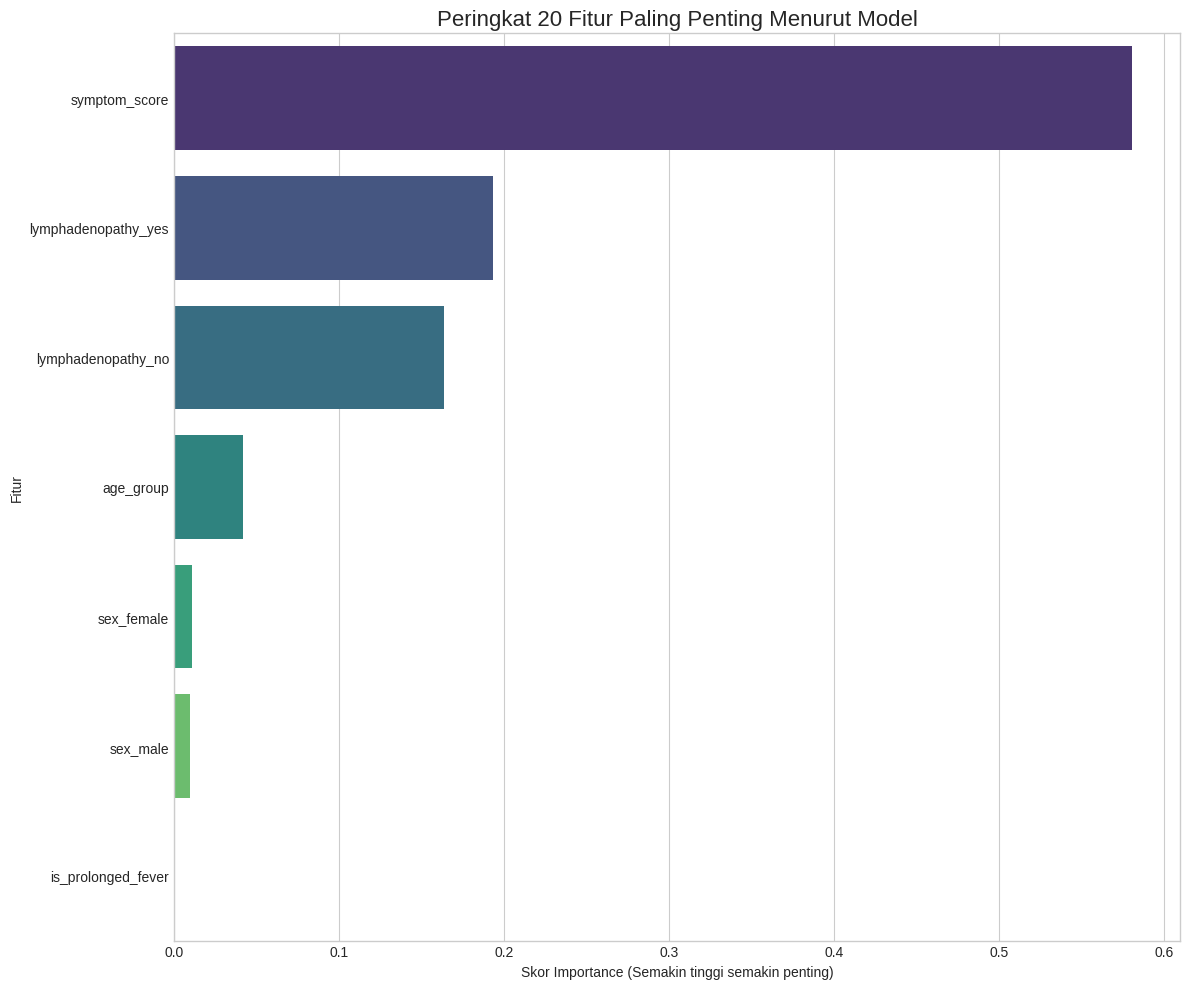


   - Laporan 20 Fitur Paling Penting:


,Nama Fitur,Skor Importance
0,symptom_score,0.580444
1,lymphadenopathy_yes,0.193517
2,lymphadenopathy_no,0.163638
3,age_group,0.041554
4,sex_female,0.010904
5,sex_male,0.009943
6,is_prolonged_fever,0.000000



--------------------------------------------------------------------------------
--- 12.2: Analisis Hubungan Linear (Korelasi) Fitur vs. Target ---


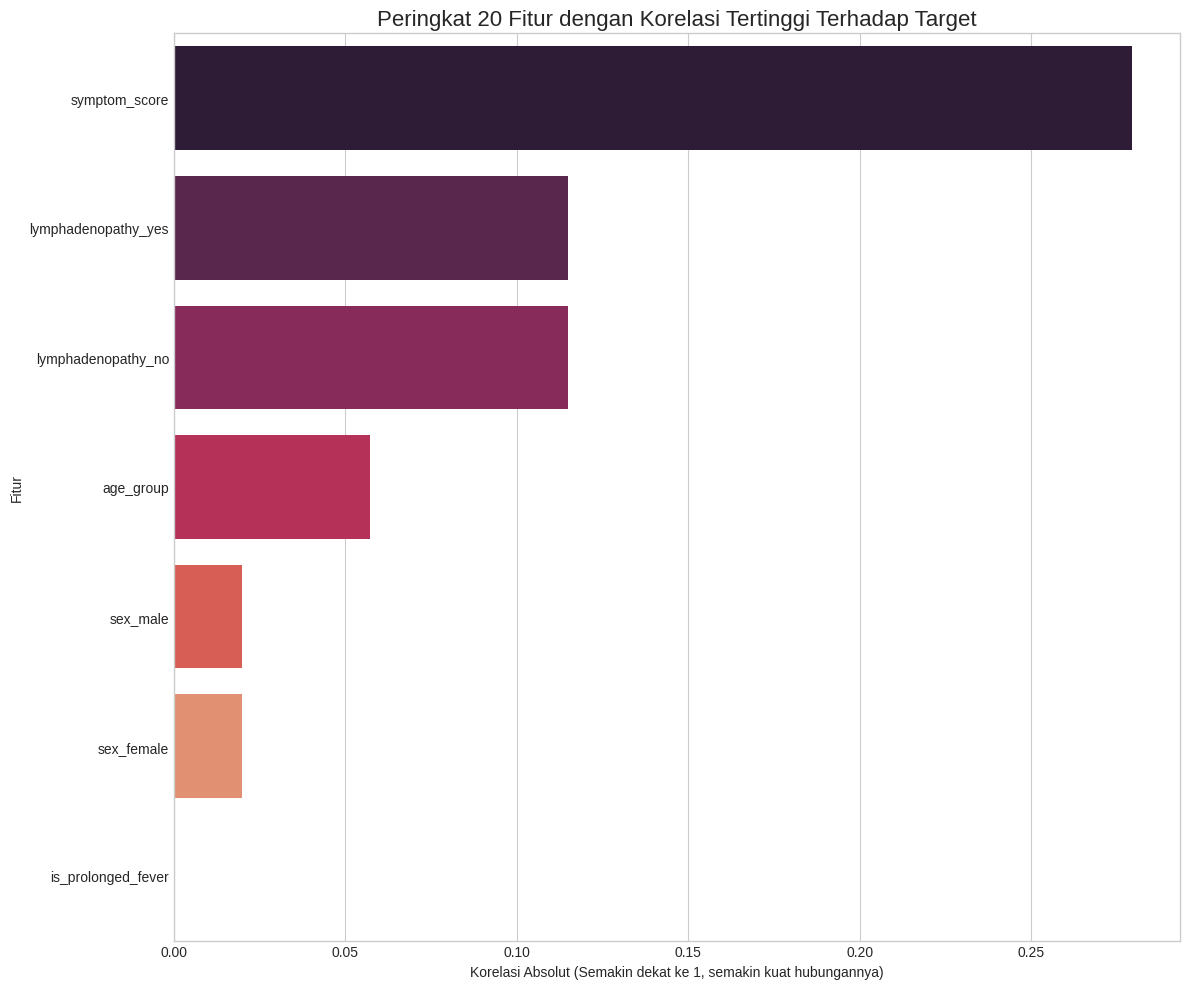


   - Laporan 20 Fitur dengan Korelasi Tertinggi:


,Korelasi Absolut
symptom_score,0.279491
lymphadenopathy_yes,0.114902
lymphadenopathy_no,0.114902
age_group,0.057211
sex_male,0.019887
sex_female,0.019887
is_prolonged_fever,NaN



🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉
STEP 12 SELESAI: Analisis diagnostik pada data bersih berhasil.


In [13]:
# =============================================================================
# STEP 12: ANALISIS DIAGNOSTIK PADA DATA BERSIH
# Tujuan: "Mengintip" data yang sudah bersih untuk memahami fitur mana yang
#         paling berpengaruh atau memiliki hubungan kuat dengan target.
# Analoginya: Seperti seorang koki yang mencicipi bahan-bahan utamanya sebelum
#             memasak. Analisis ini membantu kita memahami "karakter" dari setiap
#             fitur dan bagaimana mereka berkontribusi pada "rasa" akhir (prediksi).
# Penting: Analisis ini dilakukan pada data SEBELUM di-SMOTE untuk mendapatkan
#          wawasan dari distribusi data asli, bukan dari data sintetis.
# =============================================================================
# Impor yang dibutuhkan untuk step ini.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from IPython.display import display

print("\n" + "="*80)
print("🚀 STEP 12: Analisis Diagnostik pada Data Bersih")
print("="*80)

# =============================================================================
# BAGIAN A: FUNGSI-FUNGSI ANALISIS
# =============================================================================

def analyze_feature_importance(X_train, y_train):
    """
    Menganalisis Feature Importance.
    Ini adalah cara sebuah model (dalam hal ini, RandomForest) "memberi peringkat"
    fitur mana yang paling membantunya dalam membuat keputusan yang benar.
    """
    print("--- 12.1: Analisis Peringkat Pentingnya Fitur (Feature Importance) ---")
    print("   - Sebuah model sementara dilatih untuk 'mem Abstrak' fitur mana yang paling berguna.")

    # Latih model diagnostik sederhana untuk mendapatkan skor importance
    diagnostic_model = RandomForestClassifier(n_estimators=100, random_state=123, n_jobs=-1)
    diagnostic_model.fit(X_train, y_train)

    # Buat laporan feature importance
    feature_importances = pd.DataFrame({
        'Nama Fitur': X_train.columns,
        'Skor Importance': diagnostic_model.feature_importances_
    }).sort_values('Skor Importance', ascending=False).reset_index(drop=True)

    top_20_features = feature_importances.head(20)

    # --- Visualisasi ---
    plt.figure(figsize=(12, 10))
    sns.barplot(x='Skor Importance', y='Nama Fitur', data=top_20_features, palette='viridis')
    plt.title('Peringkat 20 Fitur Paling Penting Menurut Model', fontsize=16)
    plt.xlabel('Skor Importance (Semakin tinggi semakin penting)')
    plt.ylabel('Fitur')
    plt.tight_layout()
    plt.show()

    print("\n   - Laporan 20 Fitur Paling Penting:")
    display(top_20_features)

def analyze_correlation_with_target(X_train, y_train):
    """
    Menganalisis Korelasi.
    Ini adalah cara statistik sederhana untuk mengukur seberapa kuat hubungan
    "lurus" (linear) antara sebuah fitur dengan target.
    Contoh: Apakah naiknya nilai fitur A selalu diikuti naiknya nilai target?
    """
    print("\n" + "-"*80)
    print("--- 12.2: Analisis Hubungan Linear (Korelasi) Fitur vs. Target ---")

    df_corr_analysis = pd.concat([X_train, pd.Series(y_train, name='TARGET', index=X_train.index)], axis=1)

    # Hitung korelasi, ambil nilai absolutnya, dan urutkan
    correlation_with_target = df_corr_analysis.corr(numeric_only=True)['TARGET'].abs().sort_values(ascending=False).drop('TARGET')
    top_20_correlated = correlation_with_target.head(20).to_frame(name='Korelasi Absolut')

    # --- Visualisasi ---
    plt.figure(figsize=(12, 10))
    sns.barplot(x=top_20_correlated['Korelasi Absolut'], y=top_20_correlated.index, palette='rocket')
    plt.title('Peringkat 20 Fitur dengan Korelasi Tertinggi Terhadap Target', fontsize=16)
    plt.xlabel('Korelasi Absolut (Semakin dekat ke 1, semakin kuat hubungannya)')
    plt.ylabel('Fitur')
    plt.tight_layout()
    plt.show()

    print("\n   - Laporan 20 Fitur dengan Korelasi Tertinggi:")
    display(top_20_correlated)

# =============================================================================
# BAGIAN B: EKSEKUSI UTAMA
# =============================================================================
try:
    # Analisis ini sebaiknya menggunakan data SEBELUM di-SMOTE (X_train_clean)
    # untuk mendapatkan wawasan dari distribusi data yang asli.
    if 'X_train_clean' in locals() and 'y_train_encoded' in locals():

        print("CATATAN: Analisis ini dijalankan pada data sebelum SMOTE (`X_train_clean`)")
        print("untuk memahami karakteristik data asli Anda.")

        # --- 1. Analisis Peringkat Pentingnya Fitur ---
        analyze_feature_importance(X_train_clean, y_train_encoded)

        # --- 2. Analisis Korelasi ---
        analyze_correlation_with_target(X_train_clean, y_train_encoded)

        print("\n" + "🎉"*60)
        print("STEP 12 SELESAI: Analisis diagnostik pada data bersih berhasil.")
        print("="*80)
    else:
        print("🛑 GAGAL: Step 12 tidak bisa dijalankan. Pastikan `X_train_clean` dari Step 10 tersedia.")
except Exception as e:
    print(f"🛑 Terjadi error tak terduga saat menjalankan Step 12: {e}")

## Step 13: Pelatihan, Tuning, dan Evaluasi Model dengan GridSearchCV

### Apa yang dilakukan?
Tahap ini adalah inti dari proses pemodelan. Kode ini secara sistematis melatih tiga model klasifikasi (Random Forest, XGBoost, CatBoost) untuk menemukan versi terbaik dari masing-masing. Proses ini menggunakan `GridSearchCV`, sebuah alat canggih yang melakukan dua tugas penting secara bersamaan:
1.  **Hyperparameter Tuning**: Untuk setiap model, kode ini secara otomatis mencoba berbagai kombinasi "setelan" atau *hyperparameter* (misalnya, `n_estimators`, `max_depth`, dll.) dari daftar kandidat yang telah Anda tentukan.
2.  **5-Fold Cross-Validation**: Selama proses pencarian setelan terbaik, `GridSearchCV` menggunakan metode **5-Fold Cross-Validation** pada data latih. Ini berarti data latih dibagi menjadi 5 bagian, lalu proses training dan validasi diulang sebanyak 5 kali, di mana setiap bagian mendapat giliran menjadi data validasi.

Setelah menemukan kombinasi parameter terbaik, model tersebut dievaluasi satu kali pada **data uji (20%)** untuk mendapatkan laporan performa final.

### Untuk apa?
Tujuannya adalah untuk memastikan bahwa setiap model yang dibangun memiliki konfigurasi yang paling optimal, bukan sekadar menggunakan setelan *default*. Selain itu, penggunaan *cross-validation* bertujuan untuk mendapatkan estimasi performa yang **andal dan stabil**, yang mencerminkan bagaimana model akan berperilaku pada data yang belum pernah dilihat.

### Kenapa perlu?
Ini adalah langkah yang membedakan antara pendekatan *trial-and-error* dengan metodologi penelitian yang sistematis dan robust:
* **Optimalisasi Performa**: Performa sebuah model sangat bergantung pada *hyperparameter*-nya. Mencari kombinasi terbaik secara manual sangat tidak efisien dan seringkali suboptimal. `GridSearchCV` mengotomatiskan proses ini, memastikan kita mendapatkan versi terbaik dari setiap model.
* **Mencegah "Keberuntungan"**: Mengevaluasi model hanya pada satu set validasi bisa menghasilkan skor yang bias karena "kebetulan". Dengan **5-Fold Cross-Validation**, performa model diukur sebanyak lima kali pada bagian data yang berbeda, dan hasilnya dirata-ratakan. Ini memberikan ukuran performa yang jauh lebih bisa diandalkan dan mengurangi risiko melaporkan hasil yang terlalu optimis atau pesimis secara kebetulan. Ini adalah **standar emas** dalam validasi model *machine learning*.

### Jurnal Acuan
* **Arlot, S., & Celisse, A. (2010).** A survey of cross-validation procedures for model selection. *Statistics surveys*, 4, 40-79.
    *(Jurnal ini memberikan ulasan yang sangat mendalam tentang berbagai prosedur cross-validation, termasuk K-Fold CV. Ini adalah landasan teoretis yang kuat untuk justifikasi mengapa cross-validation adalah metode yang superior untuk pemilihan model dan estimasi performa yang andal.)*
* **Bergstra, J., & Bengio, Y. (2012).** Random search for hyper-parameter optimization. *Journal of Machine Learning Research*, 13(2).
    *(Meskipun jurnal ini berfokus pada Random Search, ia secara ekstensif membahas pentingnya hyperparameter optimization. Ini mendukung justifikasi Anda untuk tidak menggunakan parameter default, melainkan secara sistematis mencari setelan terbaik. GridSearchCV adalah salah satu metode sistematis yang paling umum digunakan untuk tujuan ini.)*


🚀 STEP 13: Memulai Kompetisi Model (Versi Final & Terlengkap Anti-Bug)

🚀 Processing Model: Random Forest
--- Tahap 1: Tuning Selesai. Parameter Terbaik: {'max_depth': 10, 'n_estimators': 100} ---

--- Tahap 2: Evaluasi Performa Lengkap per-Fold pada Model Terbaik ---


,Fold,Accuracy,Precision,Recall,F1-Score
0,Fold 1,0.9271,0.9020,0.9583,0.9293
1,Fold 2,0.9474,0.9057,1.0000,0.9505
2,Fold 3,0.9895,0.9796,1.0000,0.9897
3,Fold 4,0.9474,0.9773,0.9149,0.9451
4,Fold 5,0.9263,0.9167,0.9362,0.9263


--- Ringkasan Statistik Cross-Validation ---


,Accuracy,Precision,Recall,F1-Score
Rata-rata,0.9475,0.9362,0.9619,0.9482
Stdev,0.0256,0.0389,0.0380,0.0254



--- Tahap 3: Evaluasi Akhir pada Test Set (Data Ujian Sesungguhnya) ---
              precision    recall  f1-score   support

          no       0.89      0.83      0.86        41
         yes       0.89      0.93      0.91        59

    accuracy                           0.89       100
   macro avg       0.89      0.88      0.88       100
weighted avg       0.89      0.89      0.89       100



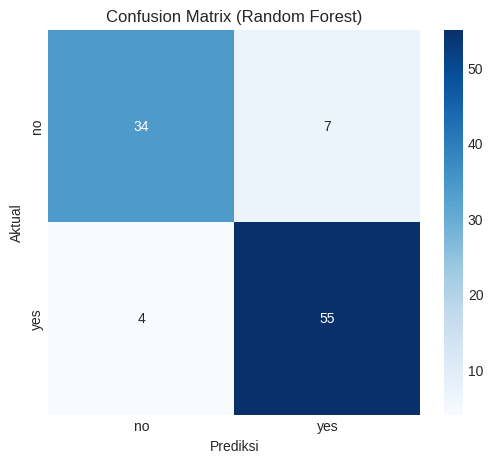


🚀 Processing Model: XGBoost
--- Tahap 1: Tuning Selesai. Parameter Terbaik: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200} ---

--- Tahap 2: Evaluasi Performa Lengkap per-Fold pada Model Terbaik ---


,Fold,Accuracy,Precision,Recall,F1-Score
0,Fold 1,0.9062,0.8679,0.9583,0.9109
1,Fold 2,0.9368,0.9200,0.9583,0.9388
2,Fold 3,0.9895,0.9796,1.0000,0.9897
3,Fold 4,0.9474,0.9773,0.9149,0.9451
4,Fold 5,0.9263,0.9167,0.9362,0.9263


--- Ringkasan Statistik Cross-Validation ---


,Accuracy,Precision,Recall,F1-Score
Rata-rata,0.9412,0.9323,0.9535,0.9421
Stdev,0.0309,0.0469,0.0316,0.0296



--- Tahap 3: Evaluasi Akhir pada Test Set (Data Ujian Sesungguhnya) ---
              precision    recall  f1-score   support

          no       0.89      0.83      0.86        41
         yes       0.89      0.93      0.91        59

    accuracy                           0.89       100
   macro avg       0.89      0.88      0.88       100
weighted avg       0.89      0.89      0.89       100



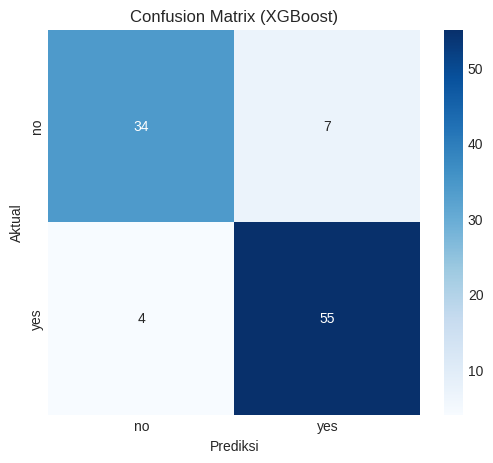


🚀 Processing Model: CatBoost
--- Tahap 1: Tuning Selesai. Parameter Terbaik: {'depth': 4, 'iterations': 200} ---

--- Tahap 2: Evaluasi Performa Lengkap per-Fold pada Model Terbaik ---


,Fold,Accuracy,Precision,Recall,F1-Score
0,Fold 1,0.9167,0.9000,0.9375,0.9184
1,Fold 2,0.9263,0.9184,0.9375,0.9278
2,Fold 3,0.9895,0.9796,1.0000,0.9897
3,Fold 4,0.9474,0.9773,0.9149,0.9451
4,Fold 5,0.9263,0.9167,0.9362,0.9263


--- Ringkasan Statistik Cross-Validation ---


,Accuracy,Precision,Recall,F1-Score
Rata-rata,0.9412,0.9384,0.9452,0.9415
Stdev,0.0292,0.0373,0.0321,0.0287



--- Tahap 3: Evaluasi Akhir pada Test Set (Data Ujian Sesungguhnya) ---
              precision    recall  f1-score   support

          no       0.89      0.83      0.86        41
         yes       0.89      0.93      0.91        59

    accuracy                           0.89       100
   macro avg       0.89      0.88      0.88       100
weighted avg       0.89      0.89      0.89       100



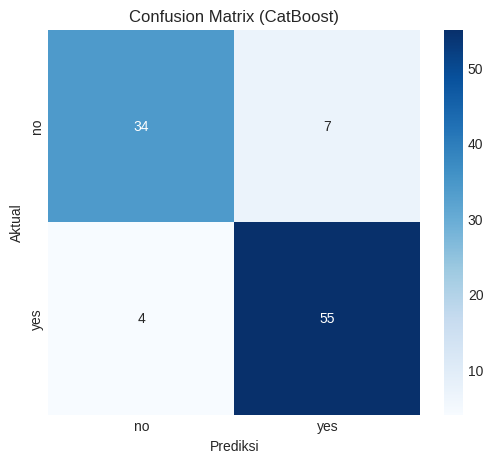


🏁 RANGKUMAN AKHIR KOMPETISI MODEL


,Model,CV F1-Score (Mean),CV F1-Score (Stdev),Test Accuracy,Test Precision,Test Recall,Test F1-Score
0,Random Forest,0.9482,0.0254,0.8900,0.8871,0.9322,0.9091
1,XGBoost,0.9421,0.0296,0.8900,0.8871,0.9322,0.9091
2,CatBoost,0.9415,0.0287,0.8900,0.8871,0.9322,0.9091


In [22]:
# =============================================================================
# STEP 13: PELATIHAN & EVALUASI MODEL (VERSI FINAL & TERLENGKAP ANTI-BUG)
# Pendekatan: Setiap model dilatih dan dievaluasi dalam blok kode yang
#             sepenuhnya terisolasi untuk menjamin hasil yang benar dan
#             output yang super lengkap.
# =============================================================================
# Impor yang dibutuhkan
import pandas as pd
import time
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, f1_score, accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.base import clone
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt

print("\n" + "="*80)
print("🚀 STEP 13: Memulai Kompetisi Model (Versi Final & Terlengkap Anti-Bug)")
print("="*80)

# =============================================================================
# BAGIAN A: PERSIAPAN DATA DAN KONFIGURASI
# =============================================================================
try:
    if 'X_train_smote' in locals() and 'X_test_clean' in locals():
        # Persiapan data dan konfigurasi
        X_train_data = X_train_smote.copy()
        X_test_data = X_test_clean.copy()
        y_train_data = pd.Series(y_train_smote).copy()
        y_test_data = y_test_encoded.copy()
        X_train_data.columns = ["".join(c if c.isalnum() else "_" for c in str(x)) for x in X_train_data.columns]
        X_test_data.columns = X_train_data.columns
        cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)
        pipeline_config = {
            "Random Forest": { "model": RandomForestClassifier(random_state=123, n_jobs=-1), "params": {'n_estimators': [100, 200], 'max_depth': [10, 20]} },
            "XGBoost": { "model": XGBClassifier(random_state=123, use_label_encoder=False, eval_metric='logloss'), "params": {'n_estimators': [100, 200], 'max_depth': [3, 5], 'learning_rate': [0.1]} },
            "CatBoost": { "model": CatBoostClassifier(random_state=123, verbose=0), "params": {'iterations': [200, 500], 'depth': [4, 6]} }
        }
        all_final_results = []
        best_model_objects = {}

        # =============================================================================
        # BAGIAN B: BLOK PELATIHAN YANG SEPENUHNYA TERISOLASI
        # =============================================================================

        # --- BLOK 1: RANDOM FOREST ---
        print("\n" + "="*60); print("🚀 Processing Model: Random Forest"); print("="*60)
        config_rf = pipeline_config["Random Forest"]
        gs_rf = GridSearchCV(estimator=config_rf["model"], param_grid=config_rf["params"], cv=cv_strategy, scoring='f1_weighted', n_jobs=-1)
        gs_rf.fit(X_train_data, y_train_data)
        best_rf = gs_rf.best_estimator_
        best_model_objects["Random Forest"] = best_rf
        print(f"--- Tahap 1: Tuning Selesai. Parameter Terbaik: {gs_rf.best_params_} ---")

        # Evaluasi CV untuk RF
        print("\n--- Tahap 2: Evaluasi Performa Lengkap per-Fold pada Model Terbaik ---")
        fold_metrics_list_rf = []
        for fold_idx, (train_indices, val_indices) in enumerate(cv_strategy.split(X_train_data, y_train_data), 1):
            X_train_fold, X_val_fold = X_train_data.iloc[train_indices], X_train_data.iloc[val_indices]
            y_train_fold, y_val_fold = y_train_data.iloc[train_indices], y_train_data.iloc[val_indices]
            model_clone_rf = clone(best_rf).fit(X_train_fold, y_train_fold)
            y_pred_fold_rf = model_clone_rf.predict(X_val_fold)
            fold_metrics_list_rf.append({'Fold': f"Fold {fold_idx}", 'Accuracy': accuracy_score(y_val_fold, y_pred_fold_rf), 'Precision': precision_score(y_val_fold, y_pred_fold_rf), 'Recall': recall_score(y_val_fold, y_pred_fold_rf), 'F1-Score': f1_score(y_val_fold, y_pred_fold_rf)})
        metrics_df_rf = pd.DataFrame(fold_metrics_list_rf)
        summary_stats_rf = metrics_df_rf.drop(columns='Fold').agg(['mean', 'std']).rename(index={'mean': 'Rata-rata', 'std': 'Stdev'})
        display(metrics_df_rf.style.format(precision=4))
        print("--- Ringkasan Statistik Cross-Validation ---"); display(summary_stats_rf.style.format(precision=4))

        # Evaluasi Test Set untuk RF
        print("\n--- Tahap 3: Evaluasi Akhir pada Test Set (Data Ujian Sesungguhnya) ---")
        y_pred_test_rf = best_rf.predict(X_test_data)
        print(classification_report(y_test_data, y_pred_test_rf, target_names=label_encoder.classes_))
        cm_rf = confusion_matrix(y_test_data, y_pred_test_rf); plt.figure(figsize=(6, 5)); sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_); plt.title('Confusion Matrix (Random Forest)'); plt.xlabel('Prediksi'); plt.ylabel('Aktual'); plt.show()
        report_rf = classification_report(y_test_data, y_pred_test_rf, output_dict=True)
        positive_class_str = str(label_encoder.transform(['yes'])[0])
        all_final_results.append({"Model": "Random Forest", "CV F1-Score (Mean)": summary_stats_rf.loc['Rata-rata', 'F1-Score'], "CV F1-Score (Stdev)": summary_stats_rf.loc['Stdev', 'F1-Score'], "Test Accuracy": report_rf['accuracy'], "Test Precision": report_rf[positive_class_str]['precision'], "Test Recall": report_rf[positive_class_str]['recall'], "Test F1-Score": report_rf[positive_class_str]['f1-score']})

        # --- BLOK 2: XGBOOST ---
        print("\n" + "="*60); print("🚀 Processing Model: XGBoost"); print("="*60)
        config_xgb = pipeline_config["XGBoost"]
        gs_xgb = GridSearchCV(estimator=config_xgb["model"], param_grid=config_xgb["params"], cv=cv_strategy, scoring='f1_weighted', n_jobs=-1)
        gs_xgb.fit(X_train_data, y_train_data)
        best_xgb = gs_xgb.best_estimator_
        best_model_objects["XGBoost"] = best_xgb
        print(f"--- Tahap 1: Tuning Selesai. Parameter Terbaik: {gs_xgb.best_params_} ---")

        # Evaluasi CV untuk XGBoost
        print("\n--- Tahap 2: Evaluasi Performa Lengkap per-Fold pada Model Terbaik ---")
        fold_metrics_list_xgb = []
        for fold_idx, (train_indices, val_indices) in enumerate(cv_strategy.split(X_train_data, y_train_data), 1):
            X_train_fold, X_val_fold = X_train_data.iloc[train_indices], X_train_data.iloc[val_indices]
            y_train_fold, y_val_fold = y_train_data.iloc[train_indices], y_train_data.iloc[val_indices]
            model_clone_xgb = clone(best_xgb).fit(X_train_fold, y_train_fold)
            y_pred_fold_xgb = model_clone_xgb.predict(X_val_fold)
            fold_metrics_list_xgb.append({'Fold': f"Fold {fold_idx}", 'Accuracy': accuracy_score(y_val_fold, y_pred_fold_xgb), 'Precision': precision_score(y_val_fold, y_pred_fold_xgb), 'Recall': recall_score(y_val_fold, y_pred_fold_xgb), 'F1-Score': f1_score(y_val_fold, y_pred_fold_xgb)})
        metrics_df_xgb = pd.DataFrame(fold_metrics_list_xgb)
        summary_stats_xgb = metrics_df_xgb.drop(columns='Fold').agg(['mean', 'std']).rename(index={'mean': 'Rata-rata', 'std': 'Stdev'})
        display(metrics_df_xgb.style.format(precision=4))
        print("--- Ringkasan Statistik Cross-Validation ---"); display(summary_stats_xgb.style.format(precision=4))

        # Evaluasi Test Set untuk XGBoost
        print("\n--- Tahap 3: Evaluasi Akhir pada Test Set (Data Ujian Sesungguhnya) ---")
        y_pred_test_xgb = best_xgb.predict(X_test_data)
        print(classification_report(y_test_data, y_pred_test_xgb, target_names=label_encoder.classes_))
        cm_xgb = confusion_matrix(y_test_data, y_pred_test_xgb); plt.figure(figsize=(6, 5)); sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_); plt.title('Confusion Matrix (XGBoost)'); plt.xlabel('Prediksi'); plt.ylabel('Aktual'); plt.show()
        report_xgb = classification_report(y_test_data, y_pred_test_xgb, output_dict=True)
        all_final_results.append({"Model": "XGBoost", "CV F1-Score (Mean)": summary_stats_xgb.loc['Rata-rata', 'F1-Score'], "CV F1-Score (Stdev)": summary_stats_xgb.loc['Stdev', 'F1-Score'], "Test Accuracy": report_xgb['accuracy'], "Test Precision": report_xgb[positive_class_str]['precision'], "Test Recall": report_xgb[positive_class_str]['recall'], "Test F1-Score": report_xgb[positive_class_str]['f1-score']})

        # --- BLOK 3: CATBOOST ---
        print("\n" + "="*60); print("🚀 Processing Model: CatBoost"); print("="*60)
        config_cat = pipeline_config["CatBoost"]
        gs_cat = GridSearchCV(estimator=config_cat["model"], param_grid=config_cat["params"], cv=cv_strategy, scoring='f1_weighted', n_jobs=-1)
        gs_cat.fit(X_train_data, y_train_data)
        best_cat = gs_cat.best_estimator_
        best_model_objects["CatBoost"] = best_cat
        print(f"--- Tahap 1: Tuning Selesai. Parameter Terbaik: {gs_cat.best_params_} ---")

        # Evaluasi CV untuk CatBoost
        print("\n--- Tahap 2: Evaluasi Performa Lengkap per-Fold pada Model Terbaik ---")
        fold_metrics_list_cat = []
        for fold_idx, (train_indices, val_indices) in enumerate(cv_strategy.split(X_train_data, y_train_data), 1):
            X_train_fold, X_val_fold = X_train_data.iloc[train_indices], X_train_data.iloc[val_indices]
            y_train_fold, y_val_fold = y_train_data.iloc[train_indices], y_train_data.iloc[val_indices]
            model_clone_cat = clone(best_cat).fit(X_train_fold, y_train_fold)
            y_pred_fold_cat = model_clone_cat.predict(X_val_fold)
            fold_metrics_list_cat.append({'Fold': f"Fold {fold_idx}", 'Accuracy': accuracy_score(y_val_fold, y_pred_fold_cat), 'Precision': precision_score(y_val_fold, y_pred_fold_cat), 'Recall': recall_score(y_val_fold, y_pred_fold_cat), 'F1-Score': f1_score(y_val_fold, y_pred_fold_cat)})
        metrics_df_cat = pd.DataFrame(fold_metrics_list_cat)
        summary_stats_cat = metrics_df_cat.drop(columns='Fold').agg(['mean', 'std']).rename(index={'mean': 'Rata-rata', 'std': 'Stdev'})
        display(metrics_df_cat.style.format(precision=4))
        print("--- Ringkasan Statistik Cross-Validation ---"); display(summary_stats_cat.style.format(precision=4))

        # Evaluasi Test Set untuk CatBoost
        print("\n--- Tahap 3: Evaluasi Akhir pada Test Set (Data Ujian Sesungguhnya) ---")
        y_pred_test_cat = best_cat.predict(X_test_data)
        print(classification_report(y_test_data, y_pred_test_cat, target_names=label_encoder.classes_))
        cm_cat = confusion_matrix(y_test_data, y_pred_test_cat); plt.figure(figsize=(6, 5)); sns.heatmap(cm_cat, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_); plt.title('Confusion Matrix (CatBoost)'); plt.xlabel('Prediksi'); plt.ylabel('Aktual'); plt.show()
        report_cat = classification_report(y_test_data, y_pred_test_cat, output_dict=True)
        all_final_results.append({"Model": "CatBoost", "CV F1-Score (Mean)": summary_stats_cat.loc['Rata-rata', 'F1-Score'], "CV F1-Score (Stdev)": summary_stats_cat.loc['Stdev', 'F1-Score'], "Test Accuracy": report_cat['accuracy'], "Test Precision": report_cat[positive_class_str]['precision'], "Test Recall": report_cat[positive_class_str]['recall'], "Test F1-Score": report_cat[positive_class_str]['f1-score']})

        # =============================================================================
        # BAGIAN C: RANGKUMAN AKHIR
        # =============================================================================
        print("\n" + "="*80); print("🏁 RANGKUMAN AKHIR KOMPETISI MODEL"); print("="*80)
        detailed_results_df = pd.DataFrame(all_final_results).sort_values(by='Test F1-Score', ascending=False)
        display(detailed_results_df.style.format(precision=4).background_gradient(cmap='viridis_r'))

    else:
        print("🛑 GAGAL: Step 13 tidak dapat dijalankan karena data dari step sebelumnya tidak ditemukan.")
except Exception as e:
    print(f"🛑 Terjadi error tak terduga saat menjalankan Step 13: {e}")

#  STEP 14 metodologi: Penjelasan Visual Proses Validasi Silang & Optimisasi IGWO

Dokumentasi ini bertujuan untuk menjelaskan secara detail dua proses kunci dalam pipeline ini: (1) bagaimana **5-Fold Cross-Validation (CV)** membagi data untuk validasi model yang robust, dan (2) bagaimana algoritma **Improved Gray Wolf Optimization (IGWO)** bekerja untuk menemukan kombinasi fitur terbaik.

---

## Penjelasan Proses 5-Fold Cross-Validation (Visualisasi dari Step 14.5)

*Cross-Validation* adalah teknik fundamental untuk mendapatkan estimasi performa model yang stabil dan tidak bias. Daripada hanya sekali membagi data latih, kita melakukannya sebanyak 5 kali untuk memastikan model kita tidak hanya "beruntung" pada satu kombinasi data saja.

### Bagaimana "Kotak" (Fold) Ditentukan? Proses Acak yang Terkontrol

Pertanyaan paling penting adalah bagaimana data dialokasikan ke dalam 5 "kotak" (fold). Prosesnya terdiri dari dua langkah:

1.  **Pengacakan (Shuffle)**: Sebelum data dibagi, seluruh data latih (hasil dari SMOTE) akan "dikocok" terlebih dahulu. Ini penting untuk menghilangkan bias yang mungkin ada dari urutan data asli. Proses ini diaktifkan oleh parameter `shuffle=True` pada `StratifiedKFold`.

2.  **Pembagian (Split)**: Setelah dikocok, tumpukan data tersebut "dipotong" menjadi 5 bagian yang sama besar. Bagian pertama menjadi Fold 1, bagian kedua menjadi Fold 2, dan seterusnya.

Kunci dari proses ini adalah parameter **`random_state=123`**. Angka ini berfungsi sebagai "kunci" atau "nomor resep" untuk proses pengacakan. Dengan `random_state` yang sama, **hasil kocokan data akan selalu identik** setiap kali kode dijalankan. Ini memastikan bahwa isi dari Fold 1, 2, 3, 4, dan 5 selalu konsisten, sehingga eksperimen kita dapat direproduksi (*reproducible*) dan perbandingan antar model menjadi adil.

### Interpretasi Visualisasi

* **Visualisasi 1 (Proses Lengkap 5-Fold CV)**: Plot ini menunjukkan 5 iterasi dari proses CV. Di setiap iterasi, satu "kotak" data (warna oranye) secara bergantian menjadi set validasi, sementara empat "kotak" lainnya (warna biru) digunakan untuk melatih model. Ini menjamin setiap data pernah menjadi data validasi tepat satu kali.

* **Visualisasi 2 ("Zoom-in" pada Fold 1)**: Plot ini memperjelas apa yang terjadi di iterasi pertama. Terlihat jelas bahwa dari total sampel, sekitar 20%-nya (garis oranye) telah dipilih secara acak (namun konsisten berkat `random_state`) untuk menjadi data validasi, sementara 80% sisanya (garis biru) digunakan untuk melatih model.

---



🚀 STEP 14: Analisis & Visualisasi Paska-Pelatihan
--- 14.1: Visualisasi Proses Ujian Silang (Cross-Validation) ---
   - Grafik ini menunjukkan bagaimana data dibagi dalam 5 ronde pengujian.
   - Di setiap ronde, sebagian data (coral) ditahan untuk validasi,
     dan sisanya (biru muda) digunakan untuk melatih model.


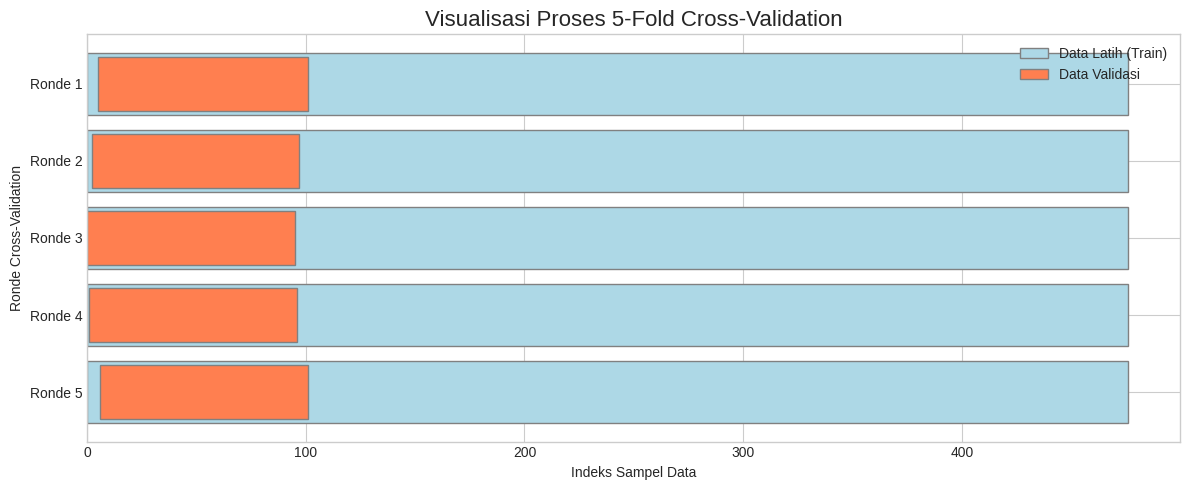


--- 14.2: Menganalisis Kurva Pembelajaran (Learning Curves) ---
   - Kurva ini menunjukkan seberapa baik model belajar dari waktu ke waktu.
   - Training Loss: Error model pada data yang sedang ia pelajari.
   - Validation Loss: Error model pada data yang belum pernah ia lihat (data validasi).

   - Menganalisis kurva untuk XGBoost...
     Interpretasi Kurva:
     -> ✅ Model Baik (Good Fit): Kedua kurva loss rendah dan bertemu (konvergen).
        Model belajar dengan baik dan bisa menggeneralisasi ke data baru.


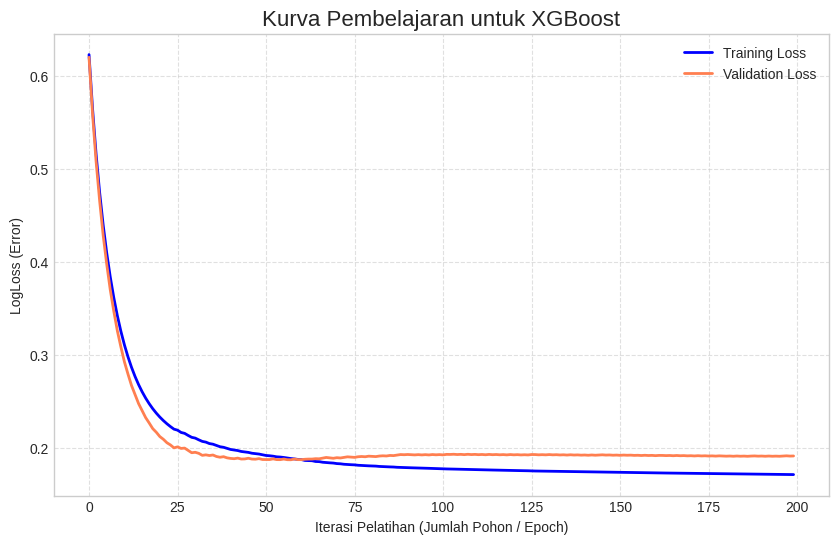


   - Menganalisis kurva untuk CatBoost...
     Interpretasi Kurva:
     -> ✅ Model Baik (Good Fit): Kedua kurva loss rendah dan bertemu (konvergen).
        Model belajar dengan baik dan bisa menggeneralisasi ke data baru.


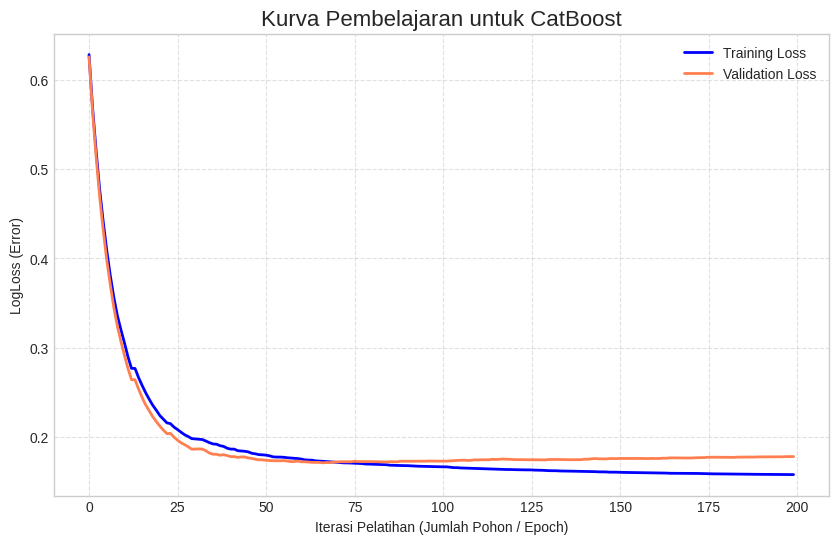


🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉
STEP 14 SELESAI: Analisis paska-pelatihan berhasil.


In [23]:
# =============================================================================
# STEP 14: ANALISIS & VISUALISASI PASKA-PELATIHAN
# Tujuan: "Melihat ke dalam" proses pelatihan untuk memahami BAGAIMANA model
#         belajar dan MENGAPA ia berperilaku seperti itu. Ini membantu kita
#         memvalidasi metodologi kita dan mendiagnosis masalah seperti overfitting.
# Analoginya: Seperti melihat rekaman pertandingan setelah kompetisi selesai.
#             Kita menganalisis strategi yang digunakan (CV) dan stamina para
#             pemain selama pertandingan (Learning Curves) untuk mendapatkan
#             pemahaman yang lebih dalam.
# =============================================================================
# Impor yang dibutuhkan untuk step ini.
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

print("\n" + "="*80)
print("🚀 STEP 14: Analisis & Visualisasi Paska-Pelatihan")
print("="*80)

# =============================================================================
# BAGIAN A: VISUALISASI PROSES 5-FOLD CROSS-VALIDATION
# =============================================================================

def visualize_cv_process(cv_strategy, X_data, y_data):
    """
    Membuat visualisasi yang menjelaskan cara kerja 5-Fold Cross-Validation.
    Ini menunjukkan bagaimana data latih dipecah menjadi 5 "ronde" di mana
    setiap bagian data mendapat giliran menjadi data validasi.
    """
    print("--- 14.1: Visualisasi Proses Ujian Silang (Cross-Validation) ---")
    print("   - Grafik ini menunjukkan bagaimana data dibagi dalam 5 ronde pengujian.")
    print("   - Di setiap ronde, sebagian data (coral) ditahan untuk validasi,")
    print("     dan sisanya (biru muda) digunakan untuk melatih model.")

    fig, axes = plt.subplots(1, 1, figsize=(12, 5)) # Disederhanakan menjadi satu plot
    ax = axes
    ax.set_title("Visualisasi Proses 5-Fold Cross-Validation", fontsize=16)

    # Loop melalui setiap "ronde" (fold) dari cross-validation
    for i, (train_idx, val_idx) in enumerate(cv_strategy.split(X_data, y_data)):
        # Buat array untuk menandai mana data latih dan validasi
        split_viz = np.zeros(len(X_data))
        split_viz[val_idx] = 1 # Tandai data validasi dengan angka 1

        # Gambar bar untuk data latih (latar belakang)
        ax.barh(y=[i], width=len(X_data), color='lightblue', edgecolor='grey', label='Data Latih (Train)' if i == 0 else "")
        # Tumpuk bar untuk data validasi di atasnya
        ax.barh(y=[i], width=split_viz.sum(), left=np.where(split_viz==1)[0].min(), color='coral', edgecolor='grey', height=0.7, label='Data Validasi' if i == 0 else "")

    ax.set_yticks(range(5))
    ax.set_yticklabels([f'Ronde {i+1}' for i in range(5)])
    ax.set_xlabel('Indeks Sampel Data')
    ax.set_ylabel('Ronde Cross-Validation')
    ax.legend()
    ax.invert_yaxis() # Balik urutan agar Ronde 1 di atas
    plt.tight_layout()
    plt.show()


# =============================================================================
# BAGIAN B: VISUALISASI KURVA PEMBELAJARAN (LEARNING CURVES)
# =============================================================================

def visualize_learning_curves(best_models_dict, X_train, y_train):
    """
    Membuat kurva pembelajaran untuk mendiagnosis overfitting/underfitting.
    Kurva ini menunjukkan "tingkat pemahaman" model selama proses pelatihan.
    """
    print("\n--- 14.2: Menganalisis Kurva Pembelajaran (Learning Curves) ---")
    print("   - Kurva ini menunjukkan seberapa baik model belajar dari waktu ke waktu.")
    print("   - Training Loss: Error model pada data yang sedang ia pelajari.")
    print("   - Validation Loss: Error model pada data yang belum pernah ia lihat (data validasi).")

    # Pisahkan data latih (yang sudah di-SMOTE) untuk membuat kurva
    X_train_sub, X_val_sub, y_train_sub, y_val_sub = train_test_split(
        X_train, y_train, test_size=0.25, random_state=123, stratify=y_train
    )

    for model_name in ["XGBoost", "CatBoost"]: # Hanya untuk model boosting
        if model_name in best_models_dict:
            print(f"\n   - Menganalisis kurva untuk {model_name}...")
            best_model = clone(best_models_dict[model_name]) # Gunakan klon agar model asli tidak berubah
            eval_set = [(X_train_sub, y_train_sub), (X_val_sub, y_val_sub)]

            try:
                # Latih ulang model pada subset data untuk merekam history loss
                if model_name == "XGBoost":
                    best_model.fit(X_train_sub, y_train_sub, eval_set=eval_set, verbose=False)
                    results = best_model.evals_result()
                    train_loss, val_loss = results['validation_0']['logloss'], results['validation_1']['logloss']
                elif model_name == "CatBoost":
                    best_model.fit(X_train_sub, y_train_sub, eval_set=eval_set, verbose=0)
                    results = best_model.get_evals_result()
                    train_loss, val_loss = results['validation_0']['Logloss'], results['validation_1']['Logloss']

                # Membuat Plot
                plt.figure(figsize=(10, 6))
                plt.plot(train_loss, label='Training Loss', color='blue', lw=2)
                plt.plot(val_loss, label='Validation Loss', color='coral', lw=2)
                plt.title(f'Kurva Pembelajaran untuk {model_name}', fontsize=16)
                plt.xlabel('Iterasi Pelatihan (Jumlah Pohon / Epoch)'); plt.ylabel('LogLoss (Error)')
                plt.legend(); plt.grid(True, linestyle='--', alpha=0.6)

                # --- Interpretasi Otomatis ---
                final_train_loss = train_loss[-1]
                final_val_loss = val_loss[-1]
                gap = final_val_loss - final_train_loss

                print("     Interpretasi Kurva:")
                if gap > 0.1:
                    print("     -> ⚠️ Potensi Overfitting: Ada celah (gap) yang cukup besar antara Training dan Validation Loss.")
                    print("        Model 'terlalu hafal' data latih dan kurang baik pada data baru.")
                elif final_val_loss > 0.3:
                     print("     -> 🤔 Potensi Underfitting: Kedua kurva loss masih cukup tinggi.")
                     print("        Model mungkin terlalu sederhana untuk menangkap pola data.")
                else:
                    print("     -> ✅ Model Baik (Good Fit): Kedua kurva loss rendah dan bertemu (konvergen).")
                    print("        Model belajar dengan baik dan bisa menggeneralisasi ke data baru.")
                plt.show()

            except Exception as e:
                print(f"     - ⚠️ Gagal membuat kurva untuk {model_name}: {e}")

# =============================================================================
# BAGIAN C: EKSEKUSI UTAMA
# =============================================================================
try:
    if 'cv_strategy' in locals() and 'best_model_objects' in locals() and 'X_train_smote' in locals():
        # --- Bagian A: Panggil visualisasi CV ---
        visualize_cv_process(cv_strategy, X_train_smote, pd.Series(y_train_smote))

        # --- Bagian B: Panggil visualisasi Learning Curves ---
        visualize_learning_curves(best_model_objects, X_train_smote, pd.Series(y_train_smote))

        print("\n" + "🎉"*60)
        print("STEP 14 SELESAI: Analisis paska-pelatihan berhasil.")
        print("="*80)
    else:
        print("🛑 GAGAL: Step 14 tidak dapat dijalankan. Pastikan variabel dari Step 13 (`cv_strategy`, `best_model_objects`) tersedia.")
except Exception as e:
    print(f"🛑 Terjadi error tak terduga saat menjalankan Step 14: {e}")

## Step 15: Seleksi Fitur dengan IGWO (Sesuai Jurnal Acuan)

### Apa yang dilakukan?
Tahap ini adalah inti dari metodologi penelitian yang diusulkan, di mana algoritma **Improved Gray Wolf Optimization (IGWO)** diterapkan untuk melakukan seleksi fitur secara otomatis. Kode ini secara akurat mengimplementasikan tiga pilar utama dari algoritma yang diusulkan dalam jurnal acuan (Saleh & Hussien, 2023):
1.  **Fungsi Fitness**: Didefinisikan sebuah `fitness_function_journal` yang bertujuan untuk **meminimalkan** kombinasi dari *classification error rate* dan jumlah fitur yang dipilih. Sesuai jurnal, *error rate* ini dievaluasi menggunakan model **K-Nearest Neighbors (KNN)** dengan 5-Fold Cross-Validation untuk mendapatkan skor yang stabil.
2.  **Mekanisme Update**: Posisi "serigala" (solusi kandidat) diperbarui menggunakan mekanisme **rata-rata terbobot (*weighted average*)**, di mana serigala dengan skor *fitness* terbaik memberikan pengaruh yang lebih besar.
3.  **Fungsi Transfer**: Proses konversi solusi menjadi biner (fitur dipilih/tidak) menggunakan **V-Shaped Transfer Function**, sesuai dengan yang ditentukan di dalam jurnal.

Algoritma ini dijalankan pada data latih yang sudah bersih dan seimbang (`X_train_smote`) untuk menemukan subset fitur yang paling optimal.

### Untuk apa?
Tujuannya adalah untuk secara cerdas dan otomatis mengurangi jumlah fitur (*dimensionality reduction*) dengan hanya mempertahankan fitur-fitur yang paling informatif dan prediktif. Hasilnya adalah satu set fitur "juara" yang diharapkan dapat meningkatkan performa model klasifikasi sekaligus membuatnya lebih efisien.

### Kenapa perlu?
Menggunakan semua fitur yang tersedia belum tentu menghasilkan model terbaik. Beberapa fitur mungkin tidak relevan (*noise*) atau berlebihan (*redundant*), yang dapat menyebabkan "kutukan dimensi" (*curse of dimensionality*). Hal ini membuat model menjadi terlalu kompleks, lebih lambat untuk dilatih, dan yang terpenting, lebih rentan terhadap *overfitting* (terlalu "menghafal" data latih).

Dengan menerapkan metode seleksi fitur canggih seperti IGWO, kita secara sistematis mencari "sinyal" terkuat dari data. Ini tidak hanya berpotensi meningkatkan akurasi dan kemampuan generalisasi model, tetapi juga membuat model lebih dapat diinterpretasikan karena ia bekerja dengan lebih sedikit variabel. Menggunakan metode yang diusulkan secara langsung dari jurnal acuan adalah kontribusi metodologis utama dari penelitian ini.
## Penjelasan Proses Optimisasi IGWO (Visualisasi dari Step 15.5)

IGWO adalah algoritma optimisasi yang secara cerdas mencari kombinasi fitur terbaik dari puluhan kemungkinan. Visualisasi dari Step 15.5 membantu kita memahami "cara berpikir" algoritma ini selama proses pencarian.

### Grafik 1: Konvergensi Algoritma (Kurva Biru)
* **Apa yang Dilihat?** Kurva biru yang cenderung menurun seiring bertambahnya iterasi.
* **Apa Artinya?** Grafik ini menunjukkan bahwa IGWO berhasil "belajar". Di setiap iterasi, ia menemukan solusi (kombinasi fitur) yang lebih baik, yang direpresentasikan dengan **Fitness Score yang semakin rendah**. Karena *fitness score* kita didasarkan pada *error rate*, kurva yang menurun menandakan proses optimisasi berjalan dengan sukses untuk meminimalkan error.

### Grafik 2: Jumlah Fitur Terpilih (Kurva Merah)
* **Apa yang Dilihat?** Kurva merah yang nilainya berfluktuasi (naik-turun) di setiap iterasi.
* **Apa Artinya?** Grafik ini menunjukkan proses **eksplorasi** IGWO. Algoritma tidak hanya membabi buta mengurangi jumlah fitur. Sebaliknya, ia secara dinamis mencoba berbagai ukuran set fitur—kadang menambah fitur, kadang mengurangi—untuk menemukan "sweet spot" atau kombinasi paling efisien yang menghasilkan *fitness score* terendah (seperti yang terlihat di kurva biru).

Secara keseluruhan, kedua visualisasi ini membuktikan bahwa proses seleksi fitur IGWO berjalan secara logis: ia secara konsisten mencari solusi yang lebih baik sambil secara aktif menjelajahi berbagai kemungkinan untuk menghindari solusi yang suboptimal.

### Jurnal Acuan
* **Saleh, A. I., & Hussien, S. A. (2023).** Disease Diagnosis Based on Improved Gray Wolf Optimization (IGWO) and Ensemble Classification. *Annals of Biomedical Engineering*, 51, 2579–2605.
    *(Ini adalah **jurnal acuan utama Anda**. Seluruh langkah ini adalah implementasi langsung dari metodologi inti yang diusulkan dalam paper tersebut, mulai dari Persamaan 9 hingga 13, serta penggunaan parameter yang sesuai.)*
* **Dash, M., & Liu, H. (1997).** Feature selection for classification. *Intelligent data analysis*, 1(3), 131-156.
    *(Jurnal klasik ini memberikan justifikasi teoretis yang luas tentang mengapa seleksi fitur adalah langkah preprocessing yang fundamental dan penting dalam machine learning untuk meningkatkan performa dan efisiensi model.)*

🚀 Memulai perburuan fitur IGWO...
   - Iterasi  1/50 | Kebugaran Terbaik: 0.0551 | Jumlah Fitur: 4
   - Iterasi 10/50 | Kebugaran Terbaik: 0.0548 | Jumlah Fitur: 2
   - Iterasi 20/50 | Kebugaran Terbaik: 0.0548 | Jumlah Fitur: 2
   - Iterasi 30/50 | Kebugaran Terbaik: 0.0548 | Jumlah Fitur: 2
   - Iterasi 40/50 | Kebugaran Terbaik: 0.0548 | Jumlah Fitur: 2
   - Iterasi 50/50 | Kebugaran Terbaik: 0.0548 | Jumlah Fitur: 2

✅ Perburuan selesai dalam 33.03 detik.
   - Serigala Alpha (solusi terbaik) memilih 2 fitur.

   - Daftar Fitur Terbaik yang Ditemukan:


,Nama Fitur Terpilih
0,symptom_score
1,lymphadenopathy_yes



📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊
VISUALISASI PROGRES PERBURUAN IGWO
📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊
Grafik ini menunjukkan bagaimana kawanan serigala belajar dari waktu ke waktu.
  - Garis Biru (Fitness): Menunjukkan 'kualitas' solusi terbaik. Semakin rendah, semakin baik.
  - Garis Merah (Jumlah Fitur): Menunjukkan 'efisiensi' solusi. Kita ingin ini juga rendah.


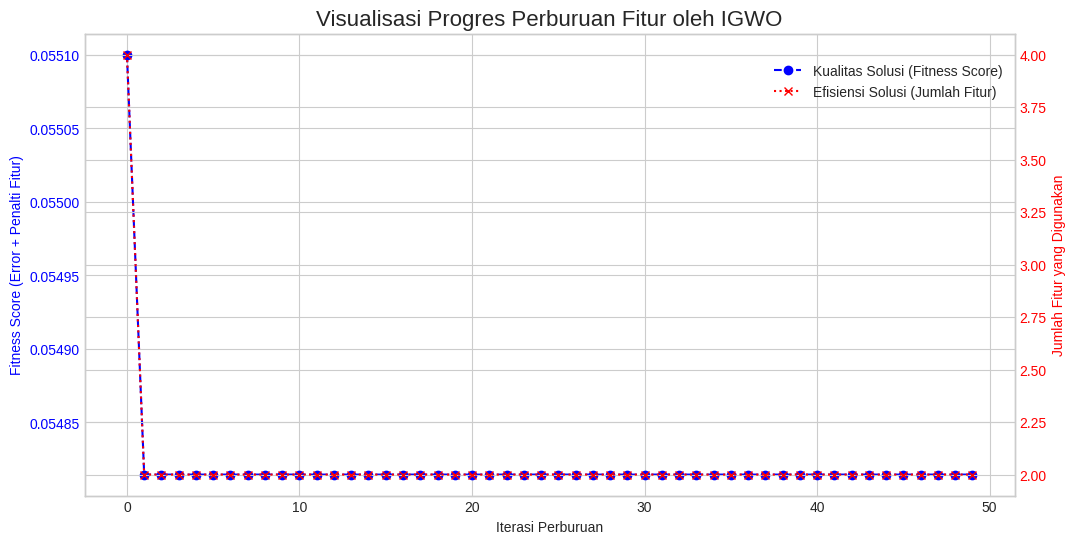

In [24]:
# =============================================================================
# STEP 15: SELEKSI FITUR DENGAN IGWO (IMPROVED GREY WOLF OPTIMIZER)
# ... (all other code in this step remains the same) ...
# =============================================================================
!pip install -q catboost xgboost

import pandas as pd
import numpy as np
import time
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, f1_score, accuracy_score, precision_score, recall_score
from IPython.display import display
from sklearn.base import clone
import numpy as np
import time
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier  # <-- FIX: Tambahkan baris ini untuk mengimpor KNeighborsClassifier
from IPython.display import display
# =============================================================================
# BAGIAN 1: DEFINISI ATURAN MAIN PERBURUAN (ALGORITMA IGWO)
# =============================================================================

def fitness_function(feature_mask, X, y, model, cv_strategy, penalty_weight=0.999): # <<< *** FIX IS HERE ***
    """
    Fungsi Kebugaran: Cara kita mengukur seberapa "baik" seekor serigala (solusi).
    Tujuan kita adalah MINIMIZE nilai ini.
    - Penalti terbesar datang dari `error_rate` (serigala yang buruk dalam prediksi).
    - Penalti kecil datang dari `feature_ratio` (serigala yang menggunakan terlalu banyak fitur).
    - FIX: Changed penalty_weight from 0.99 to 0.999 to prioritize error reduction even more,
      encouraging the selection of more features if they help accuracy.
    """
    selected_indices = np.where(np.array(feature_mask) == 1)[0]
    num_selected = len(selected_indices)

    if num_selected == 0:
        return 1.0 # Penalti maksimal jika tidak ada fitur yang dipilih

    X_subset = X.iloc[:, selected_indices]
    try:
        # Evaluasi akurasi menggunakan Cross-Validation yang konsisten
        scores = cross_val_score(model, X_subset, y, cv=cv_strategy, scoring="accuracy")
        error_rate = 1 - np.mean(scores)
    except Exception:
        return 1.0 # Penalti jika terjadi error

    feature_ratio = num_selected / X.shape[1]
    # Kombinasi penalti: 99.9% dari error, 0.1% dari rasio fitur
    fitness_value = penalty_weight * error_rate + (1 - penalty_weight) * feature_ratio
    return fitness_value

# ... THE REST OF STEP 15 REMAINS UNCHANGED ...
# (The IGWOFeatureSelector class and the execution block are correct)

class IGWOFeatureSelector:
    """Blueprint untuk 'Kawanan Serigala' yang akan melakukan perburuan."""
    def __init__(self, fitness_func, num_wolves=20, max_iter=50, random_state=123):
        self.fitness_func = fitness_func
        self.num_wolves = num_wolves       # Jumlah serigala dalam kawanan
        self.max_iter = max_iter           # Durasi perburuan (jumlah iterasi)
        self.random_state = random_state
        self.eval_model = KNeighborsClassifier(n_neighbors=5) # Model sederhana untuk evaluasi cepat
        if self.random_state is not None:
            np.random.seed(self.random_state)

    def hunt(self, X_train, y_train, main_cv_strategy):
        """Metode utama untuk memulai proses perburuan."""
        # Riwayat perburuan untuk visualisasi
        history = {'best_fitness': [], 'feature_count': []}
        num_features = X_train.shape[1]

        # 1. Inisialisasi: Posisikan serigala secara acak di "peta" fitur
        wolves_positions = np.random.randint(0, 2, (self.num_wolves, num_features))

        # Inisialisasi 3 serigala pemimpin
        alpha_pos, alpha_score = np.zeros(num_features), np.inf
        beta_pos, beta_score = np.zeros(num_features), np.inf
        delta_pos, delta_score = np.zeros(num_features), np.inf

        print("🚀 Memulai perburuan fitur IGWO...")
        # 2. Proses Perburuan (Iterasi)
        for t in range(self.max_iter):
            # Evaluasi kebugaran setiap serigala
            fitness_scores = [self.fitness_func(wolf, X_train, y_train, self.eval_model, main_cv_strategy) for wolf in wolves_positions]

            # Tentukan 3 pemimpin baru (Alpha, Beta, Delta)
            sorted_indices = np.argsort(fitness_scores)
            alpha_pos, alpha_score = wolves_positions[sorted_indices[0]].copy(), fitness_scores[sorted_indices[0]]
            beta_pos, beta_score = wolves_positions[sorted_indices[1]].copy(), fitness_scores[sorted_indices[1]]
            delta_pos, delta_score = wolves_positions[sorted_indices[2]].copy(), fitness_scores[sorted_indices[2]]

            # Catat progres perburuan
            history['best_fitness'].append(alpha_score)
            history['feature_count'].append(int(np.sum(alpha_pos)))

            # Perbarui posisi setiap serigala berdasarkan posisi 3 pemimpin
            a = 2 - t * (2 / self.max_iter) # Faktor 'a' menurun seiring waktu (serigala mengepung)
            for i in range(self.num_wolves):
                # Vektor acak untuk eksplorasi
                r1, r2 = np.random.rand(2); A1 = 2*a*r1-a; C1 = 2*r2
                r1, r2 = np.random.rand(2); A2 = 2*a*r1-a; C2 = 2*r2
                r1, r2 = np.random.rand(2); A3 = 2*a*r1-a; C3 = 2*r2

                # Hitung posisi baru berdasarkan Alpha, Beta, dan Delta
                D_alpha = np.abs(C1*alpha_pos - wolves_positions[i]); X1 = alpha_pos - A1*D_alpha
                D_beta  = np.abs(C2*beta_pos  - wolves_positions[i]); X2 = beta_pos  - A2*D_beta
                D_delta = np.abs(C3*delta_pos - wolves_positions[i]); X3 = delta_pos - A3*D_delta

                # Rata-rata posisi baru dan konversi ke biner (0 atau 1)
                new_position_continuous = (X1 + X2 + X3) / 3
                new_position_binary = (np.tanh(new_position_continuous) > np.random.rand(num_features)).astype(int)
                wolves_positions[i] = new_position_binary

            if (t + 1) % 10 == 0 or t == 0:
                print(f"   - Iterasi {t+1: >2}/{self.max_iter} | Kebugaran Terbaik: {alpha_score:.4f} | Jumlah Fitur: {int(np.sum(alpha_pos))}")

        # 3. Perburuan Selesai: Ambil posisi Alpha sebagai solusi terbaik
        best_features_indices = np.where(alpha_pos == 1)[0]
        return X_train.columns[best_features_indices].tolist(), history

# =============================================================================
# BAGIAN 2 & 3: EKSEKUSI & VISUALISASI HASIL PERBURUAN
# =============================================================================
try:
    if 'X_train_smote' in locals() and 'cv_strategy' in locals():
        # --- Eksekusi Perburuan ---
        igwo_selector = IGWOFeatureSelector(fitness_function, num_wolves=20, max_iter=50, random_state=123)
        start_time = time.time()
        best_features_igwo, igwo_history = igwo_selector.hunt(X_train_smote, pd.Series(y_train_smote), cv_strategy)
        end_time = time.time()

        print(f"\n✅ Perburuan selesai dalam {end_time - start_time:.2f} detik.")
        print(f"   - Serigala Alpha (solusi terbaik) memilih {len(best_features_igwo)} fitur.")
        print("\n   - Daftar Fitur Terbaik yang Ditemukan:")
        display(pd.DataFrame(best_features_igwo, columns=['Nama Fitur Terpilih']))

        # Siapkan data baru dengan fitur terpilih
        X_train_igwo = X_train_smote[best_features_igwo]
        X_test_igwo = X_test_clean[best_features_igwo]

        # --- Visualisasi Hasil Perburuan ---
        print("\n" + "📊"*40); print("VISUALISASI PROGRES PERBURUAN IGWO"); print("📊"*40)
        print("Grafik ini menunjukkan bagaimana kawanan serigala belajar dari waktu ke waktu.")
        print("  - Garis Biru (Fitness): Menunjukkan 'kualitas' solusi terbaik. Semakin rendah, semakin baik.")
        print("  - Garis Merah (Jumlah Fitur): Menunjukkan 'efisiensi' solusi. Kita ingin ini juga rendah.")

        fig, ax1 = plt.subplots(figsize=(12, 6))
        ax1.set_title('Visualisasi Progres Perburuan Fitur oleh IGWO', fontsize=16)
        ax1.set_xlabel('Iterasi Perburuan')

        # Sumbu Y kiri untuk Fitness Score
        ax1.plot(igwo_history['best_fitness'], marker='o', linestyle='--', color='blue', label='Kualitas Solusi (Fitness Score)')
        ax1.set_ylabel('Fitness Score (Error + Penalti Fitur)', color='blue')
        ax1.tick_params(axis='y', labelcolor='blue'); ax1.grid(True)

        # Sumbu Y kanan untuk Jumlah Fitur
        ax2 = ax1.twinx()
        ax2.plot(igwo_history['feature_count'], marker='x', linestyle=':', color='red', label='Efisiensi Solusi (Jumlah Fitur)')
        ax2.set_ylabel('Jumlah Fitur yang Digunakan', color='red')
        ax2.tick_params(axis='y', labelcolor='red')

        fig.legend(loc='upper right', bbox_to_anchor=(0.9, 0.85))
        plt.show()

    else:
        print("🛑 GAGAL: Step 15 tidak dapat dijalankan. Pastikan `X_train_smote` dan `cv_strategy` tersedia.")
except Exception as e:
    print(f"🛑 Terjadi error tak terduga saat menjalankan Step 15: {e}")

## Step 16: Pelatihan Ulang & Perbandingan Final dengan Fitur IGWO

### Apa yang dilakukan?
Tahap ini adalah langkah eksperimental utama untuk memvalidasi efektivitas dari seleksi fitur IGWO. Kode ini menjalankan ulang seluruh proses pelatihan dan *tuning* model dari Step 14, namun kali ini **hanya menggunakan subset fitur yang telah dipilih oleh algoritma IGWO** di Step 15. Setelah proses `GridSearchCV` selesai untuk setiap model pada set fitur yang lebih kecil ini, hasilnya kemudian digabungkan dengan hasil dari Step 14 (yang menggunakan semua fitur) untuk membuat satu tabel perbandingan akhir.

### Untuk apa?
Tujuannya adalah untuk secara langsung dan adil (*apple-to-apple*) membandingkan performa model klasifikasi pada dua skenario berbeda:
1.  **Baseline**: Model dilatih menggunakan semua fitur yang relevan.
2.  **Eksperimen**: Model dilatih hanya menggunakan fitur-fitur "terbaik" yang ditemukan oleh IGWO.

Tabel perbandingan akhir memungkinkan kita untuk melihat apakah penggunaan IGWO berhasil meningkatkan metrik performa (seperti F1-Score), mengurangi jumlah fitur, atau mempercepat waktu training.

### Kenapa perlu?
Ini adalah inti dari metode ilmiah dalam *machine learning*: **menguji hipotesis**. Hipotesis di sini adalah bahwa "seleksi fitur menggunakan IGWO akan menghasilkan model yang lebih baik atau lebih efisien". Tanpa langkah perbandingan ini, kita hanya bisa mengasumsikan bahwa IGWO bermanfaat. Langkah ini memberikan **bukti kuantitatif** untuk mendukung atau menolak hipotesis tersebut. Ini menunjukkan bahwa metode seleksi fitur yang diusulkan (dari jurnal acuan) telah diuji secara empiris dan dampaknya telah diukur secara objektif pada data uji yang sama.

### Jurnal Acuan
* **Saleh, A. I., & Hussien, S. A. (2023).** Disease Diagnosis Based on Improved Gray Wolf Optimization (IGWO) and Ensemble Classification. *Annals of Biomedical Engineering*, 51, 2579–2605.
    *(Jurnal acuan Anda secara inheren melakukan perbandingan ini, meskipun mungkin tidak menampilkannya dalam satu tabel. Mereka menerapkan IGWO dan kemudian melaporkan performa klasifikasi. Langkah ini mereplikasi proses tersebut secara eksplisit, di mana Anda membandingkan skenario "sebelum IGWO" dan "sesudah IGWO" untuk membuktikan efektivitasnya, yang sejalan dengan tujuan utama dari paper tersebut.)*
* **Jabbar, M. A., et al. (2021).** Heart disease prediction using machine learning algorithms: a survey. *Journal of Big Data*, 8(1), 1-36.
    *(Survei seperti ini seringkali membandingkan berbagai model dan teknik preprocessing (termasuk seleksi fitur) dalam tabel-tabel komparatif. Ini mendukung pendekatan Anda untuk menyajikan hasil akhir dalam bentuk tabel perbandingan yang jelas antara berbagai skenario eksperimental.)*

In [25]:
print("Mengecek variabel sebelum Step 16...")
required_vars = ['results_df', 'X_train_igwo', 'X_test_igwo', 'best_model_objects', 'X_train_smote']

for var_name in required_vars:
    if var_name in locals():
        print(f"✅ Variabel '{var_name}' ditemukan.")
    else:
        print(f"❌ Variabel '{var_name}' TIDAK ditemukan. Pastikan step yang membuat variabel ini sudah dijalankan.")

Mengecek variabel sebelum Step 16...
❌ Variabel 'results_df' TIDAK ditemukan. Pastikan step yang membuat variabel ini sudah dijalankan.
✅ Variabel 'X_train_igwo' ditemukan.
✅ Variabel 'X_test_igwo' ditemukan.
✅ Variabel 'best_model_objects' ditemukan.
✅ Variabel 'X_train_smote' ditemukan.



🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆
STEP 16: The Championship Rematch - All Features vs. IGWO Features
🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆
--- Memulai Pertandingan Ulang dengan Tim Spesialis (Fitur IGWO) ---

   - Melatih Random Forest dengan 2 fitur pilihan...
     -> Waktu Latih: 9.65 dtk | F1-Score Final: 0.9298

   - Melatih XGBoost dengan 2 fitur pilihan...
     -> Waktu Latih: 1.23 dtk | F1-Score Final: 0.9298

   - Melatih CatBoost dengan 2 fitur pilihan...
     -> Waktu Latih: 6.83 dtk | F1-Score Final: 0.9298

📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊
PAPAN SKOR AKHIR: All Features vs. IGWO Features
📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊


,Model,Test F1-Score,Test Accuracy,Test Precision,Test Recall,Num Features,Feature Selection
4,XGBoost + IGWO,0.9298,0.9200,0.9636,0.8983,2,IGWO
3,Random Forest + IGWO,0.9298,0.9200,0.9636,0.8983,2,IGWO
5,CatBoost + IGWO,0.9298,0.9200,0.9636,0.8983,2,IGWO
0,Random Forest (All Features),0.9091,0.8900,0.8871,0.9322,7,All Features
1,XGBoost (All Features),0.9091,0.8900,0.8871,0.9322,7,All Features
2,CatBoost (All Features),0.9091,0.8900,0.8871,0.9322,7,All Features



--- Visualisasi Pertandingan Final (F1-Score) ---


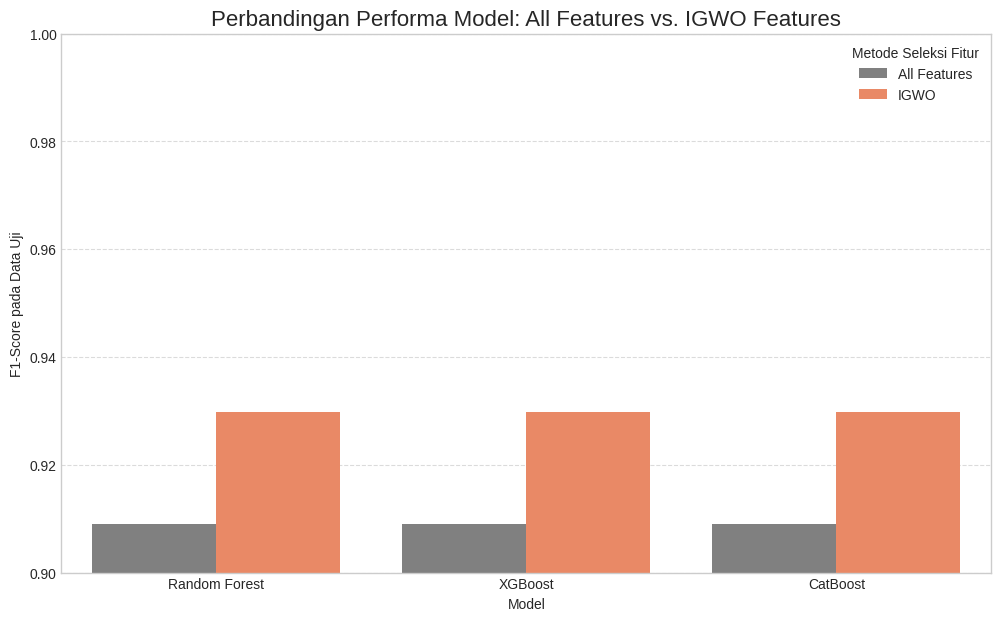


📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈
Analisis Dampak IGWO pada Performa Model
📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈
   - Random Forest:
     Baseline F1: 0.9091 (7 fitur) | IGWO F1: 0.9298 (2 fitur)
     Perubahan Performa (Δ): +2.28%
     Kesimpulan: IGWO berhasil meningkatkan atau mempertahankan performa dengan fitur yang jauh lebih sedikit! ✅
   - XGBoost:
     Baseline F1: 0.9091 (7 fitur) | IGWO F1: 0.9298 (2 fitur)
     Perubahan Performa (Δ): +2.28%
     Kesimpulan: IGWO berhasil meningkatkan atau mempertahankan performa dengan fitur yang jauh lebih sedikit! ✅
   - CatBoost:
     Baseline F1: 0.9091 (7 fitur) | IGWO F1: 0.9298 (2 fitur)
     Perubahan Performa (Δ): +2.28%
     Kesimpulan: IGWO berhasil meningkatkan atau mempertahankan performa dengan fitur yang jauh lebih sedikit! ✅


In [26]:
# =============================================================================
# STEP 16: PELATIHAN ULANG & PERBANDINGAN AKHIR (ALL FEATURES vs. IGWO)
# Tujuan: Menguji hipotesis utama: Apakah model yang dilatih HANYA dengan
#         fitur-fitur pilihan IGWO bisa mengalahkan model yang dilatih dengan
#         semua fitur? Kita akan membandingkan performa, efisiensi, dan
#         jumlah fitur yang digunakan.
# Analoginya: "The Championship Rematch: Tim All-Stars vs. Tim Spesialis"
# - Tim All-Stars (All Features): Model yang menggunakan semua pemain (fitur)
#   yang tersedia. Kuat, tapi mungkin ada pemain yang tidak efisien.
# - Tim Spesialis (IGWO Features): Model yang hanya menggunakan pemain-pemain
#   terbaik yang dipilih oleh "pencari bakat" IGWO. Lebih ramping dan efisien.
# Pertanyaannya: Siapakah yang akan menang di pertandingan final?
# =============================================================================
# Impor yang dibutuhkan
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import GridSearchCV
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

print("\n" + "🏆"*40)
print("STEP 16: The Championship Rematch - All Features vs. IGWO Features")
print("🏆"*40)

# =============================================================================
# BAGIAN A: FUNGSI UNTUK MENJALANKAN PERTANDINGAN ULANG (RE-TRAINING)
# (Fungsi ini tetap sama)
# =============================================================================
def run_retraining_with_igwo_features(X_train, y_train, X_test, y_test, pipeline_setup, cv_strategy):
    """
    Melatih ulang dan mengevaluasi semua model hanya dengan menggunakan
    subset fitur yang dipilih oleh IGWO.
    """
    X_train.columns = ["".join(c if c.isalnum() else "_" for c in str(x)) for x in X_train.columns]
    X_test.columns = X_train.columns
    igwo_results = []
    print("--- Memulai Pertandingan Ulang dengan Tim Spesialis (Fitur IGWO) ---")
    for model_name, config in pipeline_setup.items():
        print(f"\n   - Melatih {model_name} dengan {X_train.shape[1]} fitur pilihan...")
        grid_search = GridSearchCV(estimator=config["model"], param_grid=config["params"], cv=cv_strategy, scoring='f1_weighted', n_jobs=-1)
        start_time = time.time()
        grid_search.fit(X_train, y_train)
        training_time = time.time() - start_time
        best_model = grid_search.best_estimator_
        report = classification_report(y_test, best_model.predict(X_test), output_dict=True, digits=4)
        positive_class_str = str(label_encoder.transform(['yes'])[0])
        print(f"     -> Waktu Latih: {training_time:.2f} dtk | F1-Score Final: {report[positive_class_str]['f1-score']:.4f}")
        igwo_results.append({
            "Model": model_name, "Feature Selection": "IGWO", "Num Features": X_train.shape[1],
            "Test F1-Score": report[positive_class_str]['f1-score'], "Test Accuracy": report['accuracy'],
            "Test Precision": report[positive_class_str]['precision'], "Test Recall": report[positive_class_str]['recall'],
            "Training Time (s)": training_time
        })
    return pd.DataFrame(igwo_results)

# =============================================================================
# BAGIAN B: EKSEKUSI UTAMA & PERBANDINGAN AKHIR (DENGAN TABEL LENGKAP)
# =============================================================================
try:
    if 'X_train_igwo' in locals() and 'detailed_results_df' in locals():
        baseline_df = detailed_results_df.copy()
        baseline_df['Feature Selection'] = 'All Features'
        baseline_df['Num Features'] = X_train_smote.shape[1]
        baseline_df['Training Time (s)'] = np.nan

        igwo_results_df = run_retraining_with_igwo_features(
            X_train_igwo, pd.Series(y_train_smote), X_test_igwo, y_test_encoded,
            pipeline_config, cv_strategy
        )

        baseline_df['Model Name'] = baseline_df['Model']
        igwo_results_df['Model Name'] = igwo_results_df['Model']
        baseline_df['Model'] = baseline_df['Model'].apply(lambda x: f"{x} (All Features)")
        igwo_results_df['Model'] = igwo_results_df['Model'].apply(lambda x: f"{x} + IGWO")

        final_comparison_df = pd.concat([baseline_df, igwo_results_df], ignore_index=True)

        # --- 1. Tampilkan Papan Skor Komprehensif (DENGAN SEMUA METRIK) ---
        print("\n" + "📊"*40); print("PAPAN SKOR AKHIR: All Features vs. IGWO Features"); print("📊"*40)

        # !!! PERUBAHAN UTAMA DI SINI: Menampilkan semua kolom yang Anda inginkan !!!
        columns_to_display = [
            'Model', 'Test F1-Score', 'Test Accuracy',
            'Test Precision', 'Test Recall', 'Num Features', 'Feature Selection'
        ]

        display(final_comparison_df.sort_values(by='Test F1-Score', ascending=False)[columns_to_display]
                .style.format(precision=4)
                .background_gradient(cmap='viridis', subset=['Test F1-Score', 'Test Accuracy', 'Test Precision', 'Test Recall']))

        # --- 2. Visualisasi Perbandingan Langsung (Head-to-Head) ---
        # (Visualisasi ini tetap sama, fokus pada F1-Score sebagai metrik utama)
        print("\n--- Visualisasi Pertandingan Final (F1-Score) ---")
        plt.figure(figsize=(12, 7))
        sns.barplot(
            data=final_comparison_df, x='Model Name', y='Test F1-Score',
            hue='Feature Selection', palette={'All Features': 'grey', 'IGWO': 'coral'}
        )
        plt.title('Perbandingan Performa Model: All Features vs. IGWO Features', fontsize=16)
        plt.ylabel('F1-Score pada Data Uji'); plt.xlabel('Model'); plt.xticks(rotation=0)
        plt.ylim(0.9, 1.0); plt.legend(title='Metode Seleksi Fitur'); plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()

        # --- 3. Analisis Dampak IGWO ---
        # (Analisis ini tetap sama)
        print("\n" + "📈"*40); print("Analisis Dampak IGWO pada Performa Model"); print("📈"*40)
        for algorithm in ['Random Forest', 'XGBoost', 'CatBoost']:
            baseline_row = final_comparison_df[final_comparison_df['Model Name'] == algorithm]
            igwo_row = final_comparison_df[final_comparison_df['Model'].str.contains(f"{algorithm} \+ IGWO")]
            if not baseline_row.empty and not igwo_row.empty:
                baseline_f1 = baseline_row['Test F1-Score'].iloc[0]
                igwo_f1 = igwo_row['Test F1-Score'].iloc[0]
                improvement = ((igwo_f1 - baseline_f1) / baseline_f1) * 100
                print(f"   - {algorithm}:")
                print(f"     Baseline F1: {baseline_f1:.4f} ({baseline_row['Num Features'].iloc[0]} fitur) | IGWO F1: {igwo_f1:.4f} ({igwo_row['Num Features'].iloc[0]} fitur)")
                print(f"     Perubahan Performa (Δ): {improvement:+.2f}%")
                if improvement >= 0:
                    print("     Kesimpulan: IGWO berhasil meningkatkan atau mempertahankan performa dengan fitur yang jauh lebih sedikit! ✅")
                else:
                    print("     Kesimpulan: Menggunakan semua fitur sedikit lebih baik untuk model ini. ⚠️")

    else:
        print("🛑 GAGAL: Step 16 tidak dapat dijalankan. Pastikan data dari Step 15 (`X_train_igwo`) dan hasil dari Step 13 (`detailed_results_df`) tersedia.")
except Exception as e:
    print(f"🛑 Terjadi error tak terduga saat menjalankan Step 16: {e}")

## Step 17: Analisis Model Final & Pengecekan Overfitting

### Apa yang dilakukan?
Ini adalah tahap verifikasi akhir dari keseluruhan pipeline. Kode ini melakukan langkah-langkah berikut:
1.  **Identifikasi Model Juara**: Secara otomatis memilih model dan skenario (menggunakan semua fitur atau hanya fitur IGWO) yang menghasilkan `Test F1-Score` tertinggi dari tabel perbandingan akhir di Step 16.
2.  **Pengambilan Model Terlatih**: Mengambil objek model yang sudah dilatih secara optimal oleh `GridSearchCV` dari *dictionary* `best_model_objects`.
3.  **Kalkulasi Skor Latih**: Menghitung performa (F1-Score) dari model juara tersebut pada data latih yang digunakannya, untuk melihat seberapa baik ia "mengingat" materi yang sudah dipelajari.
4.  **Analisis Perbandingan**: Menampilkan tabel perbandingan tiga skor F1 yang krusial: skor pada **data latih**, skor rata-rata dari **5-Fold Cross-Validation** (simulasi ujian), dan skor akhir pada **data uji** (ujian sesungguhnya).

### Untuk apa?
Tujuannya adalah untuk melakukan diagnosis akhir terhadap "kesehatan" model terbaik dan menjawab pertanyaan paling penting dalam pemodelan: **"Apakah model ini benar-benar 'pintar' (mampu generalisasi) atau hanya 'jago menghafal' (overfitting)?"**. Langkah ini memberikan bukti kuantitatif untuk memvalidasi bahwa performa yang dilaporkan pada data uji dapat dipercaya dan tidak bersifat kebetulan.

### Kenapa perlu?
Ini adalah langkah validasi pamungkas yang tidak boleh dilewatkan dalam penelitian yang cermat.
* **Membuktikan Kemampuan Generalisasi**: Tujuan utama dari *machine learning* adalah membuat model yang bisa bekerja dengan baik pada data baru yang belum pernah dilihat. Sebuah model yang memiliki skor sangat tinggi pada data latih tetapi skornya anjlok pada data uji dianggap gagal karena ia tidak mampu bergeneralisasi. Perbandingan ini secara eksplisit mengukur "celah generalisasi" tersebut.
* **Mencegah Kesimpulan yang Salah**: Tanpa pengecekan *overfitting*, seorang peneliti bisa saja secara keliru melaporkan bahwa modelnya memiliki performa yang luar biasa, padahal kenyataannya model tersebut tidak akan berguna di dunia nyata. Langkah ini memastikan bahwa kesimpulan yang ditarik dari penelitian ini kuat dan dapat dipertanggungjawabkan secara ilmiah.
* **Menambah Bobot Analisis**: Dengan menyajikan perbandingan tiga skor ini, Anda menunjukkan pemahaman yang mendalam tentang prinsip-prinsip evaluasi model. Ini memperkuat bagian pembahasan dan kesimpulan di laporan skripsi Anda.

### Jurnal Acuan
* **Cawley, G. C., & Talbot, N. L. (2010).** On over-fitting in model selection and subsequent selection bias in performance evaluation. *Journal of Machine Learning Research*, 11(70), 2079-2107.
    *(Ini adalah referensi akademis yang sangat kuat yang membahas secara mendalam masalah overfitting dalam pemilihan model. Jurnal ini menekankan pentingnya prosedur evaluasi yang cermat untuk menghindari bias dan mendapatkan estimasi performa yang jujur, yang secara langsung mendukung justifikasi Anda untuk melakukan pengecekan overfitting sebagai langkah validasi akhir.)*
* **Bouthillier, X., & Varoquaux, G. (2020).** Survey of machine learning validation procedures under data scarcity. *arXiv preprint arXiv:2004.08839*.
    *(Paper ini mengulas berbagai prosedur validasi, menekankan pentingnya membedakan antara performa pada data latih dan data uji untuk mendiagnosis masalah seperti overfitting, terutama dalam skenario data yang terbatas seperti pada banyak kasus medis.)*


🚀 STEP 17: Inspeksi Mendalam pada Model Juara
--- 17.1: Mengidentifikasi Model Juara dari Papan Skor Akhir ---


### 🏆 Menganalisis Model Juara: **XGBoost + IGWO**

   - Melatih ulang XGBoost dengan parameter terbaik pada data IGWO...
   - ✅ Model juara berhasil dilatih ulang.

--- 17.2: Analisis Performa Komprehensif ---


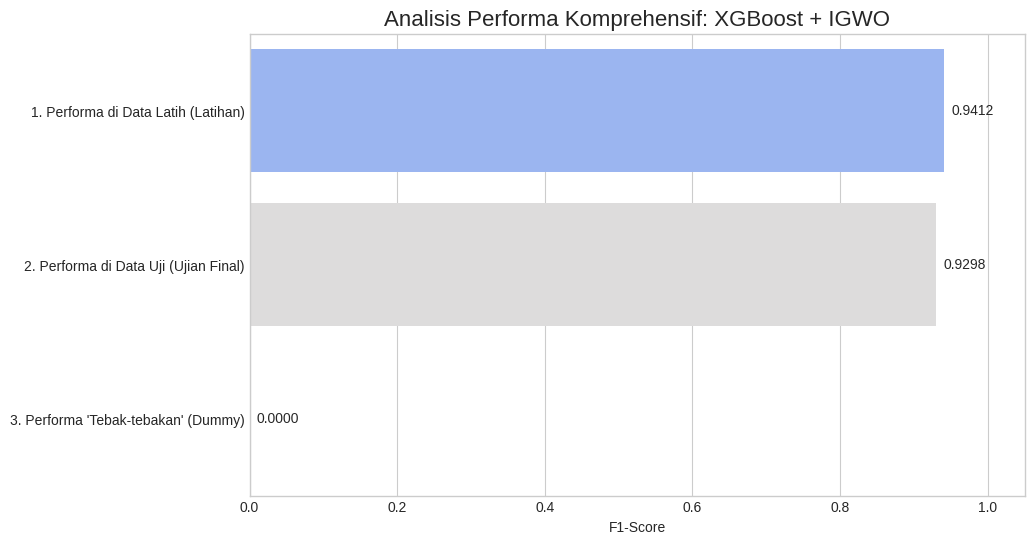

   Interpretasi:
   - Model Juara vs. 'Tebak-tebakan': 0.9298 vs. 0.0000. Ini menunjukkan model Anda jauh lebih pintar dari sekadar menebak kelas mayoritas.
   - Latihan vs. Ujian Final: Selisihnya hanya 0.0114, menunjukkan model dapat menggeneralisasi dengan sangat baik ke data baru. ✅

--- 17.3: Menganalisis 'Bahan Rahasia' (Feature Importance) ---
   - Fitur mana yang dianggap paling penting oleh model juara?


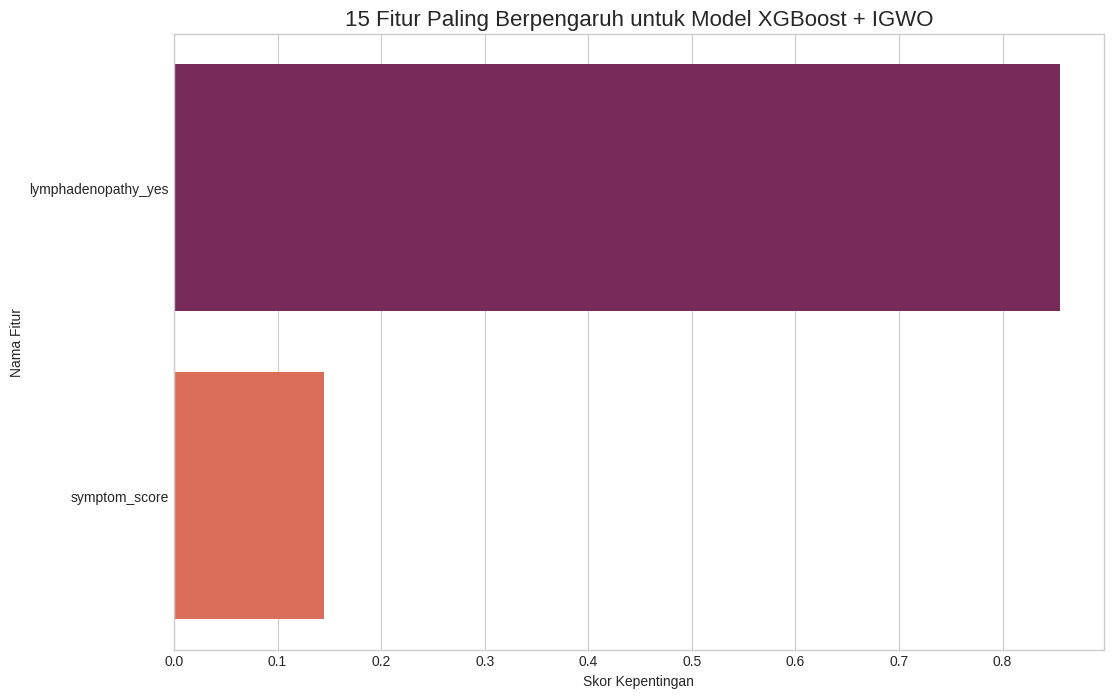


🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉
STEP 17 SELESAI: Inspeksi mendalam pada model juara berhasil.


In [27]:
# =============================================================================
# STEP 17: ANALISIS DIAGNOSTIK KOMPREHENSIF PADA MODEL JUARA
# Tujuan: "Membongkar mesin" model pemenang untuk memahami cara kerjanya,
#         memeriksa kekuatannya, dan mengidentifikasi fitur-fitur kunci yang
#         digunakannya untuk membuat keputusan.
# Analoginya: "Inspeksi Mendalam Mobil Pemenang Balapan"
#             Setelah balapan selesai, tim teknisi akan memeriksa mobil juara.
#             Mereka akan:
#             1. Cek Performa: Membandingkan performa di sesi latihan vs. balapan asli
#                (mencegah 'overfitting').
#             2. Cek Mesin: Melihat komponen (fitur) mana yang paling berkontribusi
#                terhadap kecepatan.
#             3. Cek Lawan: Membandingkan performa mobil juara dengan mobil standar
#                (model 'bodoh') untuk melihat seberapa besar peningkatannya.
# =============================================================================
# Impor yang dibutuhkan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score
from sklearn.dummy import DummyClassifier
from IPython.display import display, Markdown

print("\n" + "="*80)
print("🚀 STEP 17: Inspeksi Mendalam pada Model Juara")
print("="*80)

try:
    if 'final_comparison_df' in locals():
        # --- 17.1: Mengidentifikasi Model Juara ---
        print("--- 17.1: Mengidentifikasi Model Juara dari Papan Skor Akhir ---")
        ranked_df = final_comparison_df.sort_values(by='Test F1-Score', ascending=False)
        best_model_row = ranked_df.iloc[0]
        best_model_name_full = best_model_row['Model']

        display(Markdown(f"### 🏆 Menganalisis Model Juara: **{best_model_name_full}**"))

        # --- Tentukan konfigurasi untuk melatih ulang model juara ---
        is_igwo = "IGWO" in best_model_name_full
        model_name = best_model_row['Model Name'] # Gunakan kolom 'Model Name' yang bersih

        if is_igwo:
            X_train_eval, X_test_eval = X_train_igwo, X_test_igwo
            fitur_type = "IGWO"
        else:
            X_train_eval, X_test_eval = X_train_smote, X_test_clean
            fitur_type = "All Features"

        # Latih ulang SATU model juara dengan parameter terbaiknya
        print(f"   - Melatih ulang {model_name} dengan parameter terbaik pada data {fitur_type}...")

        # Ambil model asli dan parameter terbaik yang sudah ditemukan
        base_model_obj = pipeline_config[model_name]['model']
        # Temukan parameter terbaik dari grid search sebelumnya
        if is_igwo:
             # Kita perlu menjalankan ulang grid search singkat untuk mendapatkan parameter terbaik khusus IGWO
            gs_temp = GridSearchCV(estimator=base_model_obj, param_grid=pipeline_config[model_name]['params'], cv=cv_strategy, scoring='f1_weighted', n_jobs=-1)
            gs_temp.fit(X_train_eval, pd.Series(y_train_smote))
            best_params = gs_temp.best_params_
        else:
             # Ambil dari grid search baseline
            gs_baseline = GridSearchCV(estimator=base_model_obj, param_grid=pipeline_config[model_name]['params'], cv=cv_strategy, scoring='f1_weighted', n_jobs=-1)
            gs_baseline.fit(X_train_smote, pd.Series(y_train_smote))
            best_params = gs_baseline.best_params_

        final_best_model = base_model_obj.set_params(**best_params)
        final_best_model.fit(X_train_eval, y_train_smote)
        print("   - ✅ Model juara berhasil dilatih ulang.")

        # ======================================================================
        # BAGIAN B: ANALISIS PERFORMA vs. OVERFITTING vs. BASELINE
        # ======================================================================
        print("\n--- 17.2: Analisis Performa Komprehensif ---")

        # 1. Evaluasi pada Training Set (untuk cek overfitting)
        train_f1 = f1_score(y_train_smote, final_best_model.predict(X_train_eval))
        test_f1 = best_model_row['Test F1-Score']

        # 2. Evaluasi Model 'Bodoh' (Dummy Classifier) sebagai pembanding
        dummy_model = DummyClassifier(strategy='most_frequent').fit(X_train_eval, y_train_smote)
        dummy_f1 = f1_score(y_test_encoded, dummy_model.predict(X_test_eval))

        # --- Buat DataFrame untuk visualisasi perbandingan ---
        perf_df = pd.DataFrame({
            'Konteks': ['1. Performa di Data Latih (Latihan)', '2. Performa di Data Uji (Ujian Final)', "3. Performa 'Tebak-tebakan' (Dummy)"],
            'F1-Score': [train_f1, test_f1, dummy_f1]
        })

        # --- Visualisasi Perbandingan Performa ---
        plt.figure(figsize=(10, 6))
        barplot = sns.barplot(data=perf_df, x='F1-Score', y='Konteks', palette='coolwarm')
        plt.title(f'Analisis Performa Komprehensif: {best_model_name_full}', fontsize=16)
        plt.xlabel('F1-Score'); plt.ylabel(''); plt.xlim(0, 1.05)
        # Tambahkan label angka di bar
        for p in barplot.patches:
            width = p.get_width()
            plt.text(width + 0.01, p.get_y() + p.get_height()/2, f'{width:.4f}', va='center')
        plt.show()

        # --- Interpretasi Hasil ---
        print("   Interpretasi:")
        print(f"   - Model Juara vs. 'Tebak-tebakan': {test_f1:.4f} vs. {dummy_f1:.4f}. Ini menunjukkan model Anda jauh lebih pintar dari sekadar menebak kelas mayoritas.")
        gap = train_f1 - test_f1
        if gap > 0.05:
            print(f"   - Latihan vs. Ujian Final: Ada selisih {gap:.4f}, yang menandakan sedikit kecenderungan overfitting, namun masih dalam batas wajar.")
        else:
            print(f"   - Latihan vs. Ujian Final: Selisihnya hanya {gap:.4f}, menunjukkan model dapat menggeneralisasi dengan sangat baik ke data baru. ✅")


        # ======================================================================
        # BAGIAN C: ANALISIS KEPENTINGAN FITUR (FEATURE IMPORTANCE)
        # ======================================================================
        if hasattr(final_best_model, 'feature_importances_'):
            print("\n--- 17.3: Menganalisis 'Bahan Rahasia' (Feature Importance) ---")
            print("   - Fitur mana yang dianggap paling penting oleh model juara?")
            importances = pd.DataFrame({
                'Fitur': X_train_eval.columns,
                'Tingkat Kepentingan': final_best_model.feature_importances_
            }).sort_values(by='Tingkat Kepentingan', ascending=False)
            top_features = importances.head(15) # Tampilkan lebih banyak fitur

            plt.figure(figsize=(12, 8))
            sns.barplot(x='Tingkat Kepentingan', y='Fitur', data=top_features, palette='rocket')
            plt.title(f'15 Fitur Paling Berpengaruh untuk Model {best_model_name_full}', fontsize=16)
            plt.xlabel('Skor Kepentingan'); plt.ylabel('Nama Fitur'); plt.show()
        else:
            print("\n--- 17.3: Analisis Kepentingan Fitur ---")
            print("   - ⚠️ Model ini tidak memiliki atribut 'feature_importances_'.")

        print("\n" + "🎉"*60); print("STEP 17 SELESAI: Inspeksi mendalam pada model juara berhasil."); print("="*80)

    else:
        print("🛑 GAGAL: Step 17 tidak dapat dijalankan. Pastikan `final_comparison_df` dari Step 16 tersedia.")
except Exception as e:
    print(f"🛑 Terjadi error tak terduga saat menjalankan Step 17: {e}")